# Trabajo final


## Configuación y exploracíon

### Configuración

In [1]:
import numpy as np
import pandas as pd
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [2]:
pd.set_option('display.max_rows', None)
pd.set_option('display.width', 1000)

In [3]:

# Cargar los archivos desde la carpeta "data"
df_d134 = pd.read_excel("../data/D134.xlsx")
df_nodummy = pd.read_excel("../data/134NODUMMY.xlsx")
df_kmeans = pd.read_excel("../data/kmeans134.xlsx")

# Verificar que los datos se cargaron correctamente
print("D134 - Primeras 5 filas:")
print(df_d134.head())

print("\n134NODUMMY - Primeras 5 filas:")
print(df_nodummy.head())

print("\nKMEANS134 - Primeras 5 filas:")
print(df_kmeans.head())


'\n# Cargar los archivos desde la carpeta "data"\ndf_d134 = pd.read_excel("../data/D134.xlsx")\ndf_nodummy = pd.read_excel("../data/134NODUMMY.xlsx")\ndf_kmeans = pd.read_excel("../data/kmeans134.xlsx")\n\n# Verificar que los datos se cargaron correctamente\nprint("D134 - Primeras 5 filas:")\nprint(df_d134.head())\n\nprint("\n134NODUMMY - Primeras 5 filas:")\nprint(df_nodummy.head())\n\nprint("\nKMEANS134 - Primeras 5 filas:")\nprint(df_kmeans.head())\n'

In [120]:
'''
from google.colab import files
uploaded = files.upload()
'''

In [5]:
D134= pd.read_excel('D134.xlsx')

In [6]:
NODUMMY =pd.read_excel('134NODUMMY.xlsx')

In [7]:
kmeans134= pd.read_excel('kmeans134.xlsx')

In [8]:
# Tipo de datos de cada columna
print(D134.info())

# Resumen de estadísticas descriptivas para cada columna
print(D134.describe())

# Comprobar si hay valores nulos
print(D134.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134 entries, 0 to 133
Data columns (total 56 columns):
 #   Column                                                                                    Non-Null Count  Dtype  
---  ------                                                                                    --------------  -----  
 0   HIJOS                                                                                     134 non-null    int64  
 1   N_HIJOS_HOY                                                                               134 non-null    int64  
 2   BUSCA_HIJOS                                                                               100 non-null    float64
 3   N_BUSCA_HIJOS                                                                             2 non-null      float64
 4   TH_EDAD                                                                                   20 non-null     float64
 5   NH_EDAD                                                  

Creo una variable HIJOS_COMBINADA que es positiva para todos aquellos que tienen o desean tener hijos, mientras que es negativa para quienes no tienen y no desean tener, y finalmente es Na para quiene no tienen, peor no saben si quieren tener.

In [9]:
D134['HIJOS_COMBINADA'] = np.where(
    D134['HIJOS'] == 1,  # Primera condición
    1,  # Valor si HIJOS es 1
    np.where(
        (D134['HIJOS'] == 0) & (D134['BUSCA_HIJOS'] == 1),  # Segunda condición
        1,  # Valor si HIJOS es 0 y BUSCA_HIJOS es 1
        np.where(
            D134['BUSCA_HIJOS'].isna(),  # Tercera condición
            np.nan,  # Valor si BUSCA_HIJOS es NA
            0  # Valor por defecto en cualquier otro caso
        )
    )
)



In [10]:
NODUMMY["HIJOS_COMBINADA"] = np.where(
    NODUMMY["HIJOS"] == 1,  # Primera condición
    1,                     # Valor si HIJOS es 1
    np.where(
        (NODUMMY["HIJOS"] == 0) & (NODUMMY["BUSCA_HIJOS"] == 1),  # Segunda condición
        1,  # Valor si HIJOS es 0 y BUSCA_HIJOS es 1
        np.where(
            NODUMMY["BUSCA_HIJOS"].isna(),  # Tercera condición
            np.nan,  # Valor si BUSCA_HIJOS es NaN
            0  # Valor por defecto en cualquier otro caso
        )
    )
)

In [11]:

kmeans134["HIJOS_COMBINADA"] = np.where(
    kmeans134["HIJOS"] == 1,  # Primera condición
    1,  # Valor si HIJOS es 1
    np.where(
        (kmeans134["HIJOS"] == 0) & (kmeans134["BUSCA_HIJOS"] == 1),  # Segunda condición
        1,  # Valor si HIJOS es 0 y BUSCA_HIJOS es 1
        np.where(
            kmeans134["BUSCA_HIJOS"].isna(),  # Tercera condición
            np.nan,  # Valor si BUSCA_HIJOS es NA
            0  # Valor por defecto en cualquier otro caso
        )
    )
)

ETIQUETA
Peronista                   60
De izquierda                19
No sabe/ No contesta        18
Apolitico                   11
Liberal                     10
De derecha                   7
Radical                      7
Es una verga la política     1
Linda                        1
Name: count, dtype: int64


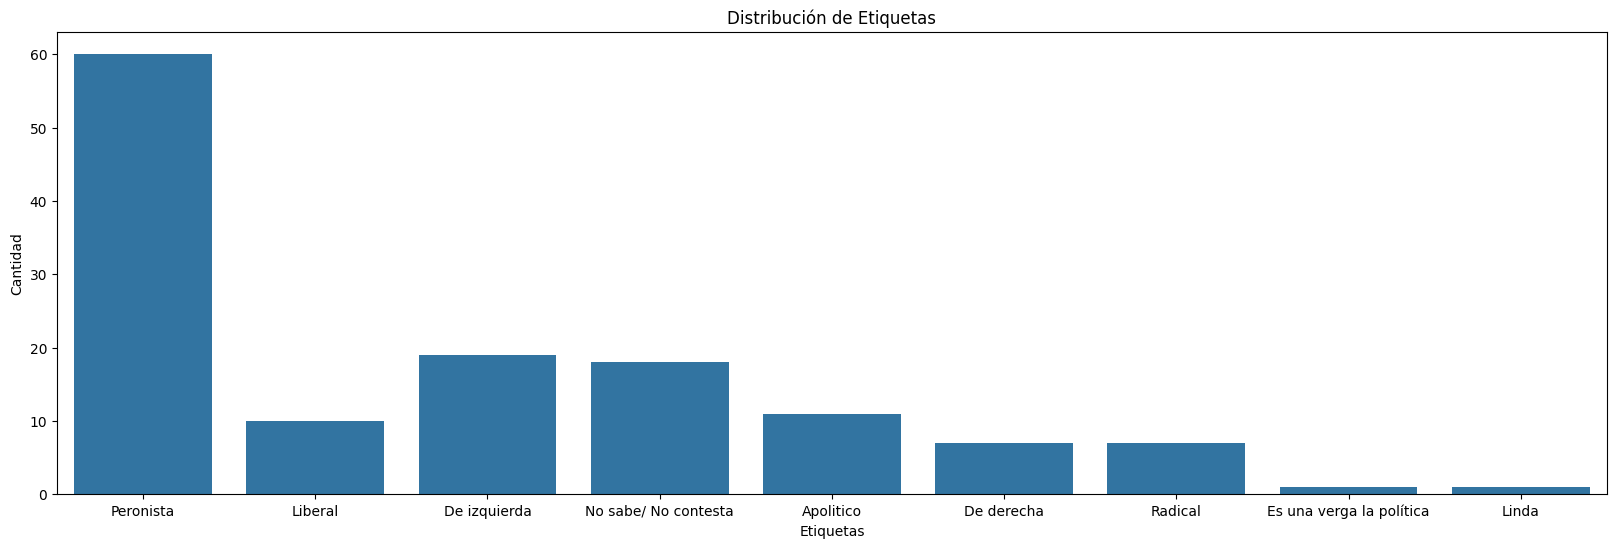

In [12]:
# Contar cuántas instancias hay de cada clase
print(D134['ETIQUETA'].value_counts())

#aumento globalmente el tamño del grafico
plt.figure(figsize=(20, 6))
# Graficar la distribución de la variable de clase
sns.countplot(x='ETIQUETA', data=D134,)
plt.title('Distribución de Etiquetas')
plt.xlabel('Etiquetas')
plt.ylabel('Cantidad')
plt.show()

Detectamos etiquetas que no nos sirven por lo que eliminaremos esos casos

In [13]:
deficientes= D134[D134['ETIQUETA'].isin(["Linda","Es una verga la política"])]
SETENTAYOCHO =D134[D134['EDAD']==78]

In [14]:
D134 = D134.drop(deficientes.index)
D134 = D134.drop(SETENTAYOCHO.index)

In [15]:
deficientes = NODUMMY[NODUMMY['ETIQUETA'].isin(["Linda", "Es una verga la política"])]
SETENTAYOCHO = NODUMMY[NODUMMY['EDAD'] == 78]

In [16]:

NODUMMY = NODUMMY.drop(deficientes.index)
NODUMMY = NODUMMY.drop(SETENTAYOCHO.index)


In [17]:
deficientes = kmeans134[kmeans134['ETIQUETA'].isin(["Linda", "Es una verga la política"])]
SETENTAYOCHO = kmeans134[kmeans134['EDAD'] == 78]

In [18]:

kmeans134 = kmeans134.drop(deficientes.index)
kmeans134 = kmeans134.drop(SETENTAYOCHO.index)


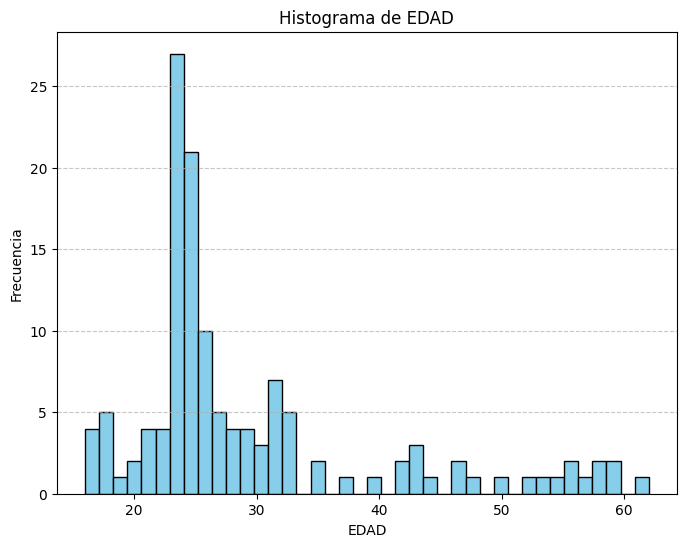

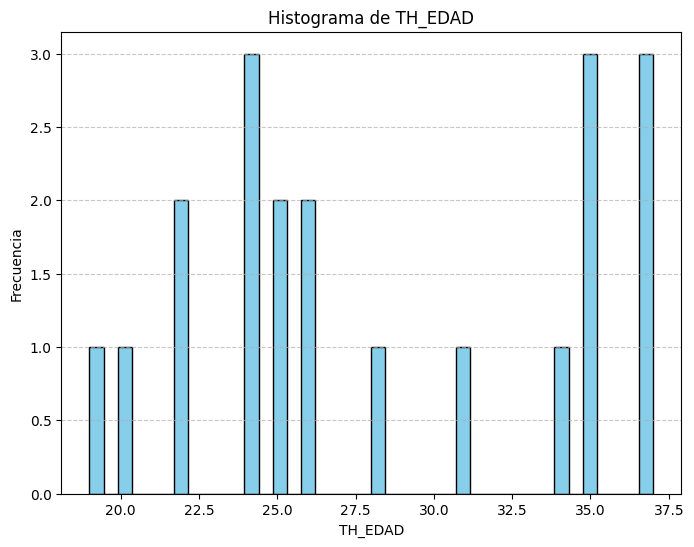

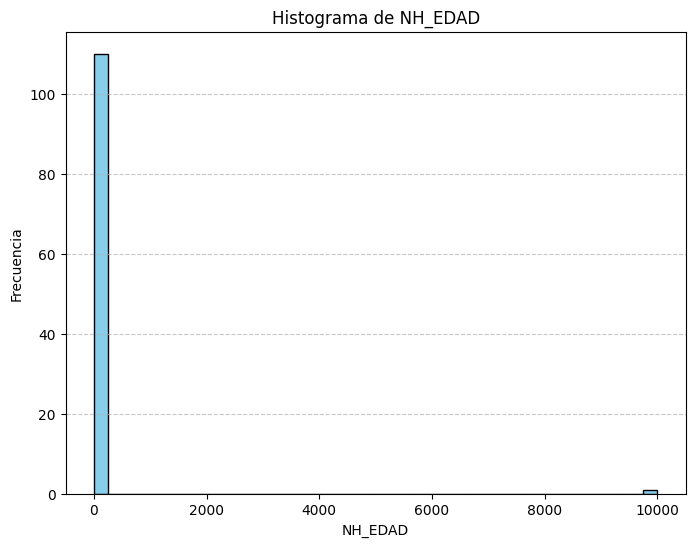

In [19]:
# Lista de variables para HISTOGRAMAS
variables = ['EDAD', 'TH_EDAD', 'NH_EDAD']

# Iterar sobre las variables y generar un histograma para cada una
for var in variables:
    plt.figure(figsize=(8, 6))  # Tamaño del gráfico
    plt.hist(D134[var], bins=40, color='skyblue', edgecolor='black')  # Histograma
    plt.title(f'Histograma de {var}')
    plt.xlabel(var)
    plt.ylabel('Frecuencia')
    plt.grid(axis='y', linestyle='--', alpha=0.7)  # Líneas de la grilla en el eje Y
    plt.show()

In [20]:
print(D134[['EDAD',"NH_EDAD","TH_EDAD","N_HIJOS_HOY"]].describe())

             EDAD       NH_EDAD    TH_EDAD  N_HIJOS_HOY
count  131.000000    111.000000  20.000000   131.000000
mean    29.526718    121.252252  28.300000     0.274809
std     10.634001    946.242045   6.173799     0.702232
min     16.000000      1.000000  19.000000     0.000000
25%     24.000000     30.000000  24.000000     0.000000
50%     25.000000     32.000000  26.000000     0.000000
75%     31.500000     35.000000  35.000000     0.000000
max     62.000000  10000.000000  37.000000     3.000000


Hay outliers en NH_EDAD por un error de configuración del cuestionario. La pregunta fue visualizada para quienes respondieron no desear tener hijos, estas personas indicaron su no correspondencia respondiendo con valores como 10000 o 1. Por el momento interpretaremos que el resto de sus respuestas con validad, por lo que no incluiremos estas variables en el set predictor, pero no descartaremos a todas las respuestas del entrevistado para otros analisiís.

Variables a remover del modelo predictivo:


1.  NH_EDAD
2. TH_EDAD
3. NH_EDAD
4. BUSCA_HIJOS
5. N_HIJOS_HOY



In [21]:
'''
SET_EXPLORACION = D134
SET_MODELO= D134.drop(["NH_EDAD","TH_EDAD","HIJOS","BUSCA_HIJOS","N_HIJOS_HOY","N_BUSCA_HIJOS"],axis=1)
'''

'\nSET_EXPLORACION = D134\nSET_MODELO= D134.drop(["NH_EDAD","TH_EDAD","HIJOS","BUSCA_HIJOS","N_HIJOS_HOY","N_BUSCA_HIJOS"],axis=1)\n'

In [22]:
SET_MODELO= D134.copy()

In [23]:
SET_EXPLORACION = NODUMMY.copy()

In [24]:
SET_KMEANS = kmeans134.copy()

In [25]:
# 3. Imputar la moda en las variables ESTUDIO y EEUU
for col in [ 'EEUU','UP']:
    moda = SET_EXPLORACION[col].mode()[0]  # Calcular la moda
    SET_EXPLORACION[col] = SET_EXPLORACION[col].fillna(moda)  # Imputar la moda

In [26]:
# 3. Imputar la moda en las variables ESTUDIO y EEUU
for col in [ 'EEUU','UP']:
    moda = SET_MODELO[col].mode()[0]  # Calcular la moda
    SET_MODELO[col] = SET_MODELO[col].fillna(moda)  # Imputar la moda

In [27]:
# 3. Imputar la moda en las variables ESTUDIO y EEUU
for col in [ 'EEUU','UP']:
    moda = SET_KMEANS[col].mode()[0]  # Calcular la moda
    SET_KMEANS[col] = SET_KMEANS[col].fillna(moda)  # Imputar la moda

## Análisis exploratorio

In [28]:
# Obtener el conteo de cada etiqueta
conteo_etiquetas = SET_EXPLORACION["ETIQUETA"].value_counts()

# Calcular el porcentaje sobre el total de casos
porcentaje_etiquetas = (SET_EXPLORACION["ETIQUETA"].value_counts(normalize=True) * 100).round(1)

# Combinar ambos en un DataFrame
resumen_etiquetas = pd.DataFrame({"Frecuencia": conteo_etiquetas, "Porcentaje": porcentaje_etiquetas})


Al observar la distibucion de frecuencia de nuestra varibale objetivo, vemos una alta concetracíon de Peronistas, Lo cual es util para indagar al interior de esos casos, pero es problematico a la hora d ebuscar predecir el partido polítio

In [29]:
resumen_etiquetas

,Frecuencia,Porcentaje
ETIQUETA,,
Peronista,59,45.0
De izquierda,19,14.5
No sabe/ No contesta,18,13.7
Apolitico,11,8.4
Liberal,10,7.6
De derecha,7,5.3
Radical,7,5.3


Veamos el promedio de ciertas variables ordinales y la proporción en otras variables dicotomicas para empezar a notar como el partido político podría incidir en el patrón de respuestas

In [30]:

variables_ordinales = ['ESTUDIO', 'SOCIECON','CHINA','EEUU','ISRAEL','PALESTINA','BOLIVIA',"RUSIA","UCRANIA",'HIJOS_COMBINADA']
# Resumen de variables ordinales (promedios por cluster)
resumen_ordinales = SET_EXPLORACION.groupby('ETIQUETA')[variables_ordinales].mean()
print("Promedios de variables ordinales por partido:")
print(resumen_ordinales)

# Resumen de variables dicotómicas (proporciones por cluster)
variables_dicotomicas = ['GENERO','MASCOTHIJO', 'GORRA', 'EF', 'TARIFAS','MALVINAS','UP','EJERCITO','EMPRESARIOS','EL_PROBLEMA',"NO_PIENSAN","DESIGUALDAD"]  # Modifica según tus variables
resumen_dicotomicas = SET_EXPLORACION.groupby('ETIQUETA')[variables_dicotomicas].mean()
print("\nProporciones de variables dicotómicas por partido:")
print(resumen_dicotomicas)

Promedios de variables ordinales por partido:
                       ESTUDIO  SOCIECON     CHINA      EEUU    ISRAEL  PALESTINA   BOLIVIA     RUSIA   UCRANIA  HIJOS_COMBINADA
ETIQUETA                                                                                                                        
Apolitico             2.363636  1.181818 -0.363636  0.272727 -0.181818  -0.454545  0.363636 -0.454545  0.272727         0.818182
De derecha            2.666667  1.571429 -0.285714  0.000000 -0.285714  -0.428571 -0.285714 -0.142857  0.142857         1.000000
De izquierda          2.947368  1.210526  0.315789 -1.000000 -0.736842   0.736842  0.736842  0.000000  0.052632         0.687500
Liberal               2.222222  1.400000 -0.200000  0.200000 -0.400000  -0.300000  0.100000 -0.200000  0.300000         1.000000
No sabe/ No contesta  2.294118  1.277778 -0.222222 -0.388889 -0.388889  -0.611111 -0.111111 -0.555556  0.000000         0.923077
Peronista             2.474576  1.271186  0.491525 

**distribuyendo el formato de colores por cada fila**

In [31]:

# Supongamos que 'SET_EXPLORACION' contiene las columnas:
#   - 'ETIQUETA' con las categorías políticas (filas)
#   - 'NOTICIAS' con la fuente de noticias (columnas, p. ej. "C5N", "Crónica", etc.)

# 1. Crear tabla de frecuencias con pd.crosstab
tabla_frecuencias = pd.crosstab(
    SET_EXPLORACION["ETIQUETA"],
    SET_EXPLORACION["NOTICIAS"]
)

# 2. Convertir a proporciones por fila ("normalize='index'")
tabla_proporciones = pd.crosstab(
    SET_EXPLORACION["ETIQUETA"],
    SET_EXPLORACION["NOTICIAS"],
    normalize='index'
) * 100

# 3. Aplicar estilo con gradiente y formatear a 2 decimales + '%'
styled_tabla = (
    tabla_proporciones
    .style
    .background_gradient(cmap="RdYlGn", axis=1)
    .format("{:.2f}%")
)

# 4. Mostrar resultados
print("Proporción de cada NOTICIAS dentro de cada ETIQUETA (%):")
display(styled_tabla)


Proporción de cada NOTICIAS dentro de cada ETIQUETA (%):


NOTICIAS,A24,C5N,Cronica,Prefiero no ver nada,TN
ETIQUETA,,,,,
Apolitico,0.00%,0.00%,0.00%,54.55%,45.45%
De derecha,0.00%,14.29%,0.00%,57.14%,28.57%
De izquierda,21.05%,21.05%,5.26%,47.37%,5.26%
Liberal,0.00%,0.00%,20.00%,30.00%,50.00%
No sabe/ No contesta,5.56%,5.56%,5.56%,38.89%,44.44%
Peronista,15.25%,47.46%,6.78%,18.64%,11.86%
Radical,14.29%,0.00%,0.00%,71.43%,14.29%


**distribuyendo el formato de colores por toda la tabla**

In [32]:

tabla_proporciones = pd.crosstab(
    SET_EXPLORACION["ETIQUETA"],
    SET_EXPLORACION["NOTICIAS"],
    normalize='index'
) * 100

# 2. Aplicar estilo con gradiente en función de todos los valores (axis=None),
#    y mostrar porcentajes con dos decimales
styled_tabla = (
    tabla_proporciones
    .style
    .background_gradient(cmap="RdYlGn", axis=None)  # Gradiente en base a min y max de toda la tabla
    .format("{:.2f}%")
)

display(styled_tabla)

NOTICIAS,A24,C5N,Cronica,Prefiero no ver nada,TN
ETIQUETA,,,,,
Apolitico,0.00%,0.00%,0.00%,54.55%,45.45%
De derecha,0.00%,14.29%,0.00%,57.14%,28.57%
De izquierda,21.05%,21.05%,5.26%,47.37%,5.26%
Liberal,0.00%,0.00%,20.00%,30.00%,50.00%
No sabe/ No contesta,5.56%,5.56%,5.56%,38.89%,44.44%
Peronista,15.25%,47.46%,6.78%,18.64%,11.86%
Radical,14.29%,0.00%,0.00%,71.43%,14.29%


> ####  Conclusiones sobre la preferencia de noticias por etiqueta política:
> - **Apolíticos**: O bien prefieren no ver noticias(55%) o se informan a traves de TN (45%).
> - **De derecha**: En la derecha crece a **57.14%** el porcentaje que elige no ver noticias, lo que sugiere cierto desapego informativo. La mayoria de quienes si eligen entre un canal de noticias, optan por TN .
> - **Izquierda**: Se mantiene alta la proporcion de quienes optan no mirar ningun medio, pero C5N y A24 aglutinan un 42% de los encuestados de izquierda.
> - **Peronismo**: El **47.46%** de los peronistas consume C5N, lo que muestra una fuerte asociación con este medio. Son a la vez los mas adversos a no optar por ninguno de estos medios.
> - **Liberales**: El **50.00%** de los liberales ve TN, pero también hay un **20.00%** que prefiere Crónica, siendo el grupo político que mas consume esta elige este medio en la muestra.
> - **Radicales**: El **71.43%** de los radicales no consume noticias, la tasa más alta de cualquier grupo.


**Distribución de canales de noticia preferidos**

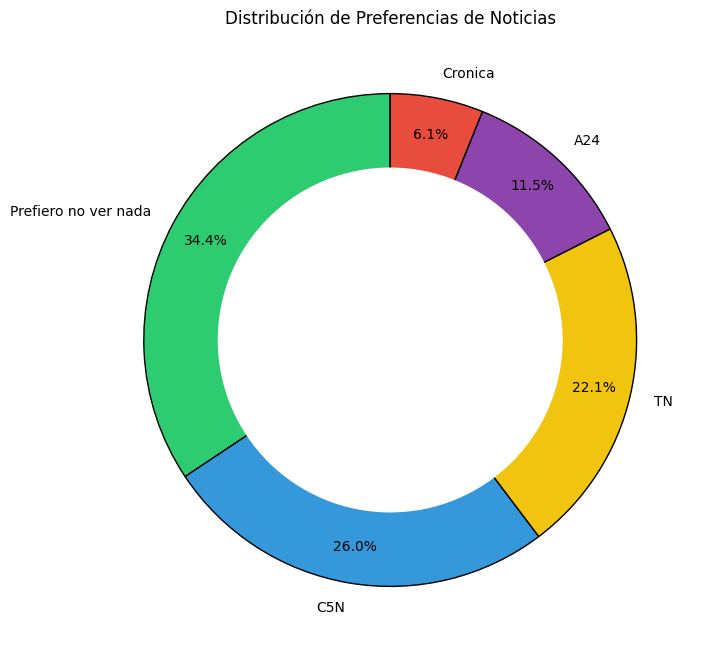

In [33]:
# Supongamos que tu DataFrame se llama NODUMMY y la columna de interés es "NOTICIAS"
conteo_noticias = SET_EXPLORACION["NOTICIAS"].value_counts()

# Definir un mapa de colores. Agrega/ajusta los que necesites
color_map = {
    "C5N": "#3498db",          # Azul
    "Cronica": "#e74c3c",      # Rojo
    "Prefiero no ver nada": "#2ecc71",  # Verde
    "TN": "#f1c40f",           # Amarillo
    "A24": "#8e44ad"           # Violeta (ejemplo)
}

# Construir la lista de colores según el orden de las categorías
categorias = conteo_noticias.index
colores = [color_map.get(cat, "#95a5a6") for cat in categorias]
# "get(cat, "#95a5a6")" usa un color gris si la categoría no está en color_map

# Crear el gráfico de pastel en forma de anillo
plt.figure(figsize=(8, 8))
plt.pie(
    conteo_noticias,
    labels=categorias,
    autopct="%1.1f%%",
    startangle=90,
    wedgeprops={"edgecolor": "black"},
    pctdistance=0.85,
    colors=colores
)

# Añadir un círculo blanco en el centro para dar efecto de anillo
centro = plt.Circle((0, 0), 0.70, fc='white')
plt.gca().add_artist(centro)

plt.title("Distribución de Preferencias de Noticias")
plt.show()

**Distribucíon general de la evaluación que hacen de distintos países**

In [34]:
# Definir las variables de países
paises = ['ISRAEL', 'EEUU', 'BOLIVIA', 'INGLATERRA', 'CHINA', 'PALESTINA','RUSIA','UCRANIA']

# --- CÁLCULO DE PROMEDIOS ---

# 1. Promedio general por país
promedio_general = SET_EXPLORACION[paises].mean().sort_values(ascending=False)

# 2. Promedio por Fuente_Noticias
promedio_por_noticias = SET_EXPLORACION.groupby("NOTICIAS")[paises].mean()

# 3. Promedio por Etiqueta Política
promedio_por_etiqueta = SET_EXPLORACION.groupby("ETIQUETA")[paises].mean()


<ipython-input-35-be65300a279d>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=promedio_general.index, y=promedio_general.values, palette="coolwarm", edgecolor="black")


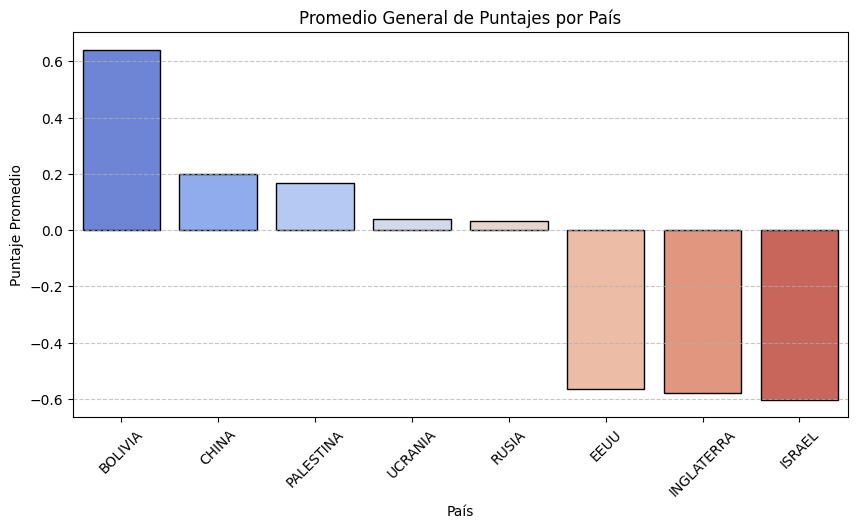

In [35]:
plt.figure(figsize=(10, 5))
sns.barplot(x=promedio_general.index, y=promedio_general.values, palette="coolwarm", edgecolor="black")
plt.title("Promedio General de Puntajes por País")
plt.ylabel("Puntaje Promedio")
plt.xlabel("País")
plt.xticks(rotation=45)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()


#### Relación entre el canal de noticias preferido y la evaluacíon de distintos países

In [36]:


# Lista de variables de países (valores de -2 a 2)
variables_cruce = ["ISRAEL", "EEUU", "BOLIVIA", "INGLATERRA", "CHINA", "PALESTINA"]

for var in variables_cruce:
    # 1) Crear una tabla de conteo: filas = var (país), columnas = "NOTICIAS"
    #    unstack transforma el groupby en una tabla con cada valor de 'NOTICIAS' como columna.
    df_temp = SET_EXPLORACION.groupby([var, "NOTICIAS"]).size().unstack("NOTICIAS", fill_value=0)

    # 2) Asegurarnos de que aparezcan todas las categorías de -2 a 2,
    #    aun si no existen (las llenamos con 0).
    df_temp = df_temp.reindex([-2, -1, 0, 1, 2], fill_value=0)

    # 3) Normalizar por columna para que cada columna (canal de noticias) sume 100%
    #    Esto emula la idea de df.div(df.sum(axis=0), axis=1)*100 de tu ejemplo original
    df_temp = df_temp.div(df_temp.sum(axis=0), axis=1) * 100

    # 4) Dar formato a dos decimales y aplicar un gradiente de color.
    styled_df = df_temp.style.background_gradient(cmap="RdYlGn", axis=0).format("{:.2f}%")

    # 5) Mostrar la tabla resultante
    print(f"\nProporciones de canales de 'NOTICIAS' por '{var}' (normalizado por columna):")
    display(styled_df)



Proporciones de canales de 'NOTICIAS' por 'ISRAEL' (normalizado por columna):


NOTICIAS,A24,C5N,Cronica,Prefiero no ver nada,TN
ISRAEL,,,,,
-2,26.67%,29.41%,50.00%,17.78%,6.90%
-1,26.67%,38.24%,12.50%,28.89%,20.69%
0,46.67%,29.41%,37.50%,40.00%,55.17%
1,0.00%,2.94%,0.00%,11.11%,13.79%
2,0.00%,0.00%,0.00%,2.22%,3.45%



Proporciones de canales de 'NOTICIAS' por 'EEUU' (normalizado por columna):


NOTICIAS,A24,C5N,Cronica,Prefiero no ver nada,TN
EEUU,,,,,
-2,13.33%,47.06%,25.00%,17.78%,6.90%
-1,53.33%,32.35%,12.50%,37.78%,24.14%
0,20.00%,11.76%,37.50%,22.22%,27.59%
1,13.33%,8.82%,25.00%,22.22%,37.93%
2,0.00%,0.00%,0.00%,0.00%,3.45%



Proporciones de canales de 'NOTICIAS' por 'BOLIVIA' (normalizado por columna):


NOTICIAS,A24,C5N,Cronica,Prefiero no ver nada,TN
BOLIVIA,,,,,
-2,0.00%,0.00%,12.50%,11.11%,3.45%
-1,0.00%,2.94%,0.00%,4.44%,10.34%
0,33.33%,20.59%,12.50%,33.33%,44.83%
1,53.33%,44.12%,37.50%,31.11%,34.48%
2,13.33%,32.35%,37.50%,20.00%,6.90%



Proporciones de canales de 'NOTICIAS' por 'INGLATERRA' (normalizado por columna):


NOTICIAS,A24,C5N,Cronica,Prefiero no ver nada,TN
INGLATERRA,,,,,
-2,40.00%,44.12%,25.00%,28.89%,13.79%
-1,20.00%,26.47%,25.00%,20.00%,24.14%
0,26.67%,20.59%,12.50%,22.22%,37.93%
1,6.67%,2.94%,37.50%,26.67%,17.24%
2,6.67%,5.88%,0.00%,2.22%,6.90%



Proporciones de canales de 'NOTICIAS' por 'CHINA' (normalizado por columna):


NOTICIAS,A24,C5N,Cronica,Prefiero no ver nada,TN
CHINA,,,,,
-2,0.00%,5.88%,12.50%,4.44%,3.45%
-1,6.67%,8.82%,0.00%,15.56%,24.14%
0,46.67%,35.29%,37.50%,44.44%,51.72%
1,40.00%,47.06%,37.50%,31.11%,17.24%
2,6.67%,2.94%,12.50%,4.44%,3.45%



Proporciones de canales de 'NOTICIAS' por 'PALESTINA' (normalizado por columna):


NOTICIAS,A24,C5N,Cronica,Prefiero no ver nada,TN
PALESTINA,,,,,
-2,0.00%,2.94%,25.00%,15.56%,6.90%
-1,0.00%,0.00%,0.00%,13.33%,13.79%
0,60.00%,47.06%,37.50%,42.22%,58.62%
1,26.67%,35.29%,37.50%,24.44%,13.79%
2,13.33%,14.71%,0.00%,4.44%,6.90%


> #### Conclusiones sobre la preferencia de noticias según la opinión sobre países:
>
> **ISRAEL**  
> - **Opinión negativa:** **C5N y Crónica** concentran una proporción alta de quienes tienen una **visión negativa** de Israel.  
> - **Opinión positiva:** Entre quienes tienen una **opinión favorable** de Israel, los mayores consumos se dan en **TN y "Prefieren no ver noticias"**.  
>
> **EEUU**  
> - **Opinión negativa:** **C5N y A24** son los medios más consumidos entre quienes tienen una **visión desfavorable** de EE.UU.  
> - **Opinión positiva:** **TN y el menor consumo de noticias** destacan entre aquellos con una **visión positiva** de EE.UU.  
>
> **BOLIVIA**  
> - **Opinión negativa:** No se observa un patrón claro en el consumo de medios entre quienes tienen una **opinión negativa** sobre Bolivia.  
> - **Opinión positiva:** **C5N y A24** destacan entre quienes tienen una **visión favorable** de Bolivia.  
>
> **INGLATERRA**  
> - **Opinión negativa:** **C5N y A24** son los medios más consumidos entre quienes tienen una **opinión negativa** sobre Inglaterra.  
> - **Opinión positiva:** **Crónica y TN** tienen una mayor presencia en el consumo de quienes tienen una **visión positiva** sobre Inglaterra.  
>
> **CHINA**  
> - **Opinión negativa:** **TN y A24** concentran el mayor consumo entre quienes tienen una **visión desfavorable** de China.  
> - **Opinión positiva:** **C5N y la opción de no ver estos noticieros** son las más elegidas por quienes tienen una **visión favorable** de China.  
>
> **PALESTINA**  
> - **Opinión negativa:** **Crónica y A24** son los medios más consumidos entre quienes tienen una **opinión negativa** sobre Palestina.  
> - **Opinión positiva:** **A24 y C5N** tienen una mayor proporción de audiencia entre quienes tienen una **visión favorable** de Palestina.  


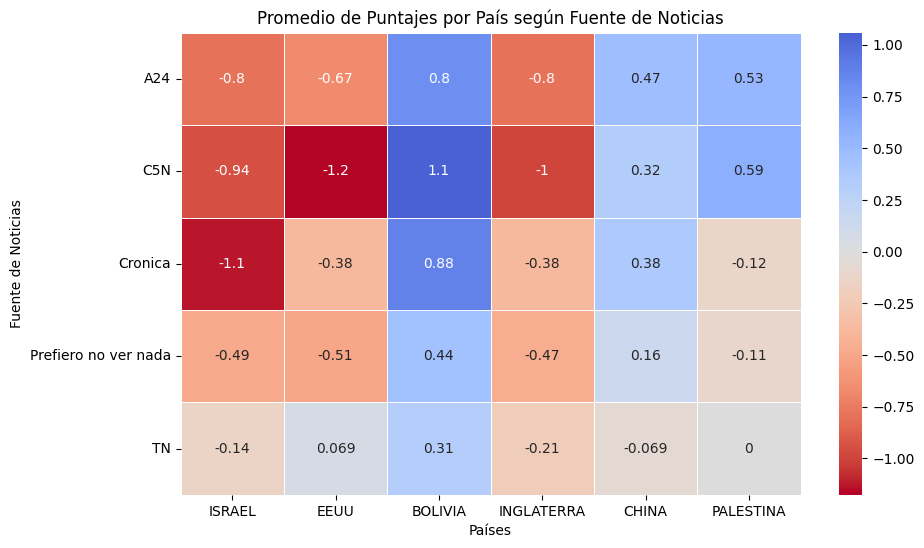

In [37]:

# Supongamos que estas son las columnas de países que deseas graficar
paises = ["ISRAEL", "EEUU", "BOLIVIA", "INGLATERRA", "CHINA", "PALESTINA"]

# 1. Calcular el promedio de cada país según la fuente de noticias
promedio_por_noticias = SET_EXPLORACION.groupby("NOTICIAS")[paises].mean()

# 2. Crear el mapa de calor
plt.figure(figsize=(10, 6))
sns.heatmap(promedio_por_noticias, annot=True, cmap="coolwarm_r", center=0, linewidths=0.5)
plt.title("Promedio de Puntajes por País según Fuente de Noticias")
plt.ylabel("Fuente de Noticias")
plt.xlabel("Países")
plt.show()


> #### Conclusiones sobre la relación entre la opinión sobre países y la fuente de noticias:
>
> **🔴 Tendencias negativas destacadas:**  
> - **C5N** presenta la opinión más negativa hacia **EE.UU. (-1.2)** e **Inglaterra (-1.0)**, indicando una alineación crítica con estos países.  
> - **Crónica** también muestra una **opinión promedio desfavorable sobre Israel (-1.1)**.  

> **🟢 Tendencias positivas destacadas:**  
> - **C5N** es el medio con la percepción más favorable hacia **Bolivia (+1.1)**
>
> **⚖️ Consideraciones generales:**  
> - **Bolivia es el único país con una valoración positiva en promedio por los usuarios de todos los medios**, con **C5N (+1.1) como el más favorable** y **TN (+0.31) como el menos positivo**.  
> - **Inglaterra recibe una valoración negativa en todos los medios**, pero con matices: **C5N es el más crítico (-1.0)**, mientras que **TN es el menos negativo (-0.21)**  


#### La etiqueta política

**Distribución de frecuencia de la edad en grupos quinquenales de los encuestados según etiqueta apolítica**

In [38]:
color_dict = {
    "Peronista": "#7CC6FE",
    "De izquierda": "#FF0035",
    "No sabe/ No contesta": "#F4FAFF",
    "Apolitico": "#08090A",
    "Liberal": "#613DC1",
    "De derecha": "#909580",
    "Radical": "#DBD053"
}

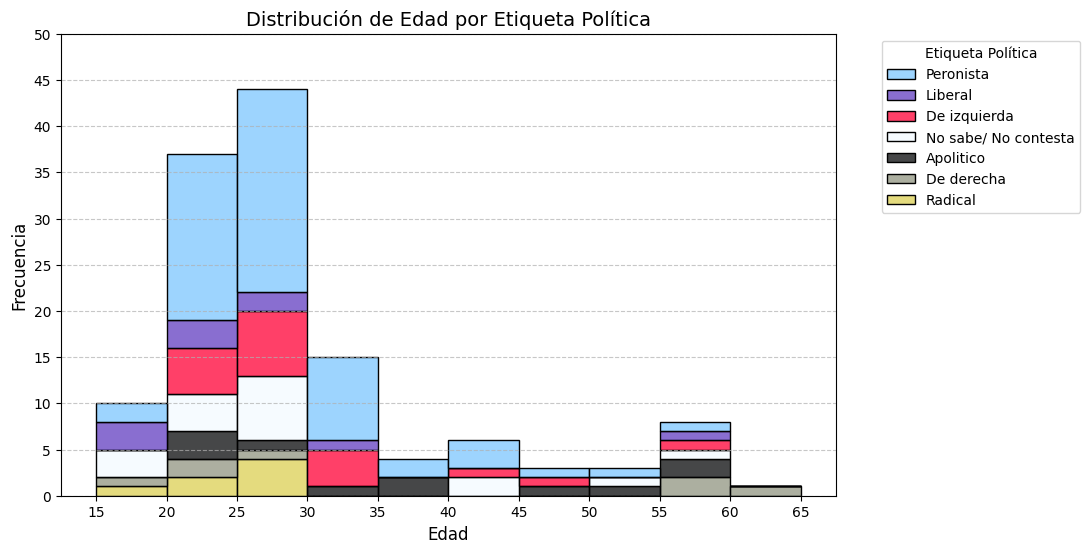

In [39]:
# Definir los bins exactos de 5 en 5 para el eje X (edades)
bin_edges_x = np.arange(15, SET_EXPLORACION["EDAD"].max() + 5, 5)

# Crear el histograma apilado con bins fijos
plt.figure(figsize=(10, 6))
ax = sns.histplot(data=SET_EXPLORACION, x="EDAD", hue="ETIQUETA", multiple="stack",
                  bins=bin_edges_x, palette=color_dict, edgecolor="black")

# Configurar títulos y etiquetas
plt.title("Distribución de Edad por Etiqueta Política", fontsize=14)
plt.xlabel("Edad", fontsize=12)
plt.ylabel("Frecuencia", fontsize=12)
plt.xticks(bin_edges_x)  # Asegurar que los ticks del eje X coincidan con los bins

# Configurar el eje Y para que también tenga intervalos de 5 en 5
max_y = ax.get_ylim()[1]  # Obtener el valor máximo en el eje Y
bin_edges_y = np.arange(0, max_y + 5, 5)
plt.yticks(bin_edges_y)

# Mostrar la leyenda correctamente con los colores de las etiquetas
handles, labels = ax.get_legend().legend_handles, [t.get_text() for t in ax.get_legend().texts]
plt.legend(handles, labels, title="Etiqueta Política", bbox_to_anchor=(1.05, 1), loc='upper left')

plt.grid(axis="y", linestyle="--", alpha=0.7)  # Agregar una grilla en el eje Y para mayor claridad

# Mostrar el gráfico
plt.show()

**Distribucíon de canal de noticias preferido según etiqueta política**

<Figure size 1000x600 with 0 Axes>

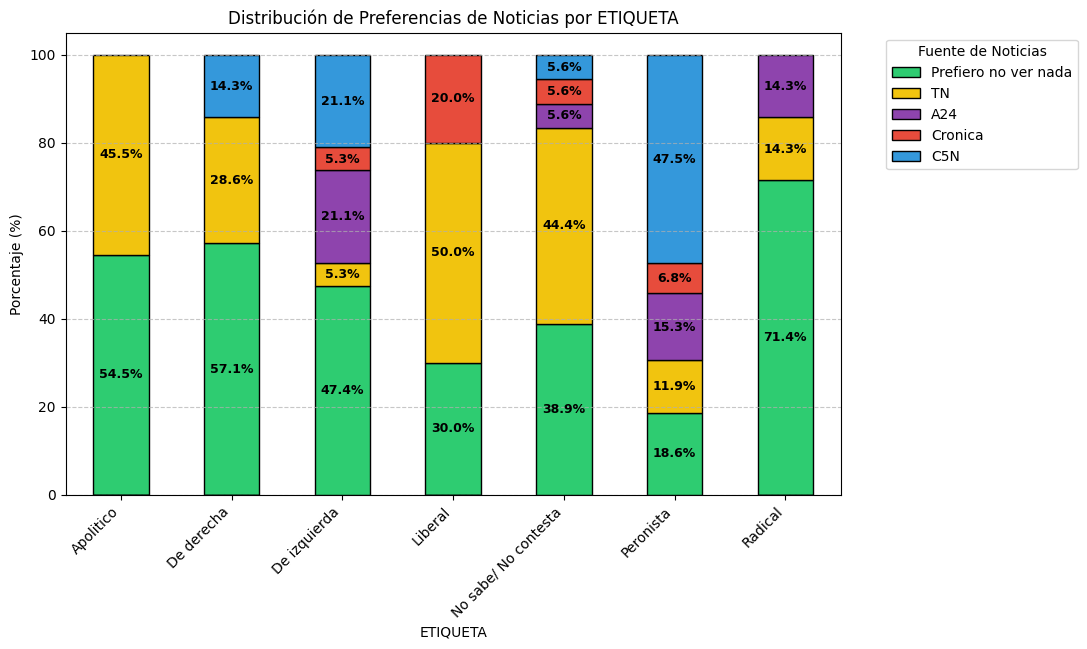

In [40]:
import matplotlib.pyplot as plt

# Diccionario de colores
color_map = {
    "C5N": "#3498db",
    "Cronica": "#e74c3c",
    "Prefiero no ver nada": "#2ecc71",
    "TN": "#f1c40f",
    "A24": "#8e44ad"
}

# Orden de columnas de abajo hacia arriba en la barra apilada
orden_columas = [
    "Prefiero no ver nada",
    'TN',
    "A24",
    "Cronica",
    "C5N"
]

# --- GRÁFICO DE BARRAS APILADAS AL 100% POR ETIQUETA ---
plt.figure(figsize=(10, 6))

# 1. Crear la tabla dinámica
df_pivot = SET_EXPLORACION.pivot_table(
    index="ETIQUETA",
    columns="NOTICIAS",
    aggfunc="size",
    fill_value=0
)

# 2. Normalizar a porcentajes
df_pivot_norm = df_pivot.div(df_pivot.sum(axis=1), axis=0) * 100

# 3. Reindexar las columnas según el orden deseado
df_pivot_norm = df_pivot_norm.reindex(columns=orden_columas, fill_value=0)

# 4. Asignar colores en el mismo orden
colors = [color_map.get(col, "#95a5a6") for col in df_pivot_norm.columns]

# 5. Crear el gráfico de barras apiladas
fig, ax = plt.subplots(figsize=(10, 6))
bars = df_pivot_norm.plot(
    kind="bar",
    stacked=True,
    color=colors,
    edgecolor="black",
    ax=ax
)

# 6. Agregar etiquetas de porcentaje dentro de las barras
for bar_container in bars.containers:
    for bar in bar_container:
        height = bar.get_height()
        if height > 5:  # Solo mostrar si es mayor a 5%
            ax.text(
                bar.get_x() + bar.get_width() / 2,
                bar.get_y() + height / 2,
                f"{height:.1f}%",
                ha="center",
                va="center",
                fontsize=9,
                color="black",
                fontweight="bold"
            )

# 7. Ajustar diseño
ax.set_ylabel("Porcentaje (%)")
ax.set_title("Distribución de Preferencias de Noticias por ETIQUETA")
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")
ax.legend(title="Fuente de Noticias", bbox_to_anchor=(1.05, 1), loc='upper left')
ax.grid(axis="y", linestyle="--", alpha=0.7)

# 8. Mostrar el gráfico
plt.show()


#### Evaluación Promedio de los países segun etiqueta política

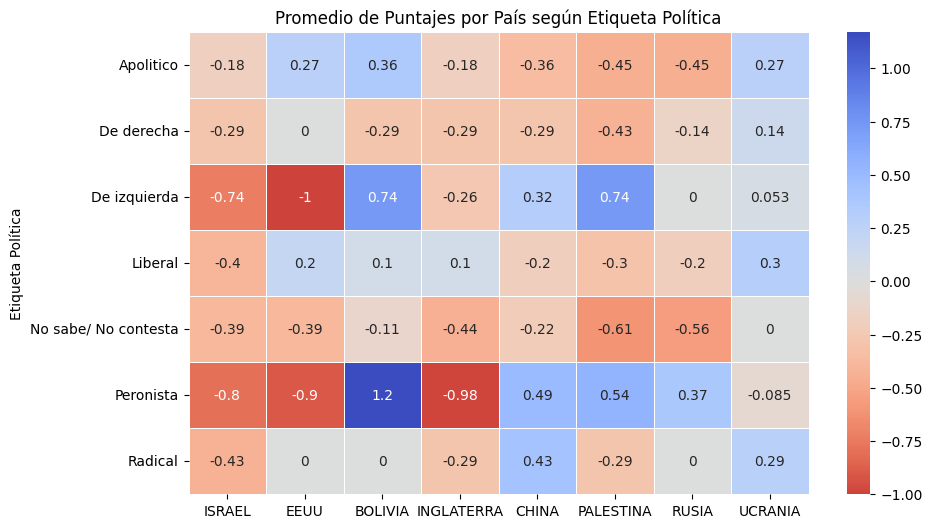

In [41]:

# Gráfico de calor de promedios por Etiqueta Política
plt.figure(figsize=(10, 6))
sns.heatmap(promedio_por_etiqueta, annot=True, cmap="coolwarm_r", center=0, linewidths=0.5)
plt.title("Promedio de Puntajes por País según Etiqueta Política")
plt.ylabel("Etiqueta Política")
plt.show()

> #### Conclusiones sobre la relación entre la opinión sobre países y la afiliación política:
>
> **🔴 Tendencias negativas destacadas:**  
> - La **izquierda** tiene la visión más negativa sobre **EE.UU. (-1.0)** e **Israel (-0.74)**, lo que sugiere un distanciamiento de estos países.  
> - Los **peronistas** muestran una fuerte opinión desfavorable hacia **Inglaterra (-0.98)** e **Israel (-0.8)**, en línea con posturas históricas del movimiento.    
>
> **🟢 Tendencias positivas destacadas:**  
> - **Bolivia es el país con mejor valoración por los peronistas (+1.2)**, mostrando una afinidad significativa con este país.  
> - **La izquierda valora positivamente a Bolivia (+0.74) y Palestina (+0.74)**, lo que refleja posturas de solidaridad con estos países.  
>
> **⚖️ Consideraciones generales:**  
> - **EE.UU. y Reino Unido tienen en general una imagen desfavorable en casi todas las etiquetas políticas**, siendo **la izquierda y los peronistas los más críticos**.  
> - **Bolivia es el único país con consenso positivo entre múltiples sectores políticos**, siendo más valorado por peronistas y la izquierda.  


#### Prueba de anova de mas de 2 grupos para diferencia de medias

In [42]:

# --- PRUEBA ESTADÍSTICA PARA DIFERENCIA DE MEDIAS ENTRE FUENTES DE NOTICIAS ---

# Comparar si hay diferencias significativas entre las distintas fuentes de noticias en los puntajes de cada país
resultados_ttest = {}
for pais in paises:
    grupos = SET_EXPLORACION.groupby("NOTICIAS")[pais].apply(list)  # Agrupar respuestas por fuente de noticias

    # Realizar prueba ANOVA si hay más de 2 grupos
    if len(grupos) > 2:
        f_stat, p_value = stats.f_oneway(*grupos)  # ANOVA para múltiples grupos
        test_name = "ANOVA"
    else:
        f_stat, p_value = stats.ttest_ind(*grupos, equal_var=False)  # Test t de Student para 2 grupos
        test_name = "T-Test"

    resultados_ttest[pais] = {"Test": test_name, "F-Statistic": f_stat, "P-Value": p_value}

# Convertir a DataFrame para visualización
df_ttest = pd.DataFrame(resultados_ttest).T

# Aplicar formato condicional a los p-valores (colorear valores significativos)
def highlight_p_values(s):
    return ['background-color: #FF6666' if v < 0.05 else '' for v in s]  # Rojo si p-valor < 0.05

styled_df = df_ttest.style.apply(highlight_p_values, subset=["P-Value"])

# Mostrar DataFrame con formato condicional
display(styled_df)


,Test,F-Statistic,P-Value
ISRAEL,ANOVA,4.020065,0.004206
EEUU,ANOVA,6.078534,0.000166
BOLIVIA,ANOVA,2.904553,0.024400
INGLATERRA,ANOVA,2.040438,0.092665
CHINA,ANOVA,1.255031,0.291272
PALESTINA,ANOVA,3.437427,0.010555


> **Consideraciones sobre los resultados de ANOVA**
>
> **📊 Significancia en la relación entre opinión sobre países y fuente de noticias:**  
> - Se encontraron diferencias **estadísticamente significativas** en la opinión sobre **Israel, EE.UU., Bolivia y Palestina**, con valores de **p < 0.05**, lo que indica que la fuente de noticias tiene un impacto en la percepción de estos países.  
> - **No se encontraron diferencias significativas** para **Inglaterra y China**, lo que sugiere que la percepción de estos países es más homogénea entre los consumidores de distintos medios.  
>

**Test post-hoc de Tukey **

In [43]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

In [44]:
# Realizar prueba de Tukey para los países con diferencias significativas
paises_significativos = ["ISRAEL", "EEUU", "BOLIVIA", "PALESTINA", "RUSIA"]

for pais in paises_significativos:
    tukey = pairwise_tukeyhsd(SET_EXPLORACION[pais], SET_EXPLORACION["NOTICIAS"])
    print(f"Resultados Post-Hoc para {pais}:\n")
    print(tukey)
    print("\n" + "-"*50 + "\n")

Resultados Post-Hoc para ISRAEL:

              Multiple Comparison of Means - Tukey HSD, FWER=0.05              
       group1               group2        meandiff p-adj   lower  upper  reject
-------------------------------------------------------------------------------
                 A24                  C5N  -0.1412 0.9875 -0.9275 0.6451  False
                 A24              Cronica   -0.325 0.9272 -1.4356 0.7856  False
                 A24 Prefiero no ver nada   0.3111 0.7858 -0.4452 1.0674  False
                 A24                   TN   0.6621 0.1612 -0.1447 1.4689  False
                 C5N              Cronica  -0.1838 0.9862 -1.1806  0.813  False
                 C5N Prefiero no ver nada   0.4523 0.1973 -0.1241 1.0287  False
                 C5N                   TN   0.8032 0.0064   0.162 1.4445   True
             Cronica Prefiero no ver nada   0.6361 0.3731 -0.3372 1.6094  False
             Cronica                   TN   0.9871 0.0601  -0.026 2.0001  False
Prefie


> **Diferencias relevantes identificadas en pruebas post-hoc:**  
> - **Israel:** La única diferencia significativa se encuentra entre **C5N y TN**, donde los consumidores de **C5N tienen una opinión más negativa** respecto a Israel en comparación con los de TN.  
> - **EE.UU.:** Se identifican diferencias significativas entre **C5N y Prefiero no ver noticias**, y entre **C5N y TN**, donde los consumidores de **C5N tienen una percepción significativamente más negativa** sobre EE.UU.  
> - **Bolivia:** Se observa una diferencia significativa entre **C5N y TN**, indicando que los consumidores de **C5N tienen una percepción más positiva** sobre Bolivia en comparación con los de TN.  

> **⚠️ Aspectos generales a considerar:**  
> - En general, **C5N tiende a estar asociado con opiniones más negativas sobre Israel y EE.UU., mientras que TN presenta valores menos críticos** hacia estos países.  
> - **Bolivia es el único país donde C5N muestra una diferencia positiva en comparación con TN**, lo que sugiere que este ultimo medio influye en una visión más negativa sobre el país, considerando que vimos que es un país que suele llevarse opiniones, en promedio, mas favorables que las que le asignan los que eligen **TN**.  



#### Hijos

**Tenencia o no de hijos de los encuestados**

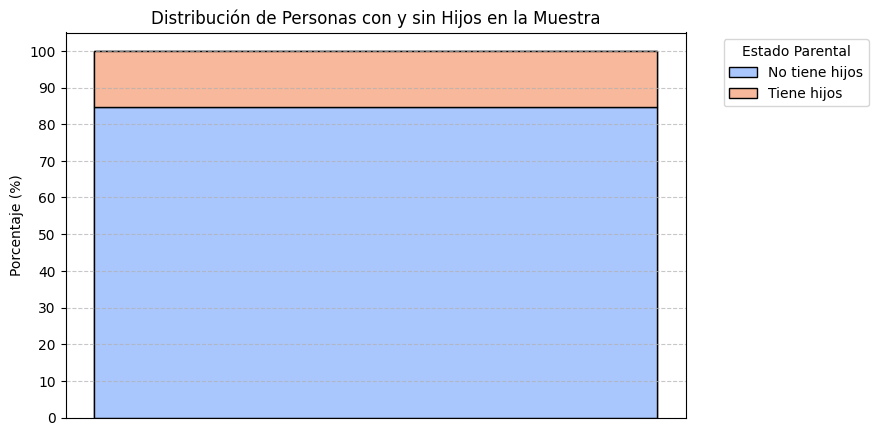

In [45]:

# Contar la frecuencia de tener hijos (1) o no tener hijos (0) en porcentaje
conteo_hijos = SET_EXPLORACION["HIJOS"].value_counts(normalize=True) * 100

# Asignar manualmente los nombres correctos (sabemos que el primer índice es 0 = "No tiene hijos")
conteo_hijos.index = ["No tiene hijos", "Tiene hijos"]

# --- Gráfico de barra apilada al 100% ---
plt.figure(figsize=(8, 5))
plt.bar("Muestra Total", 100, color="lightgray", edgecolor="black")  # Base al 100%
bottom = 0

# Agregar cada categoría en la barra apilada
for idx, (label, value) in enumerate(conteo_hijos.items()):
    plt.bar("Muestra Total", value, bottom=bottom, label=label,
            color=sns.color_palette("coolwarm", len(conteo_hijos))[idx], edgecolor="black")
    bottom += value

# Configuración del gráfico
plt.title("Distribución de Personas con y sin Hijos en la Muestra")
plt.ylabel("Porcentaje (%)")
plt.xticks([])  # Ocultar la etiqueta del eje X
plt.yticks(range(0, 110, 10))
plt.legend(title="Estado Parental", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Mostrar el gráfico
plt.show()

**Razones de quienes no consideran tener hijos de momento**

In [46]:
# Ver todas las columnas que contienen "NO_HIJOS_PQ"
[col for col in SET_EXPLORACION.columns if "NO_HIJOS_PQ" in col]

['NO_HIJOS_PQ']

<ipython-input-47-8317c00ba700>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=conteo_no_hijos.index, y=conteo_no_hijos.values, palette="coolwarm", edgecolor="black")


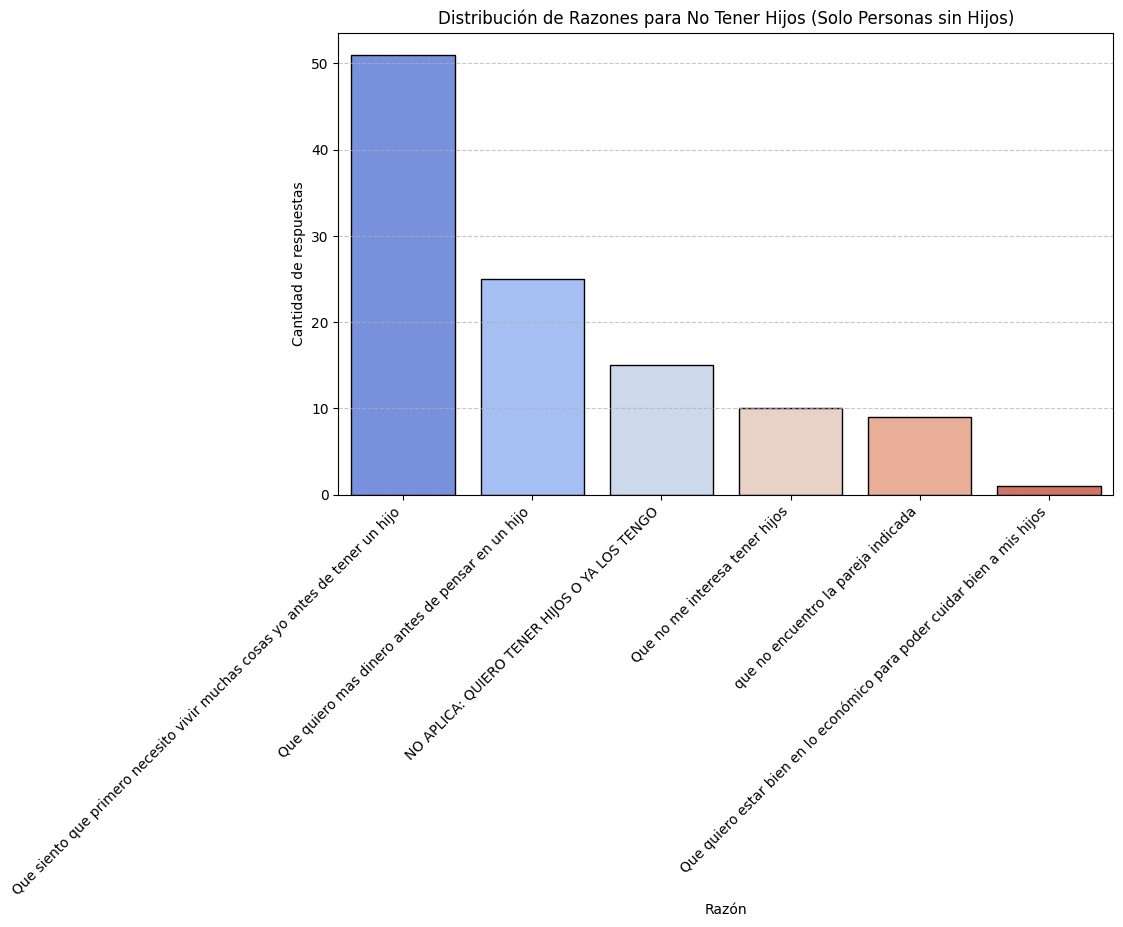

In [47]:
# Filtrar el dataset para incluir solo los casos donde HIJOS == 0
subset_no_hijos = SET_EXPLORACION[SET_EXPLORACION["HIJOS"] == 0].copy()

# Mapear directamente los valores de la columna NO_HIJOS_PQ eliminando el prefijo
subset_no_hijos["no_hijos_pq"] = subset_no_hijos["NO_HIJOS_PQ"].str.replace("NO_HIJOS_PQ_", "", regex=False)

# Contar la frecuencia de cada motivo dentro del subset (HIJOS == 0)
conteo_no_hijos = subset_no_hijos["no_hijos_pq"].value_counts()

# --- Gráfico de distribución de razones para no tener hijos ---
plt.figure(figsize=(10, 6))
sns.barplot(x=conteo_no_hijos.index, y=conteo_no_hijos.values, palette="coolwarm", edgecolor="black")
plt.title("Distribución de Razones para No Tener Hijos (Solo Personas sin Hijos)")
plt.ylabel("Cantidad de respuestas")
plt.xlabel("Razón")
plt.xticks(rotation=45, ha="right")
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Mostrar el gráfico
plt.show()

**Relacion entre etiqueta política y el hecho de tener hijos o querer tenerlos**

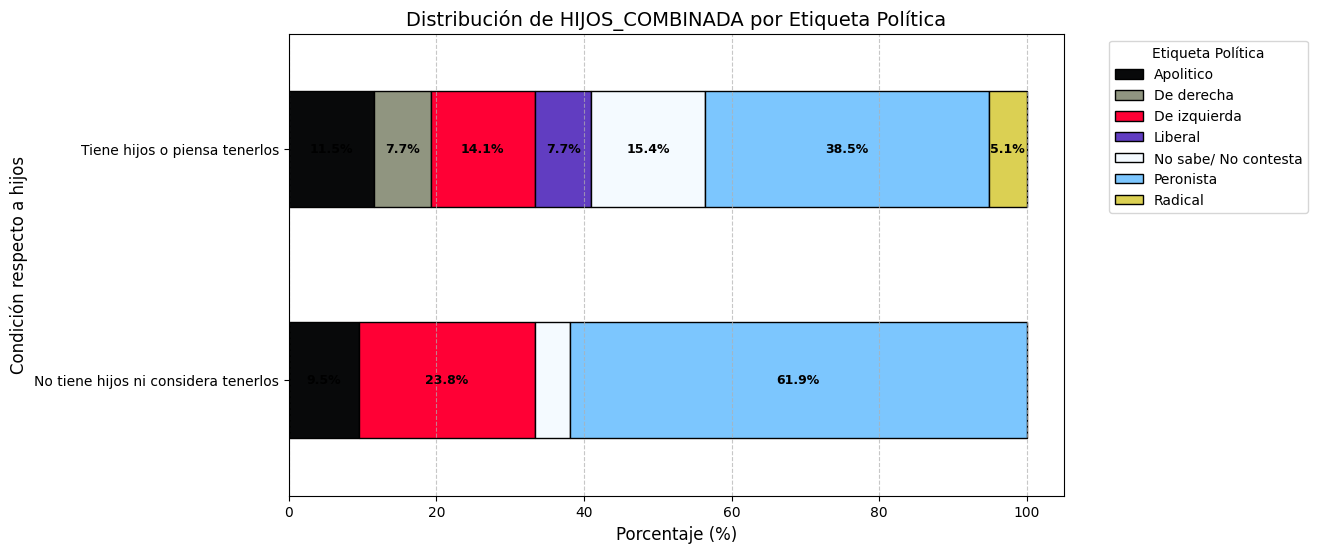

In [48]:
# Crear la tabla de frecuencias
df_pivot = SET_EXPLORACION.pivot_table(index="HIJOS_COMBINADA", columns="ETIQUETA", aggfunc="size", fill_value=0)

# Convertir a porcentaje por fila (cada fila suma 100%)
df_pivot_norm = df_pivot.div(df_pivot.sum(axis=1), axis=0) * 100

# Renombrar los valores del eje Y
df_pivot_norm = df_pivot_norm.rename(index={0: "No tiene hijos ni considera tenerlos", 1: "Tiene hijos o piensa tenerlos"})

# Crear el gráfico de barras apiladas al 100% en orientación horizontal
fig, ax = plt.subplots(figsize=(10, 6))
bars = df_pivot_norm.plot(kind="barh", stacked=True, color=[color_dict[col] for col in df_pivot_norm.columns], edgecolor="black", ax=ax)

# Agregar etiquetas de porcentaje dentro de las barras
for bar_container in bars.containers:
    for bar in bar_container:
        width = bar.get_width()
        if width > 5:  # Mostrar solo si es mayor a 5%
            ax.text(bar.get_x() + width / 2, bar.get_y() + bar.get_height() / 2,
                    f"{width:.1f}%", ha="center", va="center", fontsize=9, color="black", fontweight="bold")

# Configurar títulos y etiquetas
ax.set_xlabel("Porcentaje (%)", fontsize=12)
ax.set_ylabel("Condición respecto a hijos", fontsize=12)  # Cambio en el eje Y
ax.set_title("Distribución de HIJOS_COMBINADA por Etiqueta Política", fontsize=14)
ax.legend(title="Etiqueta Política", bbox_to_anchor=(1.05, 1), loc='upper left')
ax.grid(axis="x", linestyle="--", alpha=0.7)

# Mostrar el gráfico
plt.show()


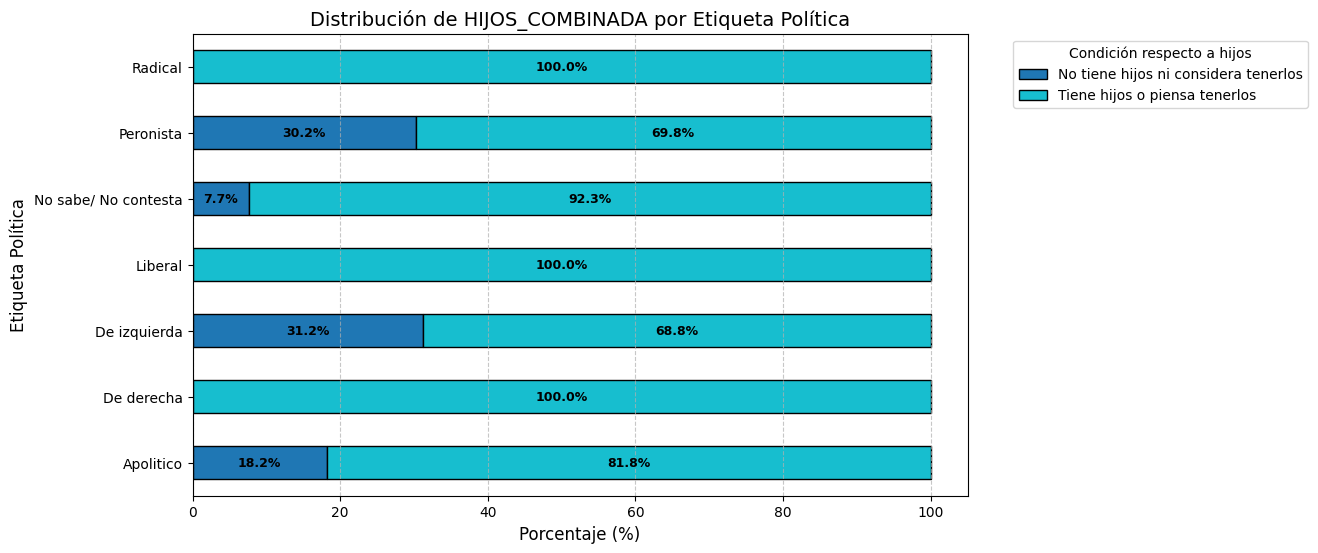

In [49]:
# Crear la tabla de frecuencias
df_pivot = SET_EXPLORACION.pivot_table(index="ETIQUETA", columns="HIJOS_COMBINADA", aggfunc="size", fill_value=0)

# Convertir a porcentaje por fila (cada fila suma 100%)
df_pivot_norm = df_pivot.div(df_pivot.sum(axis=1), axis=0) * 100

# Renombrar las categorías para la leyenda
df_pivot_norm = df_pivot_norm.rename(columns={0: "No tiene hijos ni considera tenerlos", 1: "Tiene hijos o piensa tenerlos"})

# Crear el gráfico de barras apiladas al 100% en orientación horizontal
fig, ax = plt.subplots(figsize=(10, 6))
bars = df_pivot_norm.plot(kind="barh", stacked=True, colormap="tab10", edgecolor="black", ax=ax)

# Agregar etiquetas de porcentaje dentro de las barras
for bar_container in bars.containers:
    for bar in bar_container:
        width = bar.get_width()
        if width > 5:  # Mostrar solo si es mayor a 5%
            ax.text(bar.get_x() + width / 2, bar.get_y() + bar.get_height() / 2,
                    f"{width:.1f}%", ha="center", va="center", fontsize=9, color="black", fontweight="bold")

# Configurar títulos y etiquetas
ax.set_xlabel("Porcentaje (%)", fontsize=12)
ax.set_ylabel("Etiqueta Política", fontsize=12)
ax.set_title("Distribución de HIJOS_COMBINADA por Etiqueta Política", fontsize=14)
ax.legend(title="Condición respecto a hijos", bbox_to_anchor=(1.05, 1), loc='upper left')
ax.grid(axis="x", linestyle="--", alpha=0.7)

# Mostrar el gráfico
plt.show()


> **Observaciones entre la idea de tener hijos y afiliación política**  
>
> En términos generales, la **mayoría de las personas identificadas con distintos partidos políticos tienen hijos o consideran tenerlos**. Sin embargo, existen diferencias notables entre los grupos.  
> - Los **peronistas y las personas identificadas con la izquierda son, por amplia diferencia, los más adversos a la idea de tener descendencia**.  
> - En contraste, otros sectores políticos presentan una mayor proporción de personas que ya son padres o que tienen la intención de serlo en el futuro.  


## Modelos de regresión Logistica

In [50]:
import statsmodels.api as sm
from patsy import dmatrices

### Modelos posibles

#### **MODELO L1**  
- Muchas variables predictoras
- Según porcentaje de los datos usados para train:  
accuracy al 70% : 57%  
accuracy al 60% : 53%

In [51]:
'''
SET_LOGISTICA=SET_MODELO[[ 'MASCOTHIJO', 'GORRA', 'EF', 'EJERCITO', 'TARIFAS', 'EMPRESARIOS', 'MALVINAS', 'EF_QUEES',
                               'EL_PROBLEMA', 'EEUU', 'PALESTINA', 'ISRAEL', 'UCRANIA', 'RUSIA', 'BOLIVIA', 'CHINA', 'INGLATERRA',
                                'GENERO','SOCIECON', 'TRABAJA', 'ETIQUETA',
                                'PROGRAMA_Un noticiero', 'PROGRAMA_Un partido de futbol intrascendente / El loco y el cuerdo',
                               'PROGRAMA_Un programa o video de ciencia o historia',
                                'NOTICIAS_C5N', 'NOTICIAS_Cronica', 'NOTICIAS_Prefiero no ver nada', 'NOTICIAS_TN']]
'''

"\nSET_LOGISTICA=SET_MODELO[[ 'MASCOTHIJO', 'GORRA', 'EF', 'EJERCITO', 'TARIFAS', 'EMPRESARIOS', 'MALVINAS', 'EF_QUEES',\n                               'EL_PROBLEMA', 'EEUU', 'PALESTINA', 'ISRAEL', 'UCRANIA', 'RUSIA', 'BOLIVIA', 'CHINA', 'INGLATERRA',\n                                'GENERO','SOCIECON', 'TRABAJA', 'ETIQUETA',\n                                'PROGRAMA_Un noticiero', 'PROGRAMA_Un partido de futbol intrascendente / El loco y el cuerdo',\n                               'PROGRAMA_Un programa o video de ciencia o historia',\n                                'NOTICIAS_C5N', 'NOTICIAS_Cronica', 'NOTICIAS_Prefiero no ver nada', 'NOTICIAS_TN']]\n"

#### **MODELO L2**  
- 23 VARIABLES PREDICTORAS
- Según porcentaje de los datos usados para train:  
accuracy al 70% :  60%   
accuracy al 60% :  49%

In [113]:

SET_LOGISTICA=SET_MODELO[['MASCOTHIJO', 'GORRA','EF','EJERCITO', 'TARIFAS', 'EMPRESARIOS', 'MALVINAS', 'EF_QUEES',
                               'EL_PROBLEMA', 'EEUU', 'PALESTINA', 'ISRAEL', 'BOLIVIA', 'CHINA',
                                'GENERO', 'TRABAJA', 'ETIQUETA',
                                'PROGRAMA_Un noticiero', 'PROGRAMA_Un partido de futbol intrascendente / El loco y el cuerdo',
                               'PROGRAMA_Un programa o video de ciencia o historia',
                                'NOTICIAS_C5N', 'NOTICIAS_Cronica', 'NOTICIAS_Prefiero no ver nada', 'NOTICIAS_TN']]


**Codigo para ejecución de modelos**

In [53]:
from sklearn.linear_model import LogisticRegression


In [54]:

# 1️⃣ Fijar una seed para reproducibilidad
SEED = 42
np.random.seed(SEED)

# 2️⃣ Convertir la variable objetivo `ETIQUETA` a valores numéricos (códigos)
SET_LOGISTICA["etiqueta_num"] = SET_LOGISTICA["ETIQUETA"].astype("category").cat.codes

# Guardar el mapeo de códigos a etiquetas
mapeo_etiquetas = dict(enumerate(SET_LOGISTICA["ETIQUETA"].astype("category").cat.categories))

# 3️⃣ Seleccionar las variables predictoras y asegurarse de que sean numéricas
predictoras = SET_LOGISTICA.drop(columns=["ETIQUETA", "etiqueta_num"])
predictoras = pd.get_dummies(predictoras, drop_first=True)  # Convertir variables categóricas en dummies

# 4️⃣ Definir X e y
X = predictoras
y = SET_LOGISTICA["etiqueta_num"]  # Variable objetivo con múltiples categorías

# 5️⃣ Dividir en train/test (% entrenamiento, % prueba)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=SEED, stratify=y)

# 6️⃣ Ajustar el modelo de Regresión Logística Multinomial
modelo = LogisticRegression(multi_class="multinomial", solver="lbfgs", max_iter=1000, random_state=SEED)
modelo.fit(X_train, y_train)

# 7️⃣ Hacer predicciones
y_pred = modelo.predict(X_test)

# 8️⃣ Evaluar el modelo
accuracy = accuracy_score(y_test, y_pred)

# 9️⃣ Reporte de clasificación con mapeo de etiquetas
reporte = classification_report(y_test, y_pred, target_names=[mapeo_etiquetas[i] for i in sorted(mapeo_etiquetas.keys())])

# 🔟 Matriz de confusión
cm = confusion_matrix(y_test, y_pred)

# 11️⃣ Obtener los coeficientes y calcular las Odds Ratios
odds_ratios = np.exp(modelo.coef_)  # Transformar los coeficientes en odds ratios

# Crear un DataFrame con los Odds Ratios
odds_ratios_df = pd.DataFrame(odds_ratios.T, index=X.columns, columns=[f"Clase {mapeo_etiquetas[i]}" for i in modelo.classes_])

# 🔟 Mostrar resultados
print(f"Precisión del modelo: {accuracy:.2%}")
print("\nReporte de Clasificación:\n", reporte)


Precisión del modelo: 60.00%

Reporte de Clasificación:
                       precision    recall  f1-score   support

           Apolitico       1.00      0.33      0.50         3
          De derecha       0.00      0.00      0.00         2
        De izquierda       0.50      0.33      0.40         6
             Liberal       0.50      0.33      0.40         3
No sabe/ No contesta       0.33      0.50      0.40         6
           Peronista       0.71      0.83      0.77        18
             Radical       0.67      1.00      0.80         2

            accuracy                           0.60        40
           macro avg       0.53      0.48      0.47        40
        weighted avg       0.59      0.60      0.57        40



<ipython-input-54-dbbef345a33a>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  SET_LOGISTICA["etiqueta_num"] = SET_LOGISTICA["ETIQUETA"].astype("category").cat.codes
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is",

**Matriz de confusión para L2**

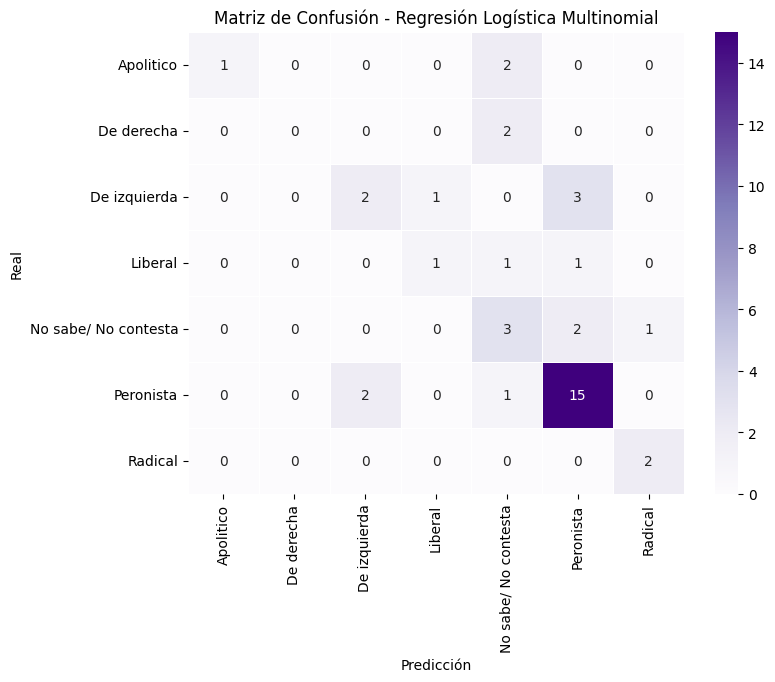

In [55]:
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Purples", linewidths=0.5, xticklabels=mapeo_etiquetas.values(), yticklabels=mapeo_etiquetas.values())
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.title("Matriz de Confusión - Regresión Logística Multinomial")
plt.show()

**Heat map con odds ratio para L2**

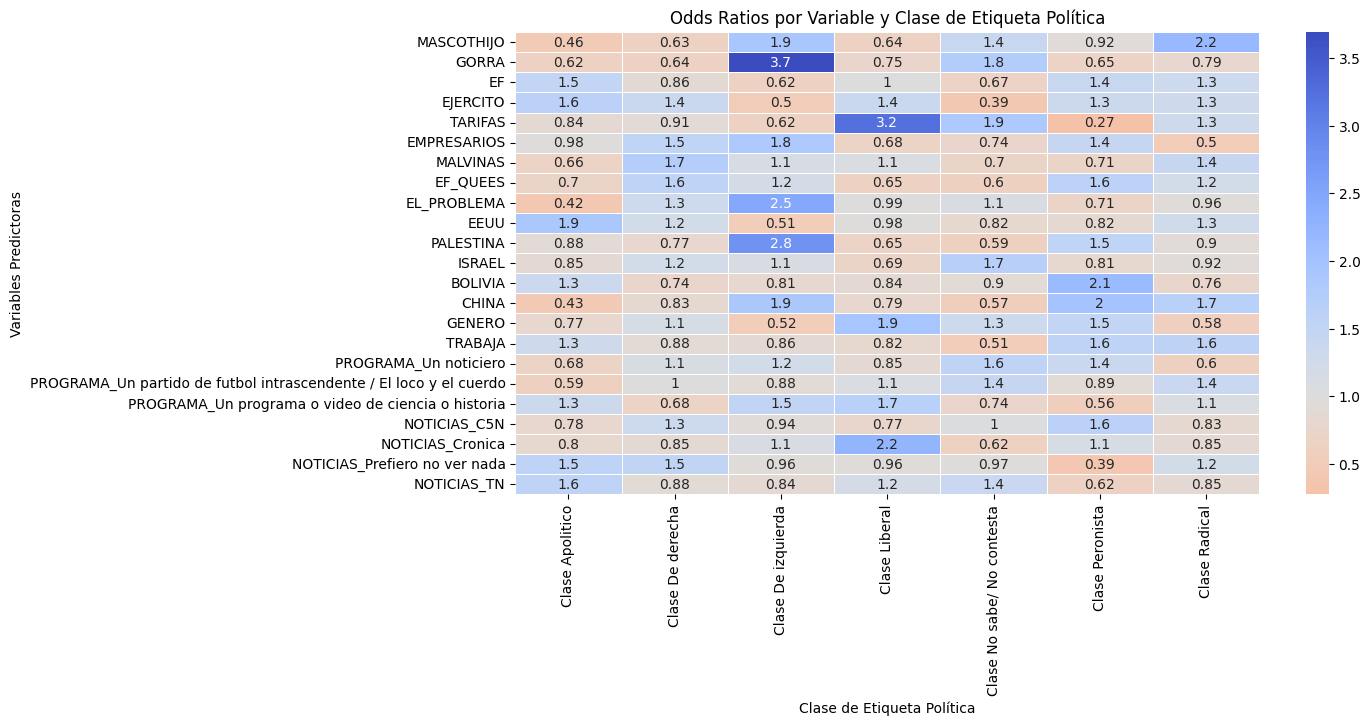

In [56]:
plt.figure(figsize=(12, 6))
sns.heatmap(odds_ratios_df, annot=True, cmap="coolwarm_r", center=1, linewidths=0.5)
plt.title("Odds Ratios por Variable y Clase de Etiqueta Política")
plt.xlabel("Clase de Etiqueta Política")
plt.ylabel("Variables Predictoras")
plt.show()

#### **MODELO L3**
Tomando como base le modelo L2
- Se aplicó validacíon cruzada con **K-folds** para evitar que los datos resultados obtenidos sena el resultado de una partición especifica de los datos  
- Se eliminaron las variables que menos aportan al modelo con **RFE (Recursive Feature Elimination)**.  

Mientras **L1** superaba a **L2** en terminos de Accuracy al trabajar con un 60% de los datos como soporte de train, **L2** superaba a **L1** al usar el 70% de los datos.

**L3**  
De este modo se obtuvo un modelo mas robusto con:
- 19 variables predictoras  
- Según porcentaje de los datos usados para train:  
accuracy al 70% :  60%   
accuracy al 60% :  53%

**Ejecución de L3**

In [114]:

from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.feature_selection import RFE

# 1️⃣ Fijar una seed para reproducibilidad
SEED = 42
np.random.seed(SEED)

# 2️⃣ Convertir la variable objetivo `ETIQUETA` a valores numéricos (códigos)
SET_LOGISTICA["etiqueta_num"] = SET_LOGISTICA["ETIQUETA"].astype("category").cat.codes

# Guardar el mapeo de códigos a etiquetas
mapeo_etiquetas = dict(enumerate(SET_LOGISTICA["ETIQUETA"].astype("category").cat.categories))

# 3️⃣ Seleccionar las variables predictoras y convertir variables categóricas en dummies
predictoras = SET_LOGISTICA.drop(columns=["ETIQUETA", "etiqueta_num"])
predictoras = pd.get_dummies(predictoras, drop_first=True)

# 4️⃣ Definir X e y
X = predictoras
y = SET_LOGISTICA["etiqueta_num"]

# 5️⃣ Dividir en train/test (% entrenamiento, % prueba)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=SEED, stratify=y
)

# 6️⃣ Validación Cruzada: Evaluar el modelo base con k-fold (5 particiones)
modelo_cv = LogisticRegression(multi_class="multinomial", solver="lbfgs", max_iter=1000, random_state=SEED)
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=SEED)
cv_scores = cross_val_score(modelo_cv, X, y, cv=cv, scoring="accuracy")
print("Accuracy promedio en CV:", np.mean(cv_scores))

# 7️⃣ Análisis de Variables: Selección de características con RFE
# Por ejemplo, seleccionamos 15 variables (puedes ajustar este número)
selector = RFE(estimator=modelo_cv, n_features_to_select=19, step=1)
selector.fit(X_train, y_train)
selected_features = X_train.columns[selector.support_]
print("Variables seleccionadas:", selected_features.tolist())

# 8️⃣ Reentrenar el modelo con las variables seleccionadas
modelo_final = LogisticRegression(multi_class="multinomial", solver="lbfgs", max_iter=1000, random_state=SEED)
modelo_final.fit(X_train[selected_features], y_train)

# 9️⃣ Hacer predicciones con el modelo final
y_pred = modelo_final.predict(X_test[selected_features])

# 🔟 Evaluar el modelo final
accuracy = accuracy_score(y_test, y_pred)
reporte = classification_report(
    y_test, y_pred, target_names=[mapeo_etiquetas[i] for i in sorted(mapeo_etiquetas.keys())]
)
cm = confusion_matrix(y_test, y_pred)

print(f"Precisión del modelo final: {accuracy:.2%}")
print("\nReporte de Clasificación:\n", reporte)


# 1️⃣1️⃣ Calcular las Odds Ratios (exponencial de los coeficientes) para el modelo final
odds_ratios = np.exp(modelo_final.coef_)
odds_ratios_df = pd.DataFrame(
    odds_ratios.T,
    index=selected_features,
    columns=[f"Clase {mapeo_etiquetas[i]}" for i in modelo_final.classes_]
)


Accuracy promedio en CV: 0.47378917378917385
Variables seleccionadas: ['MASCOTHIJO', 'GORRA', 'EF', 'EJERCITO', 'TARIFAS', 'EMPRESARIOS', 'MALVINAS', 'EF_QUEES', 'EL_PROBLEMA', 'EEUU', 'PALESTINA', 'BOLIVIA', 'CHINA', 'GENERO', 'TRABAJA', 'PROGRAMA_Un programa o video de ciencia o historia', 'NOTICIAS_Cronica', 'NOTICIAS_Prefiero no ver nada', 'NOTICIAS_TN']
Precisión del modelo final: 60.00%

Reporte de Clasificación:
                       precision    recall  f1-score   support

           Apolitico       1.00      0.33      0.50         3
          De derecha       0.00      0.00      0.00         2
        De izquierda       0.40      0.33      0.36         6
             Liberal       0.67      0.67      0.67         3
No sabe/ No contesta       0.40      0.67      0.50         6
           Peronista       0.70      0.78      0.74        18
             Radical       1.00      0.50      0.67         2

            accuracy                           0.60        40
           macro

<ipython-input-114-347c2118c624>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  SET_LOGISTICA["etiqueta_num"] = SET_LOGISTICA["ETIQUETA"].astype("category").cat.codes
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/p

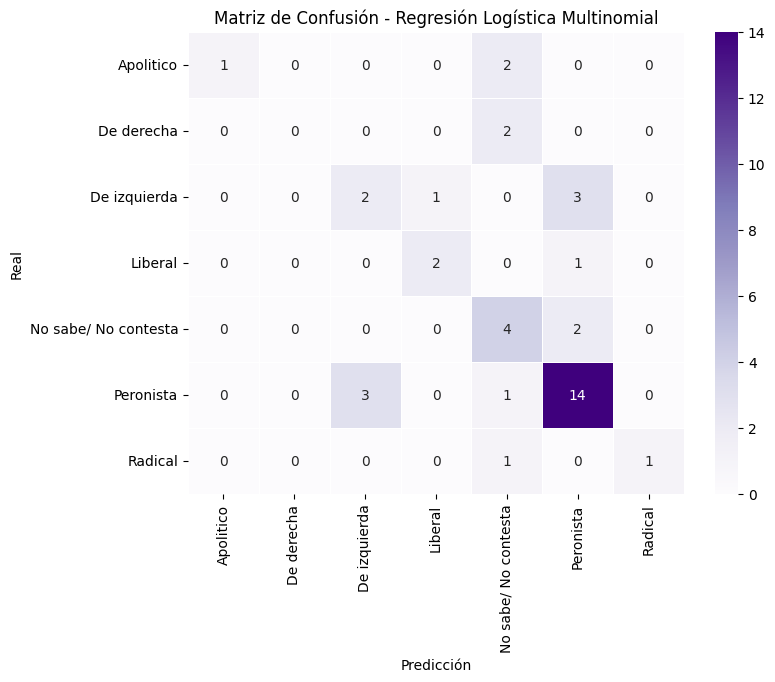

In [58]:
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Purples", linewidths=0.5, xticklabels=mapeo_etiquetas.values(), yticklabels=mapeo_etiquetas.values())
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.title("Matriz de Confusión - Regresión Logística Multinomial")
plt.show()

In [59]:
print(odds_ratios_df)

                                                    Clase Apolitico  Clase De derecha  Clase De izquierda  Clase Liberal  Clase No sabe/ No contesta  Clase Peronista  Clase Radical
MASCOTHIJO                                                 0.462067          0.636800            1.836930       0.623093                    1.395830         0.931974       2.282499
GORRA                                                      0.614204          0.647102            3.475668       0.750736                    1.774426         0.696130       0.780623
EF                                                         1.505347          0.862835            0.590015       0.995244                    0.674142         1.471072       1.322081
EJERCITO                                                   1.628240          1.374806            0.484371       1.353571                    0.432887         1.196467       1.315545
TARIFAS                                                    0.797471          0.923893          

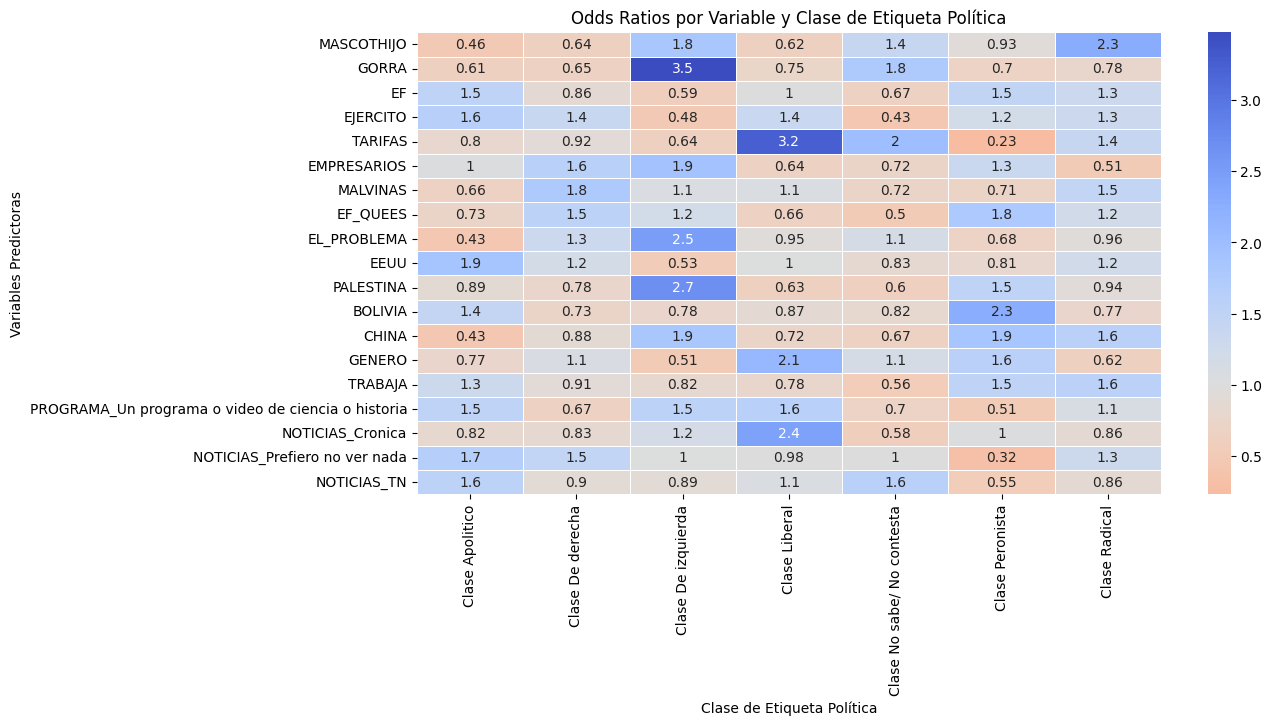

In [60]:
plt.figure(figsize=(12, 6))
sns.heatmap(odds_ratios_df, annot=True, cmap="coolwarm_r", center=1, linewidths=0.5)
plt.title("Odds Ratios por Variable y Clase de Etiqueta Política")
plt.xlabel("Clase de Etiqueta Política")
plt.ylabel("Variables Predictoras")
plt.show()

> Explicación de como trabaja RFE para eliminar varibales:
-Ordena las variables segun los coeficientes obtenidos y asigan valor 1 en el ranking a las N variables que busca conserver, y deshecha las demas

In [61]:
# Los coeficientes del modelo tienen la forma (n_clases, n_variables)
coeficientes = modelo_final.coef_

# Calcular el promedio de los valores absolutos de los coeficientes para cada variable a través de las clases
avg_importance = np.mean(np.abs(coeficientes), axis=0)

# Crear una Serie de pandas para ordenar y visualizar
importance_series = pd.Series(avg_importance, index=selected_features).sort_values(ascending=False)
print("Importancia promedio de las variables seleccionadas (ranking 1):")
print(importance_series)

Importancia promedio de las variables seleccionadas (ranking 1):
TARIFAS                                               0.633160
GORRA                                                 0.519790
MASCOTHIJO                                            0.504816
CHINA                                                 0.485430
EJERCITO                                              0.446338
EMPRESARIOS                                           0.415394
PROGRAMA_Un programa o video de ciencia o historia    0.407701
GENERO                                                0.405529
EF_QUEES                                              0.403795
PALESTINA                                             0.400569
EL_PROBLEMA                                           0.381331
BOLIVIA                                               0.335578
NOTICIAS_Prefiero no ver nada                         0.332024
TRABAJA                                               0.319705
MALVINAS                                             

In [62]:
# Crear una Serie con el ranking de cada variable
ranking_series = pd.Series(selector.ranking_, index=X_train.columns)
print("Ranking de las variables (de menor a mayor, donde 1 son las seleccionadas):")
print(ranking_series.sort_values())

Ranking de las variables (de menor a mayor, donde 1 son las seleccionadas):
MASCOTHIJO                                                            1
NOTICIAS_Cronica                                                      1
PROGRAMA_Un programa o video de ciencia o historia                    1
TRABAJA                                                               1
GENERO                                                                1
CHINA                                                                 1
BOLIVIA                                                               1
NOTICIAS_Prefiero no ver nada                                         1
PALESTINA                                                             1
NOTICIAS_TN                                                           1
EL_PROBLEMA                                                           1
EF_QUEES                                                              1
MALVINAS                                                    

> En cada modelo, se testeó el **VIF (Variance Inflation Factor**
Para detectar multicolinealidad y decidir variables a deshechar



In [63]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_data = pd.DataFrame()
vif_data["Variable"] = predictoras.columns
vif_data["VIF"] = [variance_inflation_factor(predictoras.values, i) for i in range(len(predictoras.columns))]

print(vif_data[vif_data["VIF"] > 10])  # Ver qué variables tienen VIF alto (mayor a 10)

Empty DataFrame
Columns: [Variable, VIF]
Index: []


**Mapa de Calor de los Valores Aproximados de Wald por Variable Predictora y Clase Política**

- En este gráfico se muestra, para cada combinación de variable predictora y clase política, un valor que imita el estadístico de Wald. Para obtenerlo, se tomó el coeficiente estimado de la regresión logística multinomial y se dividió por la desviación estándar de ese coeficiente entre clases, elevando después al cuadrado. Estos valores se presentan en una escala de colores (de claro a oscuro), de manera que los tonos más intensos indican valores más altos.

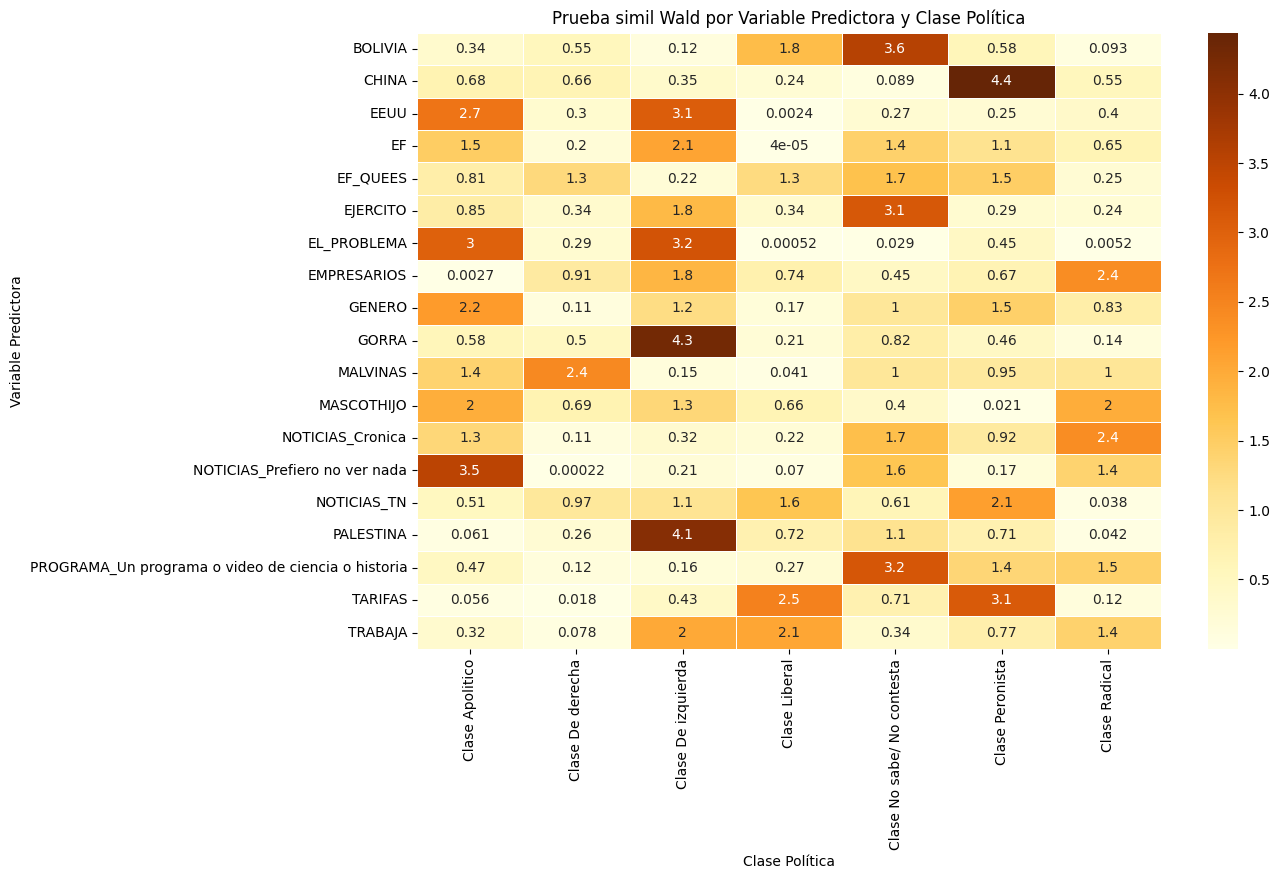

In [64]:
from scipy.stats import chi2_contingency

# 📌 **1. Calcular la prueba de Wald para cada variable en cada clase**
wald_results = []
for clase_idx, clase in enumerate(odds_ratios_df.columns):
    for variable in odds_ratios_df.index:
        coef = modelo.coef_[clase_idx][odds_ratios_df.index.get_loc(variable)]
        std_error = np.std(modelo.coef_[:, odds_ratios_df.index.get_loc(variable)])  # Aproximación del error estándar
        wald_stat = (coef / std_error) ** 2  # Estadístico de Wald
        p_value = 1 - np.exp(-wald_stat)  # p-valor aproximado
        wald_results.append((clase, variable, wald_stat, p_value))

# Convertir en DataFrame
wald_df = pd.DataFrame(wald_results, columns=["Clase Política", "Variable Predictora", "Wald Statistic", "P-Value"])
wald_pivot = wald_df.pivot(index="Variable Predictora", columns="Clase Política", values="Wald Statistic")

# 📌 **2. Visualización del test de Wald como Heatmap**
plt.figure(figsize=(12, 8))
sns.heatmap(wald_pivot, annot=True, cmap="YlOrBr", linewidths=0.5)
plt.title("Prueba simil Wald por Variable Predictora y Clase Política")
plt.xlabel("Clase Política")
plt.ylabel("Variable Predictora")
plt.show()


### Conclusión en regresión logistica

#### **1️⃣ Variables con mayor impacto en cada grupo político (>1.5)**

**Clase "De Izquierda"**
- **GORRA (3.50):** Estar de acuerdo con la frase *"Muerte a la gorra"* aumenta significativamente la probabilidad de identificarse con la izquierda.
- **PALESTINA (2.70):** Tener una opinión positiva sobre Palestina está fuertemente relacionada con la izquierda.
- **EL_PROBLEMA (2.50):** Creer que el problema de Argentina es la concentración de riqueza (y no la falta de pensamiento) es un fuerte predictor de identificación con la izquierda.

**Clase "De Derecha"**
- **MALVINAS (1.77):** Considerar a los excombatientes como héroes se asocia con la identidad de derecha.
- **EJERCITO (1.62):** Apoyar la frase *"El ejército es necesario"* está positivamente relacionado con la identidad de derecha.
- **EMPRESARIOS (1.61):** Creer que *"Los empresarios no son el problema"* aumenta la probabilidad de identificarse con la derecha.
- **NOTICIAS_Prefiero no ver nada (1.45):** preferir no ver noticias antes que ver TN, Cronica, A24 o C5N está asociado a la derecha.

**Clase "Liberal"**
- **TARIFAS (3.20):** Apoyar aumentos en servicios públicos y transporte es un factor clave de identificación liberal.
- **NOTICIAS_Cronica (2.40):** Preferir consumir *Crónica* como fuente de noticias está altamente asociado con el liberalismo.
- **GENERO (2.10):** Ser hombre aumenta la probabilidad de identificarse como liberal.

**Clase "Peronista"**
- **BOLIVIA (2.30):** Tener una visión positiva sobre Bolivia se correlaciona con una mayor probabilidad de identificarse como peronista.
- **CHINA (1.90):** Tener una opinión positiva sobre China es un fuerte predictor de identificación peronista.
- **EF_QUEES (1.79):** Creer que la educación financiera está más ligada al ahorro y la administración del dinero que a inversiones y criptomonedas es un indicador fuerte del peronismo.

**Clase "Radical"**
- **MASCOTHIJO (2.28):** Considerar que una mascota es equivalente a un hijo está fuertemente asociado con la identidad radical.

####**2️⃣ Variables con menor impacto en ciertas clases (<0.65)**

**Clase "De Izquierda"**
- **EJERCITO (0.48):** Apoyar la necesidad del ejército se asocia con una menor probabilidad de ser de izquierda.
- **EEUU (0.53):** Tener una visión positiva sobre Estados Unidos disminuye la probabilidad de identificarse como de izquierda.

**Clase "De Derecha"**
- **GORRA (0.65):** Tener una visión negativa sobre la frase *"Muerte a la gorra"* disminuye la probabilidad de ser de derecha en comparación con la izquierda.

**Clase "Peronista"**
- **TARIFAS (0.23):** No estar de acuerdo con aumentos en servicios públicos reduce considerablemente la probabilidad de ser peronista.
- **NOTICIAS_Prefiero no ver nada (0.32):** No consumir noticias disminuye la probabilidad de identificarse con el peronismo.

**Clase "Radical"**
- **EMPRESARIOS (0.50):** Creer que *"Los empresarios son el problema"* reduce la probabilidad de identificarse como radical.


## XG Boost

> **Ahora vamos a poner en practica el algoritmo XGBOOST**
Ya que esto puede volverse repetitivo, divido esta seccion en desarrollo y conclusiones para quienes quieran ir al grano.

### Desarrollo


#### Modelo con todas las variables
#### XGB1

In [65]:
# Separar las características (todas las columnas excepto 'ETIQUETAS')
X = SET_MODELO.drop(columns=['ETIQUETA'])

# Separar la variable objetivo ('ETIQUETAS')
y = SET_MODELO['ETIQUETA'].astype('category').cat.codes

In [66]:
print(dict(enumerate(SET_MODELO['ETIQUETA'].astype('category').cat.categories)))

{0: 'Apolitico', 1: 'De derecha', 2: 'De izquierda', 3: 'Liberal', 4: 'No sabe/ No contesta', 5: 'Peronista', 6: 'Radical'}


In [67]:
# Dividir en conjuntos de entrenamiento y prueba (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)

In [68]:
# Convertir los datos a DMatrix y usar los nombres originales de las características
dtrain = xgb.DMatrix(X_train, label=y_train, feature_names=X.columns.tolist())
dtest = xgb.DMatrix(X_test, label=y_test, feature_names=X.columns.tolist())

In [69]:
# Configurar los parámetros de XGBoost
params = {
    'objective': 'multi:softmax',  # Clasificación multiclase, se puede usar 'multi:softprob' para obtener probabilidades de pertenencia
    'num_class': 7,  # Número de clases
    'eval_metric': 'mlogloss',  # Función de pérdida
    'seed': 15
}

# Entrenar el modelo con 100 rondas de boosting
modelo_xgboost = xgb.train(params, dtrain, num_boost_round=100)

In [70]:
# Realizar predicciones en el conjunto de prueba
predicciones_xgboost = modelo_xgboost.predict(dtest)

# Calcular la precisión del modelo
accuracy = accuracy_score(y_test, predicciones_xgboost)
print(f'Precisión del modelo: {accuracy * 100:.2f}%')

Precisión del modelo: 50.00%


In [71]:
# Reporte de clasificación
print("Reporte de clasificación:\n", classification_report(y_test, predicciones_xgboost))

Reporte de clasificación:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         3
           1       1.00      0.50      0.67         2
           2       0.00      0.00      0.00         6
           3       0.20      0.33      0.25         3
           4       0.67      0.33      0.44         6
           5       0.59      0.89      0.71        18
           6       0.00      0.00      0.00         2

    accuracy                           0.50        40
   macro avg       0.35      0.29      0.30        40
weighted avg       0.43      0.50      0.44        40



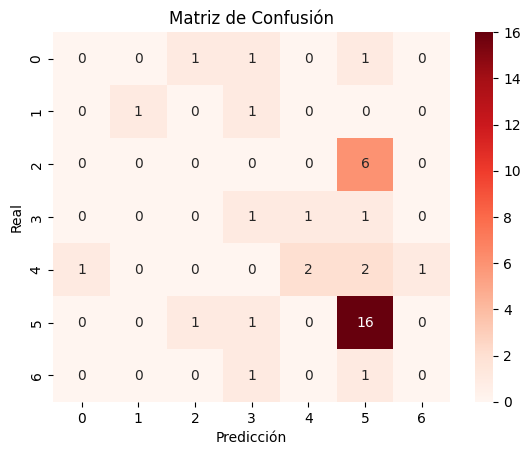

In [72]:
# Crear la matriz de confusión
cm = confusion_matrix(y_test, predicciones_xgboost)
sns.heatmap(cm, annot=True, fmt='d', cmap='Reds')
plt.title('Matriz de Confusión')
plt.xlabel('Predicción')
plt.ylabel('Real')
plt.show()

                                      Características  Importancia
4                                             NH_EDAD        142.0
29                                              MILEI        108.0
21                                            BOLIVIA         77.0
24                                             GENERO         64.0
25                                               EDAD         64.0
17                                          PALESTINA         63.0
22                                              CHINA         56.0
37  PROGRAMA_Un programa o video de ciencia o hist...         56.0
27                                           SOCIECON         53.0
39                      NOTICIAS_Prefiero no ver nada         52.0
2                                         BUSCA_HIJOS         48.0
43                                  GRUPO_Profesional         47.0
16                                               EEUU         45.0
10                                            TARIFAS         

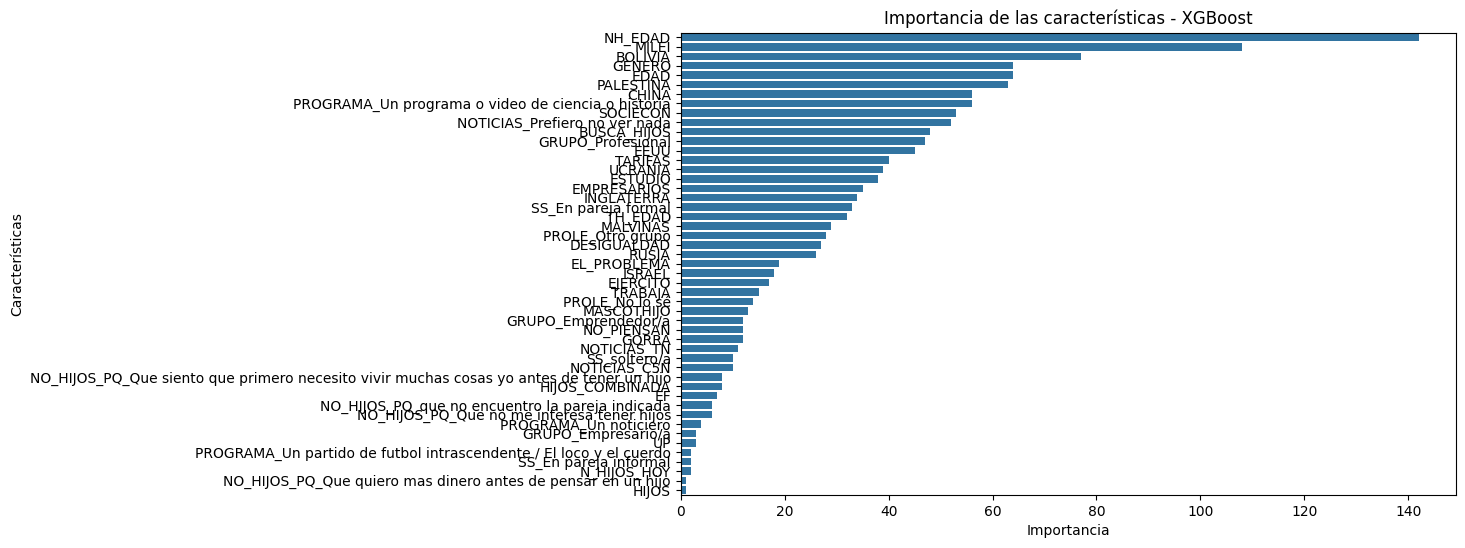

In [73]:
# Obtener la importancia de las características
importancia = modelo_xgboost.get_score(importance_type="weight")

# Convertir la importancia de características en un DataFrame para visualizar
importancia_df = pd.DataFrame({
    'Características': list(importancia.keys()),
    'Importancia': list(importancia.values())
})

# Ordenar por importancia descendente
importancia_df = importancia_df.sort_values(by="Importancia", ascending=False)
print(importancia_df)

# Graficar la importancia de las características con los nombres originales
plt.figure(figsize=(10, 6))
sns.barplot(x="Importancia", y="Características", data=importancia_df)
plt.title("Importancia de las características - XGBoost")
plt.show()

                                      Características  Importancia
29                                              MILEI     1.157940
36  PROGRAMA_Un partido de futbol intrascendente /...     0.943129
13                                        EL_PROBLEMA     0.715959
5                                                  UP     0.598186
3                                             TH_EDAD     0.591323
44    NO_HIJOS_PQ_que no encuentro la pareja indicada     0.577343
47  NO_HIJOS_PQ_Que siento que primero necesito vi...     0.569694
20                                              RUSIA     0.537267
10                                            TARIFAS     0.492962
18                                             ISRAEL     0.491061
48                                    HIJOS_COMBINADA     0.415759
16                                               EEUU     0.412522
22                                              CHINA     0.377029
40                                        NOTICIAS_TN     0.35

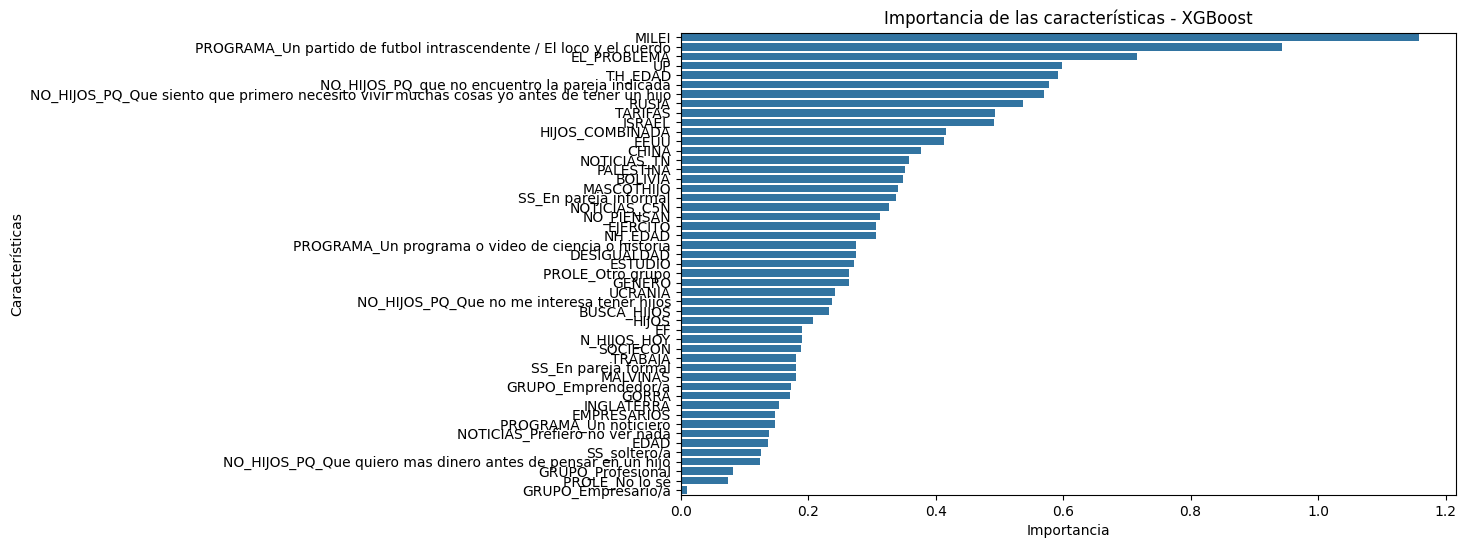

In [74]:
# Obtener la importancia de las características
importancia = modelo_xgboost.get_score(importance_type="gain")

# Convertir la importancia de características en un DataFrame para visualizar
importancia_df = pd.DataFrame({
    'Características': list(importancia.keys()),
    'Importancia': list(importancia.values())
})

# Ordenar por importancia descendente
importancia_df = importancia_df.sort_values(by="Importancia", ascending=False)
print(importancia_df)

# Graficar la importancia de las características con los nombres originales
plt.figure(figsize=(10, 6))
sns.barplot(x="Importancia", y="Características", data=importancia_df)
plt.title("Importancia de las características - XGBoost")
plt.show()

 **Resultados del primer ejercicio**   

>Dividiendo los datos en un 30/70
- Precision del modelo: 45% (Muy alta en ciencias sociales)  
- TOP 5 DE VARIABLES EN CUANTO A SU PESO  
EDAD        127.0  
MILEI         90.0  
BOLIVIA         85.0  
GENERO         81.0  
PALESTINA         72.0  
- TOP 5 VARIABLES EN CUANTO A LA GANANCIA COMO REDUCCION DEL ERROR:  
MILEI     1.356824  
PROGRAMA_Un partido de futbol intrascendente /...     0.935727  
SS_En pareja informal     0.796677  
EL_PROBLEMA     0.691647  
NO_HIJOS_PQ_que no encuentro la pareja indicada     0.666770  
EF     0.544002  

>Dividiendo los datos en un 40/60
- La precision aumenta a 47,2%

#### Modelo basado en la percepción sobre países
#### XGB2

In [75]:
SET_MODELO.columns

Index(['HIJOS', 'N_HIJOS_HOY', 'BUSCA_HIJOS', 'N_BUSCA_HIJOS', 'TH_EDAD', 'NH_EDAD', 'UP', 'MASCOTHIJO', 'GORRA', 'EF', 'EJERCITO', 'TARIFAS', 'EMPRESARIOS', 'MALVINAS', 'EF_QUEES', 'EL_PROBLEMA', 'DESIGUALDAD', 'NO_PIENSAN', 'EEUU', 'PALESTINA', 'ISRAEL', 'UCRANIA', 'RUSIA', 'BOLIVIA', 'CHINA', 'INGLATERRA', 'GENERO', 'EDAD', 'ESTUDIO', 'SOCIECON', 'TRABAJA', 'MILEI', 'ETIQUETA', 'PROLE_No lo sé', 'PROLE_Otro grupo', 'PROLE_NA', 'SS_En pareja formal', 'SS_En pareja informal', 'SS_soltero/a', 'PROGRAMA_Un noticiero', 'PROGRAMA_Un partido de futbol intrascendente / El loco y el cuerdo', 'PROGRAMA_Un programa o video de ciencia o historia', 'NOTICIAS_C5N', 'NOTICIAS_Cronica', 'NOTICIAS_Prefiero no ver nada', 'NOTICIAS_TN', 'GRUPO_Emprendedor/a', 'GRUPO_Empresario/a', 'GRUPO_Profesional', 'GRUPO_NA', 'NO_HIJOS_PQ_No me interesa tener mas hijos', 'NO_HIJOS_PQ_que no encuentro la pareja indicada', 'NO_HIJOS_PQ_Que no me interesa tener hijos',
       'NO_HIJOS_PQ_Que quiero estar bien en lo 

Precisión del modelo: 37.50%
Reporte de clasificación:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         3
           1       0.00      0.00      0.00         2
           2       0.00      0.00      0.00         6
           3       0.00      0.00      0.00         3
           4       0.00      0.00      0.00         6
           5       0.54      0.83      0.65        18
           6       0.00      0.00      0.00         2

    accuracy                           0.38        40
   macro avg       0.08      0.12      0.09        40
weighted avg       0.24      0.38      0.29        40



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


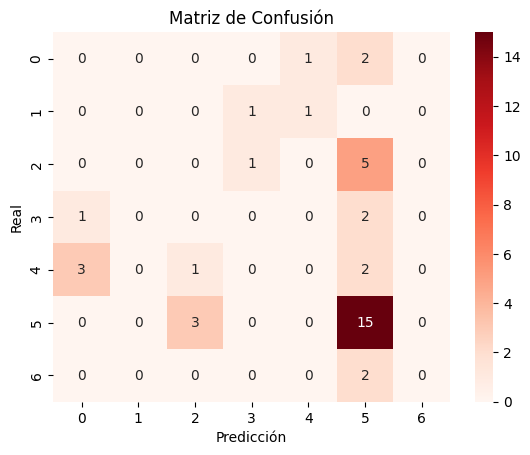

  Características  Importancia
7      INGLATERRA        598.0
5         BOLIVIA        429.0
0            EEUU        385.0
2          ISRAEL        326.0
6           CHINA        325.0
4           RUSIA        271.0
1       PALESTINA        260.0
3         UCRANIA        153.0


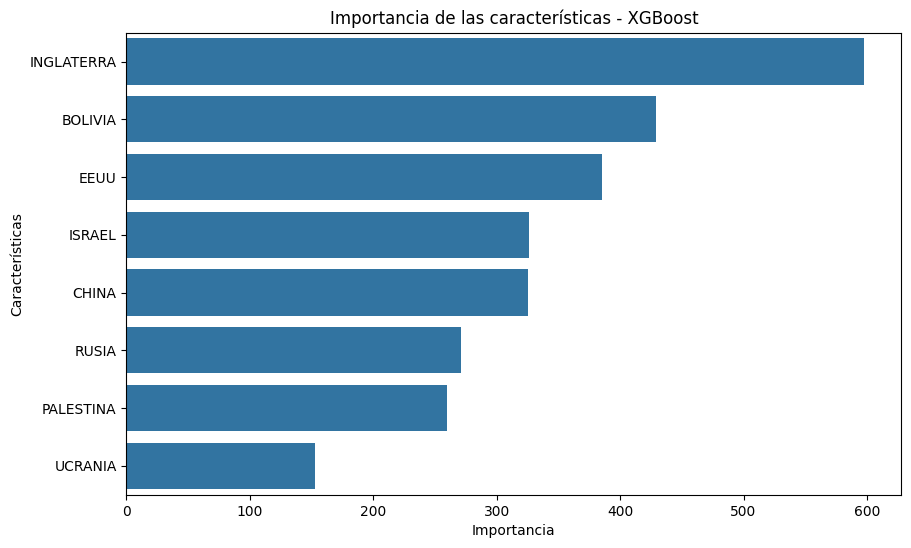

  Características  Importancia
3         UCRANIA     0.264683
1       PALESTINA     0.219818
6           CHINA     0.189136
4           RUSIA     0.187591
5         BOLIVIA     0.155964
2          ISRAEL     0.150972
0            EEUU     0.144925
7      INGLATERRA     0.091183


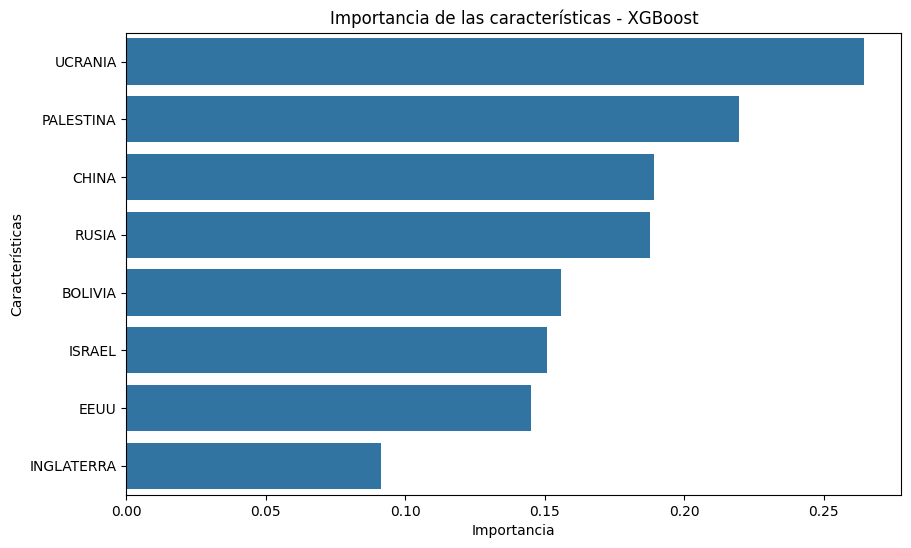

In [76]:
# Separar las características (todas las columnas excepto 'ETIQUETAS')
X = SET_MODELO[['EEUU', 'PALESTINA', 'ISRAEL', 'UCRANIA', 'RUSIA', 'BOLIVIA', 'CHINA',
       'INGLATERRA']]

# Separar la variable objetivo ('ETIQUETAS')
y = SET_MODELO['ETIQUETA'].astype('category').cat.codes


##########################################################################################################################################
# Dividir en conjuntos de entrenamiento y prueba (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)
##########################################################################################################################################
# Convertir los datos a DMatrix y usar los nombres originales de las características
dtrain = xgb.DMatrix(X_train, label=y_train, feature_names=X.columns.tolist())
dtest = xgb.DMatrix(X_test, label=y_test, feature_names=X.columns.tolist())

##########################################################################################################################################
# Configurar los parámetros de XGBoost
params = {
    'objective': 'multi:softmax',  # Clasificación multiclase, se puede usar 'multi:softprob' para obtener probabilidades de pertenencia
    'num_class': 7,  # Número de clases
    'eval_metric': 'mlogloss',  # Función de pérdida
    'seed': 15
}
##########################################################################################################################################
# Entrenar el modelo con 100 rondas de boosting
modelo_xgboost = xgb.train(params, dtrain, num_boost_round=100)

# Realizar predicciones en el conjunto de prueba
predicciones_xgboost = modelo_xgboost.predict(dtest)
##########################################################################################################################################
# Calcular la precisión del modelo
accuracy = accuracy_score(y_test, predicciones_xgboost)
print(f'Precisión del modelo: {accuracy * 100:.2f}%')
##########################################################################################################################################
# Reporte de clasificación
print("Reporte de clasificación:\n", classification_report(y_test, predicciones_xgboost))

##########################################################################################################################################
# Crear la matriz de confusión
cm = confusion_matrix(y_test, predicciones_xgboost)
sns.heatmap(cm, annot=True, fmt='d', cmap='Reds')
plt.title('Matriz de Confusión')
plt.xlabel('Predicción')
plt.ylabel('Real')
plt.show()

##########################################################################################################################################
# Obtener la importancia de las características
importancia = modelo_xgboost.get_score(importance_type="weight")

# Convertir la importancia de características en un DataFrame para visualizar
importancia_df = pd.DataFrame({
    'Características': list(importancia.keys()),
    'Importancia': list(importancia.values())
})

# Ordenar por importancia descendente
importancia_df = importancia_df.sort_values(by="Importancia", ascending=False)
print(importancia_df)

# Graficar la importancia de las características con los nombres originales
plt.figure(figsize=(10, 6))
sns.barplot(x="Importancia", y="Características", data=importancia_df)
plt.title("Importancia de las características - XGBoost")
plt.show()

##########################################################################################################################################
# Obtener la importancia de las características
importancia = modelo_xgboost.get_score(importance_type="gain")

# Convertir la importancia de características en un DataFrame para visualizar
importancia_df = pd.DataFrame({
    'Características': list(importancia.keys()),
    'Importancia': list(importancia.values())
})

# Ordenar por importancia descendente
importancia_df = importancia_df.sort_values(by="Importancia", ascending=False)
print(importancia_df)

# Graficar la importancia de las características con los nombres originales
plt.figure(figsize=(10, 6))
sns.barplot(x="Importancia", y="Características", data=importancia_df)
plt.title("Importancia de las características - XGBoost")
plt.show()

**Resultados del segundo ejercicio**
>Dividiendo los datos en un 30/70
- Precision del modelo: 37% (Interesante teniendo en cuanta las pocas variables utilizadas y que todas pertenezacan a la dimension de las relaciones internacionales)  
- TOP 5 DE VARIABLES EN CUANTO A SU PESO  
BOLIVIA        449.0
INGLATERRA        425.0
EEUU        407.0
CHINA        307.0
RUSIA        230.0
- TOP 5 VARIABLES EN CUANTO A LA GANANCIA COMO REDUCCION DEL ERROR:  
PALESTINA     0.269620
RUSIA     0.192601
UCRANIA     0.174688
BOLIVIA     0.155409
CHINA     0.149262

>Dividiendo los datos en un 40/60
- La precision aumenta a 43%

#### MODELO 3
#### XGB3

Precisión del modelo: 40.00%
Reporte de clasificación:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         3
           1       0.50      0.50      0.50         2
           2       0.00      0.00      0.00         6
           3       0.00      0.00      0.00         3
           4       0.33      0.17      0.22         6
           5       0.54      0.72      0.62        18
           6       1.00      0.50      0.67         2

    accuracy                           0.40        40
   macro avg       0.34      0.27      0.29        40
weighted avg       0.37      0.40      0.37        40



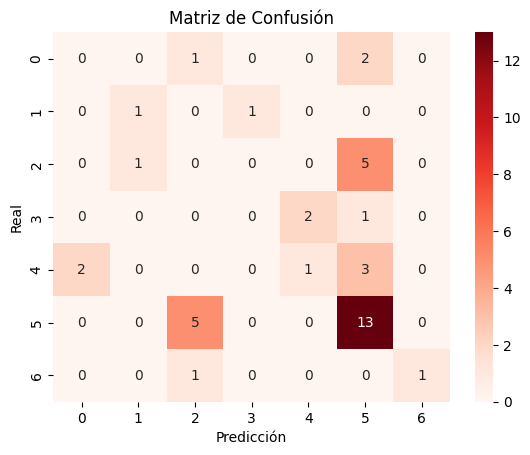

   Características  Importancia
20            EDAD       1250.0
11      NO_PIENSAN        405.0
19      INGLATERRA        319.0
17         BOLIVIA        300.0
1       MASCOTHIJO        293.0
13       PALESTINA        291.0
21          GENERO        266.0
6      EMPRESARIOS        260.0
18           CHINA        255.0
14          ISRAEL        221.0
5          TARIFAS        213.0
12            EEUU        202.0
7         MALVINAS        192.0
16           RUSIA        123.0
15         UCRANIA        111.0
9      EL_PROBLEMA         89.0
10     DESIGUALDAD         58.0
3               EF         32.0
4         EJERCITO         26.0
2            GORRA         17.0
0               UP          4.0
8         EF_QUEES          1.0


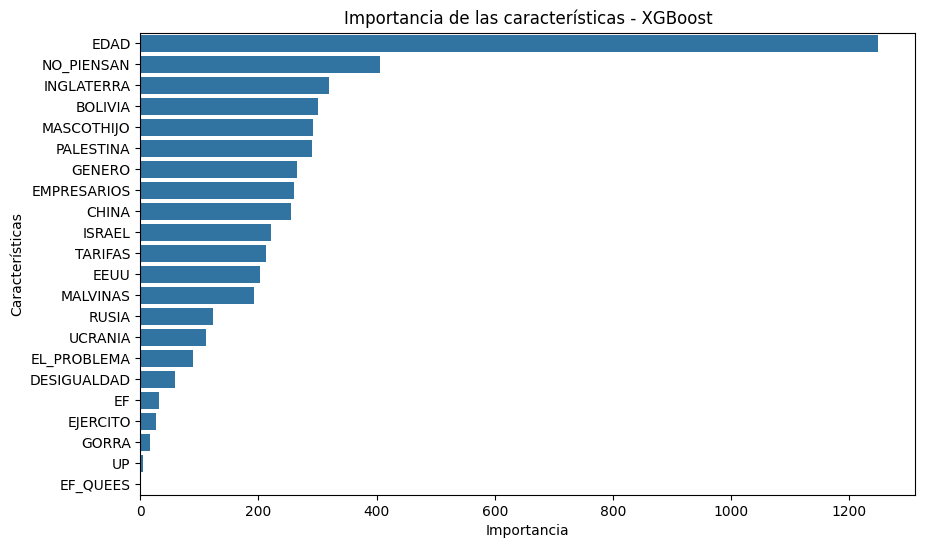

   Características  Importancia
0               UP     0.808460
5          TARIFAS     0.294160
10     DESIGUALDAD     0.246909
9      EL_PROBLEMA     0.232471
4         EJERCITO     0.228469
15         UCRANIA     0.224629
16           RUSIA     0.212148
3               EF     0.206409
8         EF_QUEES     0.202363
17         BOLIVIA     0.190392
2            GORRA     0.187319
18           CHINA     0.170976
12            EEUU     0.152812
13       PALESTINA     0.129742
14          ISRAEL     0.119279
19      INGLATERRA     0.092557
21          GENERO     0.074927
20            EDAD     0.043092
11      NO_PIENSAN     0.035029
7         MALVINAS     0.034531
1       MASCOTHIJO     0.029385
6      EMPRESARIOS     0.028728


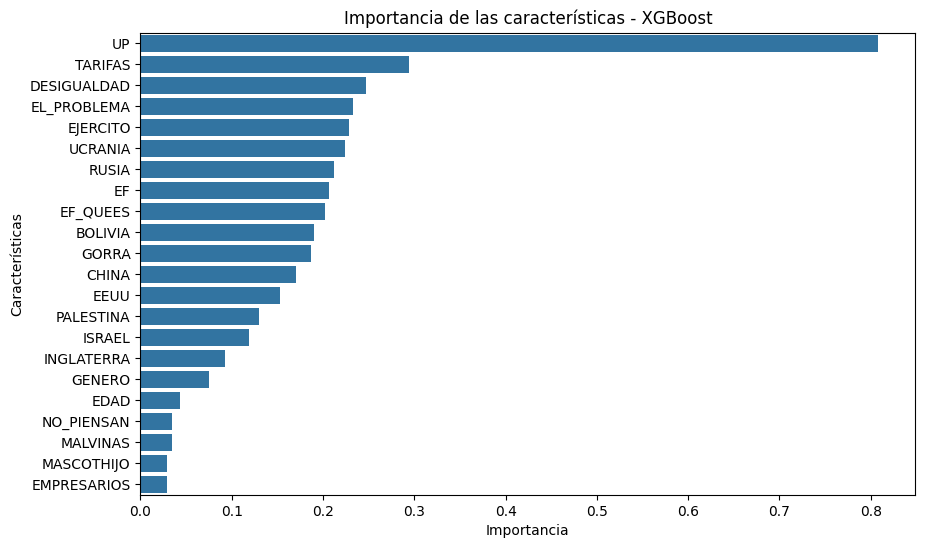

In [77]:
# Separar las características (todas las columnas excepto 'ETIQUETAS')
X = SET_MODELO[['UP', 'MASCOTHIJO', 'GORRA', 'EF', 'EJERCITO', 'TARIFAS', 'EMPRESARIOS',
       'MALVINAS', 'EF_QUEES','EL_PROBLEMA', 'DESIGUALDAD', 'NO_PIENSAN',
       'EEUU', 'PALESTINA', 'ISRAEL', 'UCRANIA', 'RUSIA', 'BOLIVIA', 'CHINA',
       'INGLATERRA','EDAD','GENERO']]

# Separar la variable objetivo ('ETIQUETAS')
y = SET_MODELO['ETIQUETA'].astype('category').cat.codes


##########################################################################################################################################
# Dividir en conjuntos de entrenamiento y prueba (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)
##########################################################################################################################################
# Convertir los datos a DMatrix y usar los nombres originales de las características
dtrain = xgb.DMatrix(X_train, label=y_train, feature_names=X.columns.tolist())
dtest = xgb.DMatrix(X_test, label=y_test, feature_names=X.columns.tolist())

##########################################################################################################################################
# Configurar los parámetros de XGBoost
params = {
    'objective': 'multi:softmax',  # Clasificación multiclase, se puede usar 'multi:softprob' para obtener probabilidades de pertenencia
    'num_class': 7,  # Número de clases
    'eval_metric': 'mlogloss',  # Función de pérdida
    'seed': 15
}
##########################################################################################################################################
# Entrenar el modelo con 100 rondas de boosting
modelo_xgboost = xgb.train(params, dtrain, num_boost_round=500)

# Realizar predicciones en el conjunto de prueba
predicciones_xgboost = modelo_xgboost.predict(dtest)
##########################################################################################################################################
# Calcular la precisión del modelo
accuracy = accuracy_score(y_test, predicciones_xgboost)
print(f'Precisión del modelo: {accuracy * 100:.2f}%')
##########################################################################################################################################
# Reporte de clasificación
print("Reporte de clasificación:\n", classification_report(y_test, predicciones_xgboost))

##########################################################################################################################################
# Crear la matriz de confusión
cm = confusion_matrix(y_test, predicciones_xgboost)
sns.heatmap(cm, annot=True, fmt='d', cmap='Reds')
plt.title('Matriz de Confusión')
plt.xlabel('Predicción')
plt.ylabel('Real')
plt.show()

##########################################################################################################################################
# Obtener la importancia de las características
importancia = modelo_xgboost.get_score(importance_type="weight")

# Convertir la importancia de características en un DataFrame para visualizar
importancia_df = pd.DataFrame({
    'Características': list(importancia.keys()),
    'Importancia': list(importancia.values())
})

# Ordenar por importancia descendente
importancia_df = importancia_df.sort_values(by="Importancia", ascending=False)
print(importancia_df)

# Graficar la importancia de las características con los nombres originales
plt.figure(figsize=(10, 6))
sns.barplot(x="Importancia", y="Características", data=importancia_df)
plt.title("Importancia de las características - XGBoost")
plt.show()

##########################################################################################################################################
# Obtener la importancia de las características
importancia = modelo_xgboost.get_score(importance_type="gain")

# Convertir la importancia de características en un DataFrame para visualizar
importancia_df = pd.DataFrame({
    'Características': list(importancia.keys()),
    'Importancia': list(importancia.values())
})

# Ordenar por importancia descendente
importancia_df = importancia_df.sort_values(by="Importancia", ascending=False)
print(importancia_df)

# Graficar la importancia de las características con los nombres originales
plt.figure(figsize=(10, 6))
sns.barplot(x="Importancia", y="Características", data=importancia_df)
plt.title("Importancia de las características - XGBoost")
plt.show()

Precision con división de conjunto de datos 30/70 : 40 %
Precision con división de conjunto de datos 40/60 : 45,3%
*Puntos fuertes de este modelo:*
-Sin necesidad de incluir una variable tan autoevidente como MILEI (Percepción frente al gobierno de Milei) Se logra una performance cercana al modelo con todas las variables.

#### Modelo 4 (Modelo 3+ variables de noticia)
#### XGB4

Este modelo incialmente se companía de estas varibales predictoras

In [78]:
'''
X = SET_MODELO[['UP', 'MASCOTHIJO', 'GORRA', 'EF', 'EJERCITO', 'TARIFAS', 'EMPRESARIOS',
       'MALVINAS', 'EF_QUEES','EL_PROBLEMA', 'DESIGUALDAD', 'NO_PIENSAN',
       'EEUU', 'PALESTINA', 'ISRAEL', 'UCRANIA', 'RUSIA', 'BOLIVIA', 'CHINA',
       'INGLATERRA','EDAD','GENERO','NOTICIAS_C5N',
       'NOTICIAS_Cronica', 'NOTICIAS_Prefiero no ver nada', 'NOTICIAS_TN']]
'''

"\nX = SET_MODELO[['UP', 'MASCOTHIJO', 'GORRA', 'EF', 'EJERCITO', 'TARIFAS', 'EMPRESARIOS',\n       'MALVINAS', 'EF_QUEES','EL_PROBLEMA', 'DESIGUALDAD', 'NO_PIENSAN',\n       'EEUU', 'PALESTINA', 'ISRAEL', 'UCRANIA', 'RUSIA', 'BOLIVIA', 'CHINA',\n       'INGLATERRA','EDAD','GENERO','NOTICIAS_C5N',\n       'NOTICIAS_Cronica', 'NOTICIAS_Prefiero no ver nada', 'NOTICIAS_TN']]\n"

Pero la performance no mejoraba con respecto a XGB3


#### Modelo 5 (Mismas 19 variables que en el mejor modelo de regresíon logistica)
#### XGB5

In [115]:
X = SET_MODELO[[
    "TARIFAS",
    "GORRA",
    "MASCOTHIJO",
    "CHINA",
    "EJERCITO",
    "EMPRESARIOS",
    "PROGRAMA_Un programa o video de ciencia o historia",
    "GENERO",
    "EF_QUEES",
    "PALESTINA",
    "EL_PROBLEMA",
    "BOLIVIA",
    "NOTICIAS_Prefiero no ver nada",
    "TRABAJA",
    "MALVINAS",
    "NOTICIAS_Cronica",
    "EF",
    "EEUU",
    "NOTICIAS_TN" # Manteniendo la variable objetivo
]]


Precisión del modelo: 42.50%
Reporte de clasificación:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         3
           1       0.33      0.50      0.40         2
           2       0.00      0.00      0.00         6
           3       1.00      0.33      0.50         3
           4       0.50      0.17      0.25         6
           5       0.52      0.72      0.60        18
           6       1.00      0.50      0.67         2

    accuracy                           0.42        40
   macro avg       0.48      0.32      0.35        40
weighted avg       0.45      0.42      0.40        40



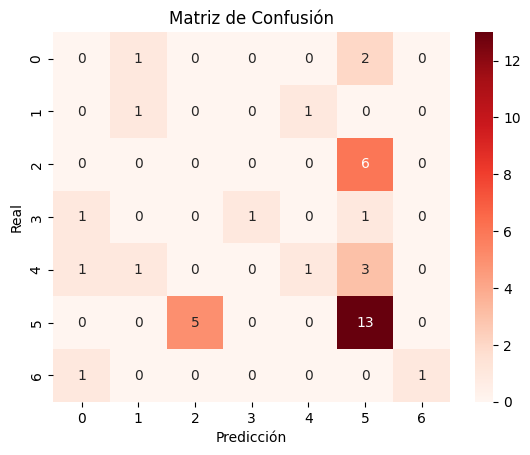

                                      Características  Importancia
14                                           MALVINAS        566.0
9                                           PALESTINA        562.0
7                                              GENERO        468.0
17                                               EEUU        436.0
6   PROGRAMA_Un programa o video de ciencia o hist...        434.0
18                                        NOTICIAS_TN        420.0
11                                            BOLIVIA        383.0
3                                               CHINA        375.0
12                      NOTICIAS_Prefiero no ver nada        363.0
13                                            TRABAJA        255.0
10                                        EL_PROBLEMA        243.0
5                                         EMPRESARIOS        235.0
0                                             TARIFAS        209.0
2                                          MASCOTHIJO        2

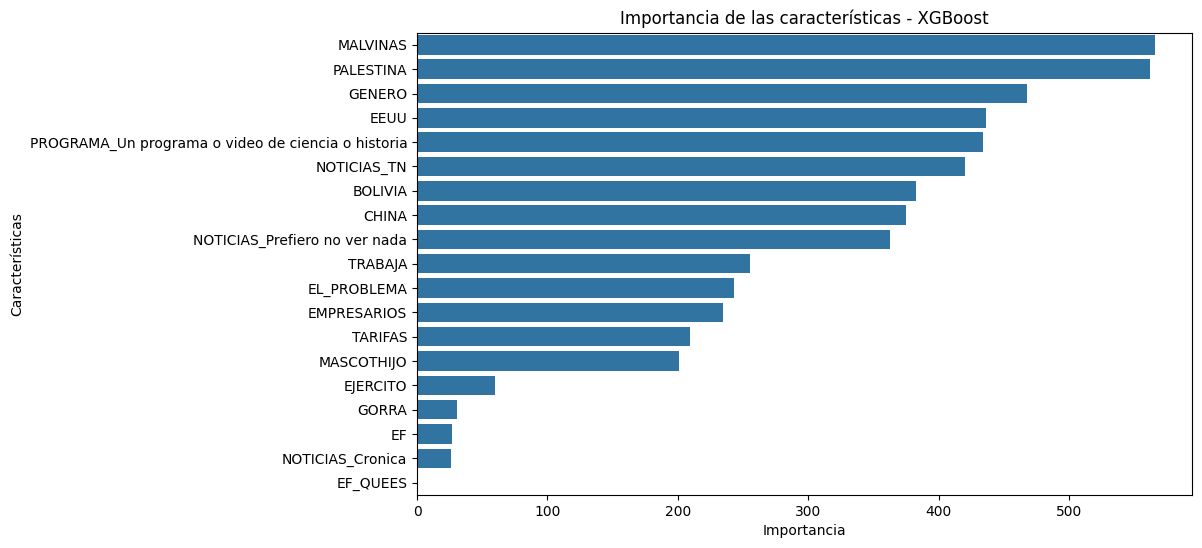

                                      Características  Importancia
8                                            EF_QUEES     0.925057
15                                   NOTICIAS_Cronica     0.406076
0                                             TARIFAS     0.295906
16                                                 EF     0.216148
1                                               GORRA     0.203425
3                                               CHINA     0.172659
4                                            EJERCITO     0.158419
11                                            BOLIVIA     0.145720
10                                        EL_PROBLEMA     0.114464
9                                           PALESTINA     0.092767
17                                               EEUU     0.092070
6   PROGRAMA_Un programa o video de ciencia o hist...     0.082492
18                                        NOTICIAS_TN     0.071623
2                                          MASCOTHIJO     0.06

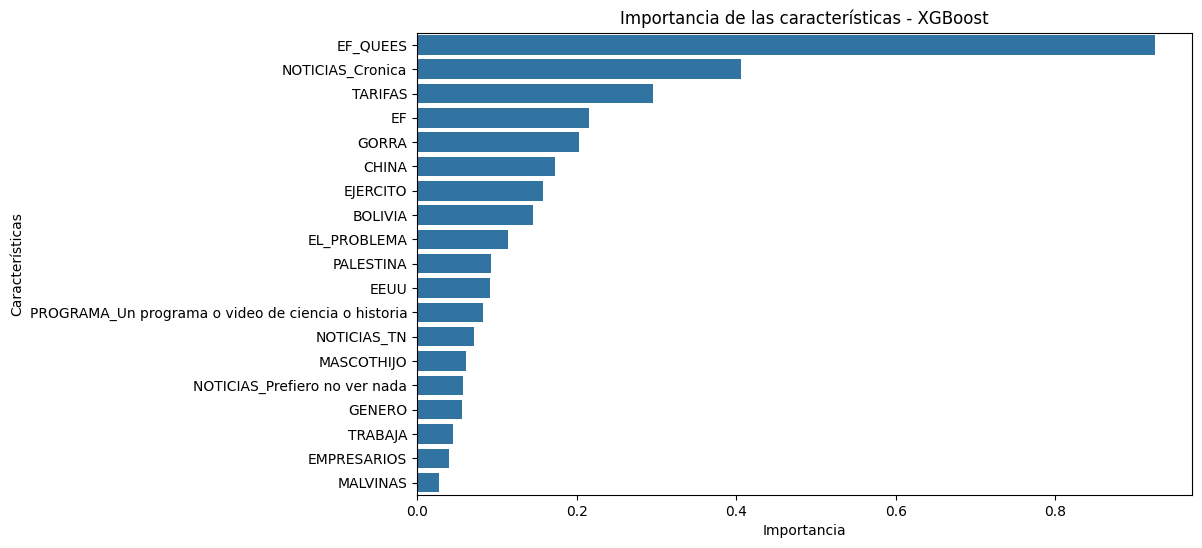

In [116]:

# Separar la variable objetivo ('ETIQUETAS')
y = SET_MODELO['ETIQUETA'].astype('category').cat.codes


##########################################################################################################################################
# Dividir en conjuntos de entrenamiento y prueba (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)
##########################################################################################################################################
# Convertir los datos a DMatrix y usar los nombres originales de las características
dtrain = xgb.DMatrix(X_train, label=y_train, feature_names=X.columns.tolist())
dtest = xgb.DMatrix(X_test, label=y_test, feature_names=X.columns.tolist())

##########################################################################################################################################
# Configurar los parámetros de XGBoost
params = {
    'objective': 'multi:softmax',  # Clasificación multiclase, se puede usar 'multi:softprob' para obtener probabilidades de pertenencia
    'num_class': 7,  # Número de clases
    'eval_metric': 'mlogloss',  # Función de pérdida
    'seed': 15
}
##########################################################################################################################################
# Entrenar el modelo con 100 rondas de boosting
modelo_xgboost = xgb.train(params, dtrain, num_boost_round=500)

# Realizar predicciones en el conjunto de prueba
predicciones_xgboost = modelo_xgboost.predict(dtest)
##########################################################################################################################################
# Calcular la precisión del modelo
accuracy = accuracy_score(y_test, predicciones_xgboost)
print(f'Precisión del modelo: {accuracy * 100:.2f}%')
##########################################################################################################################################
# Reporte de clasificación
print("Reporte de clasificación:\n", classification_report(y_test, predicciones_xgboost))

##########################################################################################################################################
# Crear la matriz de confusión
cm = confusion_matrix(y_test, predicciones_xgboost)
sns.heatmap(cm, annot=True, fmt='d', cmap='Reds')
plt.title('Matriz de Confusión')
plt.xlabel('Predicción')
plt.ylabel('Real')
plt.show()

##########################################################################################################################################
# Obtener la importancia de las características
importancia = modelo_xgboost.get_score(importance_type="weight")

# Convertir la importancia de características en un DataFrame para visualizar
importancia_df = pd.DataFrame({
    'Características': list(importancia.keys()),
    'Importancia': list(importancia.values())
})

# Ordenar por importancia descendente
importancia_df = importancia_df.sort_values(by="Importancia", ascending=False)
print(importancia_df)

# Graficar la importancia de las características con los nombres originales
plt.figure(figsize=(10, 6))
sns.barplot(x="Importancia", y="Características", data=importancia_df)
plt.title("Importancia de las características - XGBoost")
plt.show()

##########################################################################################################################################

# Obtener la importancia de las características
importancia = modelo_xgboost.get_score(importance_type="gain")

# Convertir la importancia de características en un DataFrame para visualizar
importancia_df = pd.DataFrame({
    'Características': list(importancia.keys()),
    'Importancia': list(importancia.values())
})

# Ordenar por importancia descendente
importancia_df = importancia_df.sort_values(by="Importancia", ascending=False)
print(importancia_df)

# Graficar la importancia de las características con los nombres originales
plt.figure(figsize=(10, 6))
sns.barplot(x="Importancia", y="Características", data=importancia_df)
plt.title("Importancia de las características - XGBoost")
plt.show()

> #### Se intentó nivelar la desigualdad de casos usando SMOTE sin conseguir mejoras

In [81]:
from imblearn.over_sampling import SMOTE
from collections import Counter

Distribución original: Counter({5: 41, 2: 13, 4: 12, 0: 8, 3: 7, 6: 5, 1: 5})
Distribución después de SMOTE: Counter({5: 41, 4: 41, 2: 41, 3: 41, 6: 41, 0: 41, 1: 41})
Precisión del modelo: 40.00%
Reporte de clasificación:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         3
           1       0.25      0.50      0.33         2
           2       0.00      0.00      0.00         6
           3       1.00      0.33      0.50         3
           4       0.50      0.17      0.25         6
           5       0.57      0.67      0.62        18
           6       0.50      0.50      0.50         2

    accuracy                           0.40        40
   macro avg       0.40      0.31      0.31        40
weighted avg       0.44      0.40      0.39        40



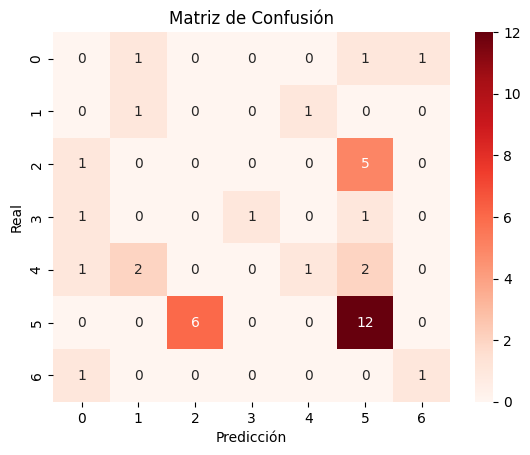

                                      Características  Importancia
16                                               EEUU       3677.0
7                                              GENERO        708.0
6   PROGRAMA_Un programa o video de ciencia o hist...        508.0
14                                           MALVINAS        398.0
9                                           PALESTINA        395.0
2                                          MASCOTHIJO        390.0
12                      NOTICIAS_Prefiero no ver nada        378.0
3                                               CHINA        333.0
0                                             TARIFAS        294.0
13                                            TRABAJA        254.0
10                                        EL_PROBLEMA        242.0
11                                            BOLIVIA        232.0
17                                        NOTICIAS_TN        201.0
4                                            EJERCITO        1

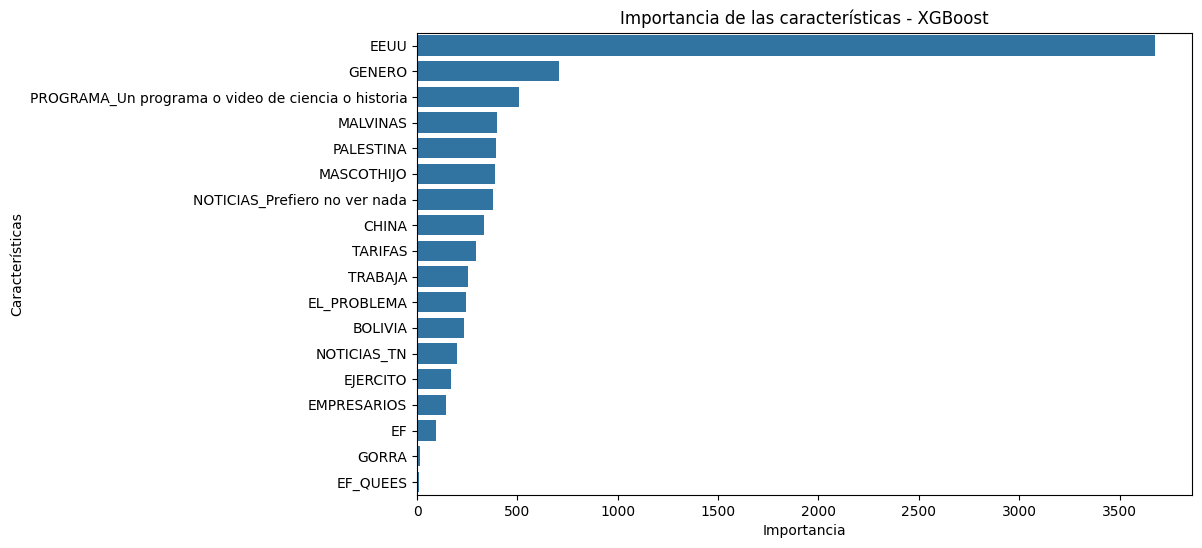

                                      Características  Importancia
11                                            BOLIVIA     0.904003
15                                                 EF     0.864801
8                                            EF_QUEES     0.670539
10                                        EL_PROBLEMA     0.498187
17                                        NOTICIAS_TN     0.469469
6   PROGRAMA_Un programa o video de ciencia o hist...     0.403252
3                                               CHINA     0.360090
0                                             TARIFAS     0.309825
2                                          MASCOTHIJO     0.290563
4                                            EJERCITO     0.286642
9                                           PALESTINA     0.272468
7                                              GENERO     0.256053
5                                         EMPRESARIOS     0.224155
12                      NOTICIAS_Prefiero no ver nada     0.21

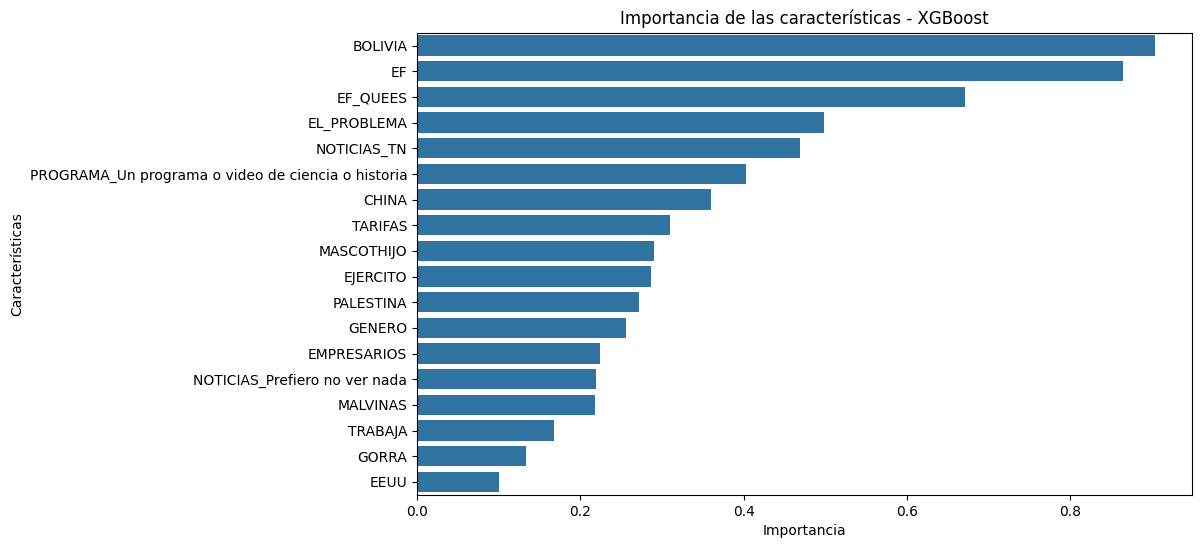

In [117]:


# Separar la variable objetivo ('ETIQUETAS')
y = SET_MODELO['ETIQUETA'].astype('category').cat.codes

##########################################################################################################################################
# Dividir en conjuntos de entrenamiento y prueba (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)

##########################################################################################################################################
# Aplicar SMOTE para balancear las clases en el conjunto de entrenamiento
print("Distribución original:", Counter(y_train))
smote = SMOTE(sampling_strategy="not majority", random_state=42, k_neighbors=2)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

print("Distribución después de SMOTE:", Counter(y_train_resampled))

##########################################################################################################################################
# Convertir los datos a DMatrix y usar los nombres originales de las características
dtrain = xgb.DMatrix(X_train_resampled, label=y_train_resampled, feature_names=X.columns.tolist())
dtest = xgb.DMatrix(X_test, label=y_test, feature_names=X.columns.tolist())

##########################################################################################################################################
# Configurar los parámetros de XGBoost
params = {
    'objective': 'multi:softmax',  # Clasificación multiclase, se puede usar 'multi:softprob' para obtener probabilidades de pertenencia
    'num_class': 7,  # Número de clases
    'eval_metric': 'mlogloss',  # Función de pérdida
    'seed': 15
}

##########################################################################################################################################
# Entrenar el modelo con 100 rondas de boosting
modelo_xgboost = xgb.train(params, dtrain, num_boost_round=500)

# Realizar predicciones en el conjunto de prueba
predicciones_xgboost = modelo_xgboost.predict(dtest)

##########################################################################################################################################
# Calcular la precisión del modelo
accuracy = accuracy_score(y_test, predicciones_xgboost)
print(f'Precisión del modelo: {accuracy * 100:.2f}%')

##########################################################################################################################################
# Reporte de clasificación
print("Reporte de clasificación:\n", classification_report(y_test, predicciones_xgboost))

##########################################################################################################################################
# Crear la matriz de confusión
cm = confusion_matrix(y_test, predicciones_xgboost)
sns.heatmap(cm, annot=True, fmt='d', cmap='Reds')
plt.title('Matriz de Confusión')
plt.xlabel('Predicción')
plt.ylabel('Real')
plt.show()

##########################################################################################################################################
# Obtener la importancia de las características
importancia = modelo_xgboost.get_score(importance_type="weight")

# Convertir la importancia de características en un DataFrame para visualizar
importancia_df = pd.DataFrame({
    'Características': list(importancia.keys()),
    'Importancia': list(importancia.values())
})

# Ordenar por importancia descendente
importancia_df = importancia_df.sort_values(by="Importancia", ascending=False)
print(importancia_df)

# Graficar la importancia de las características con los nombres originales
plt.figure(figsize=(10, 6))
sns.barplot(x="Importancia", y="Características", data=importancia_df)
plt.title("Importancia de las características - XGBoost")
plt.show()

##########################################################################################################################################
# Obtener la importancia de las características por ganancia
importancia = modelo_xgboost.get_score(importance_type="gain")

# Convertir la importancia de características en un DataFrame para visualizar
importancia_df = pd.DataFrame({
    'Características': list(importancia.keys()),
    'Importancia': list(importancia.values())
})

# Ordenar por importancia descendente
importancia_df = importancia_df.sort_values(by="Importancia", ascending=False)
print(importancia_df)

# Graficar la importancia de las características con los nombres originales
plt.figure(figsize=(10, 6))
sns.barplot(x="Importancia", y="Características", data=importancia_df)
plt.title("Importancia de las características - XGBoost")
plt.show()


### Conclusión sobre XGBoost




El uso de **XGBoost** permitió analizar diversas variables en términos de **peso e impacto en la reducción del error**, identificando aquellas más relevantes para la clasificación política. Sin embargo, los resultados mostraron que las **mismas variables clave utilizadas en la regresión logística** fueron las más efectivas, sin que XGBoost aportara mejoras significativas en precisión (Alcanzado un 42.5% de precisión como maximo). Dado esto, **resulta más conveniente y eficiente proceder con la regresión logística** en este contexto.

Además, se decidió excluir la variable **MILEI**, ya que, si bien demostró ser un fuerte predictor (Aumento la precisión maxima hasta 45%), su naturaleza **autoexplicativa** dentro del contexto político la hacía menos útil para un análisis más profundo. Finalmente, las **coincidencias observadas entre la izquierda y el peronismo en el análisis descriptivo** fueron corroboradas por XGBoost, dado que los **mayores desafíos de clasificación** se concentraron en la diferenciación entre estos dos grupos, confirmando la similitud en sus patrones de respuesta.

### XGB5 con agrupamiento de izq + Peronista

In [118]:
SET_MODELO['ETIQUETA2'] = SET_MODELO['ETIQUETA'].replace({
    'Peronista': 'Peronista/Izquierda',
    'De izquierda': 'Peronista/Izquierda'
})

# Opcional: Convertir ETIQUETA2 a categoría
SET_MODELO['ETIQUETA2'] = SET_MODELO['ETIQUETA2'].astype('category')

# Verificar los nuevos valores en ETIQUETA2
print(dict(enumerate(SET_MODELO['ETIQUETA2'].cat.categories)))

{0: 'Apolitico', 1: 'De derecha', 2: 'Liberal', 3: 'No sabe/ No contesta', 4: 'Peronista/Izquierda', 5: 'Radical'}


Precisión del modelo: 52.50%
Reporte de clasificación:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         3
           1       0.33      0.50      0.40         2
           2       0.00      0.00      0.00         3
           3       0.11      0.17      0.13         6
           4       0.82      0.75      0.78        24
           5       0.50      0.50      0.50         2

    accuracy                           0.53        40
   macro avg       0.29      0.32      0.30        40
weighted avg       0.55      0.53      0.53        40



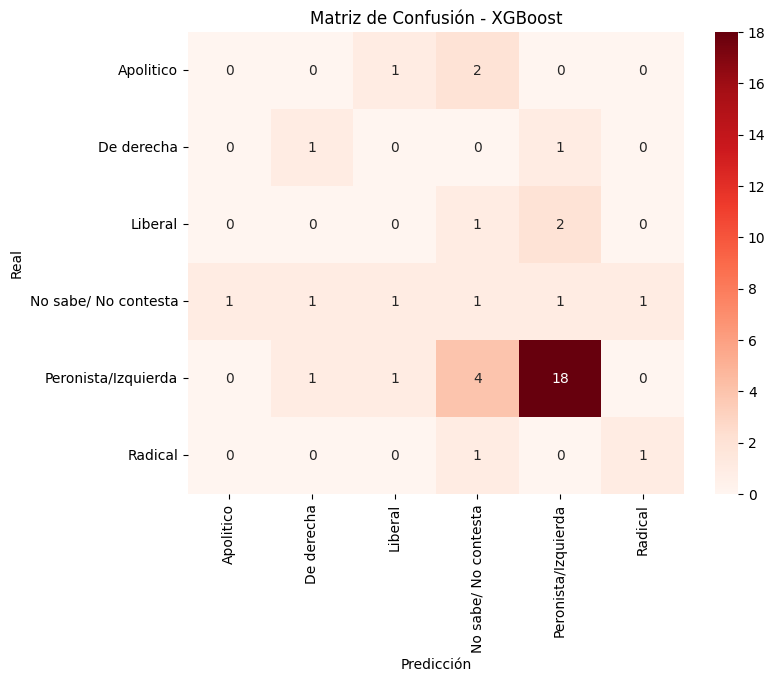

                                      Características  Importancia
17                                               EEUU       1307.0
7                                              GENERO        857.0
12                      NOTICIAS_Prefiero no ver nada        663.0
9                                           PALESTINA        516.0
2                                          MASCOTHIJO        507.0
18                                        NOTICIAS_TN        445.0
14                                           MALVINAS        416.0
11                                            BOLIVIA        406.0
3                                               CHINA        384.0
6   PROGRAMA_Un programa o video de ciencia o hist...        328.0
0                                             TARIFAS        328.0
10                                        EL_PROBLEMA        152.0
13                                            TRABAJA         76.0
5                                         EMPRESARIOS         

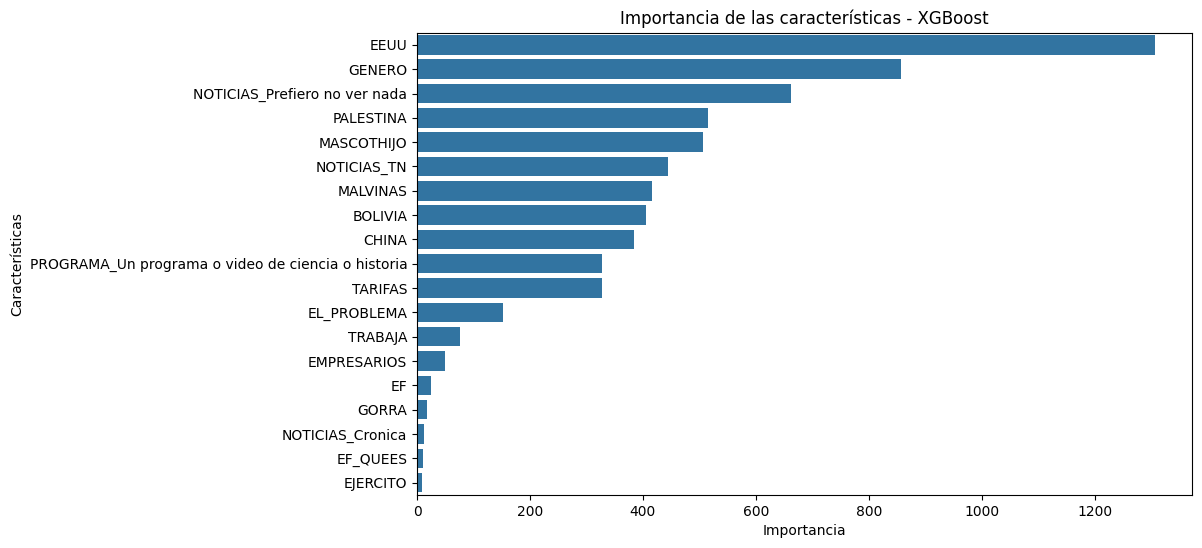

                                      Características  Importancia
1                                               GORRA     0.316502
16                                                 EF     0.294648
4                                            EJERCITO     0.264054
15                                   NOTICIAS_Cronica     0.190989
9                                           PALESTINA     0.182144
0                                             TARIFAS     0.134400
13                                            TRABAJA     0.109787
10                                        EL_PROBLEMA     0.102073
3                                               CHINA     0.101357
5                                         EMPRESARIOS     0.089468
6   PROGRAMA_Un programa o video de ciencia o hist...     0.070076
8                                            EF_QUEES     0.066183
11                                            BOLIVIA     0.064179
2                                          MASCOTHIJO     0.04

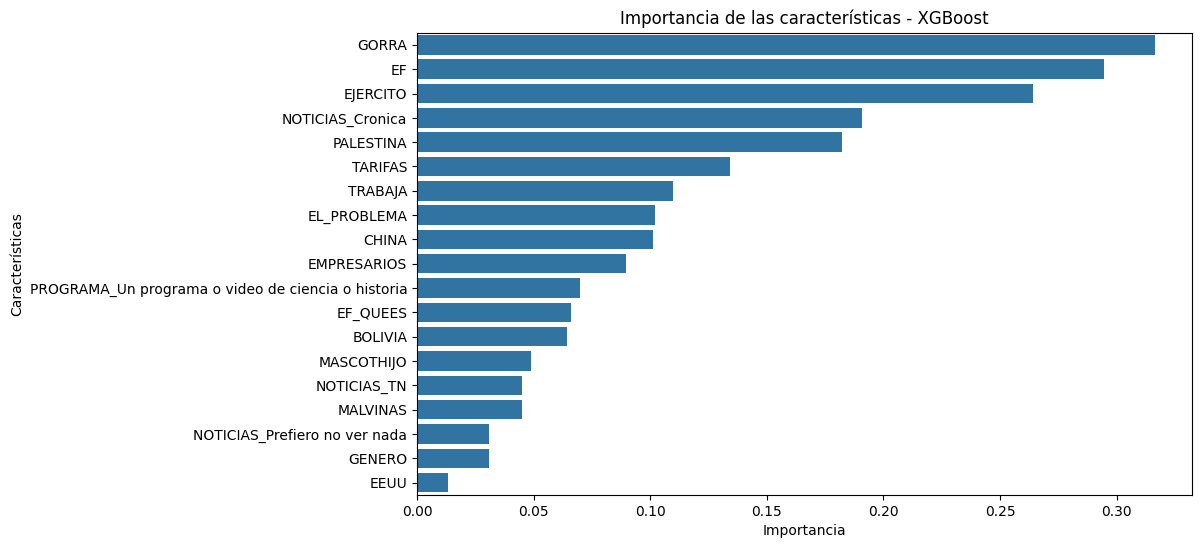

In [119]:

# Separar la variable objetivo ('ETIQUETAS')
y = SET_MODELO['ETIQUETA2'].cat.codes



##########################################################################################################################################
# Dividir en conjuntos de entrenamiento y prueba (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)
##########################################################################################################################################
# Convertir los datos a DMatrix y usar los nombres originales de las características
dtrain = xgb.DMatrix(X_train, label=y_train, feature_names=X.columns.tolist())
dtest = xgb.DMatrix(X_test, label=y_test, feature_names=X.columns.tolist())

##########################################################################################################################################
# Configurar los parámetros de XGBoost
params = {
    'objective': 'multi:softmax',  # Clasificación multiclase, se puede usar 'multi:softprob' para obtener probabilidades de pertenencia
    'num_class': 7,  # Número de clases
    'eval_metric': 'mlogloss',  # Función de pérdida
    'seed': 15
}
##########################################################################################################################################
# Entrenar el modelo con 100 rondas de boosting
modelo_xgboost = xgb.train(params, dtrain, num_boost_round=1000)

# Realizar predicciones en el conjunto de prueba
predicciones_xgboost = modelo_xgboost.predict(dtest)
##########################################################################################################################################
# Calcular la precisión del modelo
accuracy = accuracy_score(y_test, predicciones_xgboost)
print(f'Precisión del modelo: {accuracy * 100:.2f}%')
##########################################################################################################################################
# Reporte de clasificación
print("Reporte de clasificación:\n", classification_report(y_test, predicciones_xgboost))

##########################################################################################################################################
# Crear la matriz de confusión
cm = confusion_matrix(y_test, predicciones_xgboost)
# Definir el mapeo de etiquetas
etiquetas_nombres = ['Apolitico', 'De derecha', 'Liberal', 'No sabe/ No contesta', 'Peronista/Izquierda', 'Radical']

# Graficar la matriz de confusión con nombres de etiquetas
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Reds',
            xticklabels=etiquetas_nombres,
            yticklabels=etiquetas_nombres)

# Ajustar etiquetas
plt.title('Matriz de Confusión - XGBoost')
plt.xlabel('Predicción')
plt.ylabel('Real')

# Mostrar el gráfico
plt.show()


##########################################################################################################################################
# Obtener la importancia de las características
importancia = modelo_xgboost.get_score(importance_type="weight")

# Convertir la importancia de características en un DataFrame para visualizar
importancia_df = pd.DataFrame({
    'Características': list(importancia.keys()),
    'Importancia': list(importancia.values())
})

# Ordenar por importancia descendente
importancia_df = importancia_df.sort_values(by="Importancia", ascending=False)
print(importancia_df)

# Graficar la importancia de las características con los nombres originales
plt.figure(figsize=(10, 6))
sns.barplot(x="Importancia", y="Características", data=importancia_df)
plt.title("Importancia de las características - XGBoost")
plt.show()

##########################################################################################################################################
# Obtener la importancia de las características
importancia = modelo_xgboost.get_score(importance_type="gain")

# Convertir la importancia de características en un DataFrame para visualizar
importancia_df = pd.DataFrame({
    'Características': list(importancia.keys()),
    'Importancia': list(importancia.values())
})

# Ordenar por importancia descendente
importancia_df = importancia_df.sort_values(by="Importancia", ascending=False)
print(importancia_df)

# Graficar la importancia de las características con los nombres originales
plt.figure(figsize=(10, 6))
sns.barplot(x="Importancia", y="Características", data=importancia_df)
plt.title("Importancia de las características - XGBoost")
plt.show()

*Aspectos interesantes de este modelo*

-Al juntar Peronistas con Izquierda el modelo mejoró significativamente:
precisiones
30/70: 52.5
40/70: 55% con 500 rondas

-Pero esto puede estar altmaente relacionado con que ahora Peronistas e Izquierda son una misma clase que aglutinan al 40% de los encuestados.

## K-Means

In [85]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler

In [86]:
DATOS_KMEAN = SET_KMEANS.drop(columns='ETIQUETA')

In [87]:
'''
DATOS_KMEAN = SET_MODELO.drop(columns=['ETIQUETA','ETIQUETA2','ETIQUETA3'])
'''

"\nDATOS_KMEAN = SET_MODELO.drop(columns=['ETIQUETA','ETIQUETA2','ETIQUETA3'])\n"

In [88]:
DATOS_KMEAN = SET_KMEANS[[
    "TARIFAS",
    'ISRAEL',
    "GORRA",
    'RUSIA',
    'UCRANIA',
    "MASCOTHIJO",
    "CHINA",
    "EJERCITO",
    "EMPRESARIOS",
    "PROGRAMA_Un programa o video de ciencia o historia",
    #"GENERO",
    "EF_QUEES",
    "PALESTINA",
    "EL_PROBLEMA",
    "BOLIVIA",
    "NOTICIAS_Prefiero no ver nada",
    "TRABAJA",
    "MALVINAS",
    "NOTICIAS_Cronica",
    "EF",
    "EEUU",
    "NOTICIAS_TN" # Manteniendo la variable objetivo
]]


In [89]:
print(DATOS_KMEAN.isna().sum())

TARIFAS                                               0
ISRAEL                                                0
GORRA                                                 0
RUSIA                                                 0
UCRANIA                                               0
MASCOTHIJO                                            0
CHINA                                                 0
EJERCITO                                              0
EMPRESARIOS                                           0
PROGRAMA_Un programa o video de ciencia o historia    0
EF_QUEES                                              0
PALESTINA                                             0
EL_PROBLEMA                                           0
BOLIVIA                                               0
NOTICIAS_Prefiero no ver nada                         0
TRABAJA                                               0
MALVINAS                                              0
NOTICIAS_Cronica                                

In [90]:
# Crear una copia del DataFrame original para trabajar con seguridad
df_clean = DATOS_KMEAN.copy()

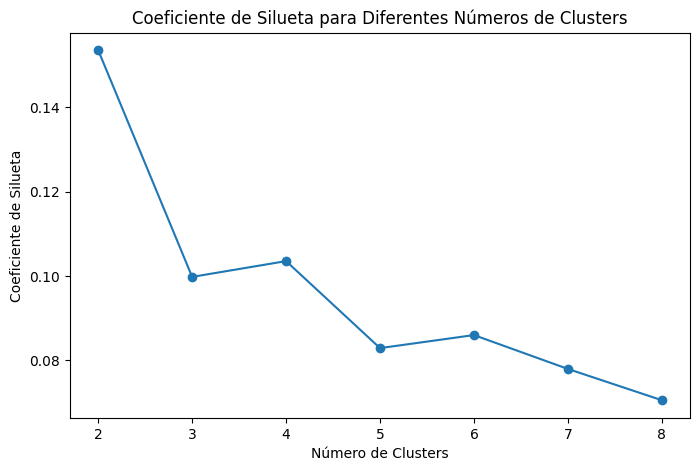

In [91]:
# Calcular el coeficiente de silueta para varios números de clusters
rango_clusters = range(2, 9)
coeficientes_silueta = []

for k in rango_clusters:
    kmeans = KMeans(n_clusters=k, random_state=0, n_init='auto')
    labels = kmeans.fit_predict(df_clean.iloc[:, :-1])
    silhouette_avg = silhouette_score(df_clean.iloc[:, :-1], labels)
    coeficientes_silueta.append(silhouette_avg)

# Crear un gráfico del coeficiente de silueta
plt.figure(figsize=(8, 5))
plt.plot(rango_clusters, coeficientes_silueta, marker='o')
plt.title("Coeficiente de Silueta para Diferentes Números de Clusters")
plt.xlabel("Número de Clusters")
plt.ylabel("Coeficiente de Silueta")
plt.show()

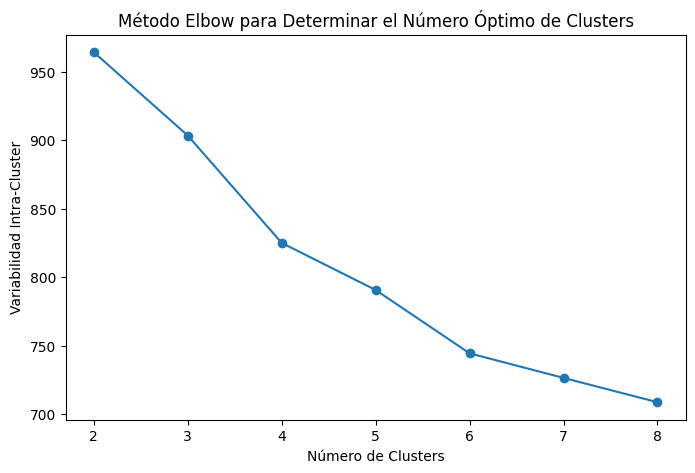

In [92]:
# Cálculo del método Elbow para la variabilidad intra-cluster
variabilidad_intra_cluster = []

for k in rango_clusters:
    kmeans = KMeans(n_clusters=k, random_state=0, n_init='auto')
    kmeans.fit(df_clean.iloc[:, :-1])
    variabilidad_intra_cluster.append(kmeans.inertia_)

# Crear un gráfico del método Elbow
plt.figure(figsize=(8, 5))
plt.plot(rango_clusters, variabilidad_intra_cluster, marker='o')
plt.title("Método Elbow para Determinar el Número Óptimo de Clusters")
plt.xlabel("Número de Clusters")
plt.ylabel("Variabilidad Intra-Cluster")
plt.show()

In [93]:
# Definir el número de clusters y la semilla para reproducibilidad
numero_clusters = 2
random_state = 15  # Puedes elegir cualquier número como semilla

# Realizar el clustering K-Means con configuración reproducible
kmeans = KMeans(n_clusters=numero_clusters, random_state=random_state, n_init='auto')
df_clean['cluster'] = kmeans.fit_predict(df_clean)

In [94]:
# Ver los resultados del clustering
print(kmeans.cluster_centers_)

[[ 1.29629630e-01 -1.07407407e+00  3.51851852e-01  2.40740741e-01
  -1.48148148e-01  2.96296296e-01  4.81481481e-01  8.33333333e-01
   4.81481481e-01  4.44444444e-01  1.85185185e-01  8.51851852e-01
   6.11111111e-01  1.40740741e+00  2.77777778e-01  7.96296296e-01
   4.44444444e-01  5.55555556e-02  8.88888889e-01 -1.40740741e+00
   5.55555556e-02]
 [ 5.06493506e-01 -2.72727273e-01  1.29870130e-01 -1.16883117e-01
   1.68831169e-01  3.50649351e-01 -1.11022302e-16  8.57142857e-01
   2.59740260e-01  4.15584416e-01  1.68831169e-01 -3.11688312e-01
   3.63636364e-01  1.03896104e-01  3.89610390e-01  7.27272727e-01
   5.71428571e-01  6.49350649e-02  8.83116883e-01  2.59740260e-02
   3.37662338e-01]]


In [95]:
# Añadir las etiquetas de cluster al conjunto de datos original
df_clean['cluster'] = kmeans.labels_


In [96]:
df_clean['cluster'].value_counts()

,count
cluster,
1,77
0,54


In [97]:
df_clean = df_clean.reset_index(drop=True)
SET_KMEANS = SET_KMEANS.reset_index(drop=True)

df_clean['ETIQUETA'] = SET_KMEANS['ETIQUETA']
df_clean['GENERO'] = SET_KMEANS['GENERO']

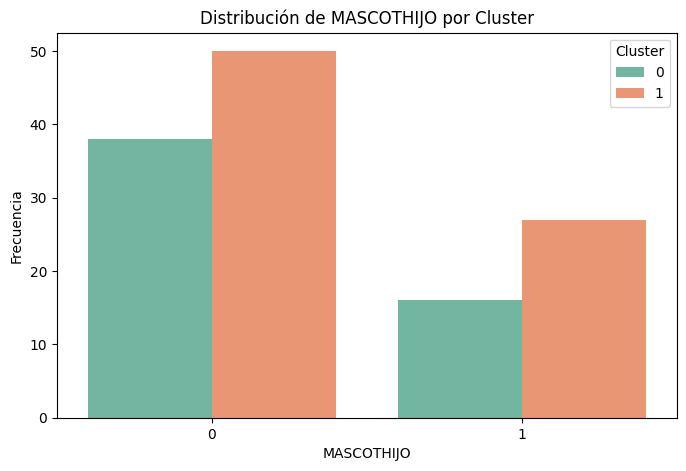

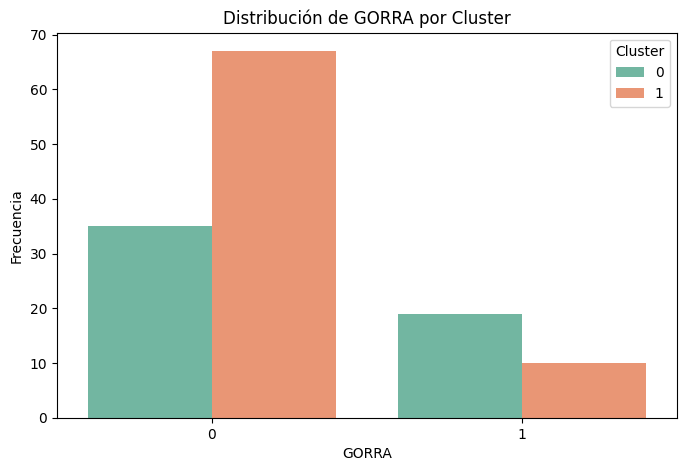

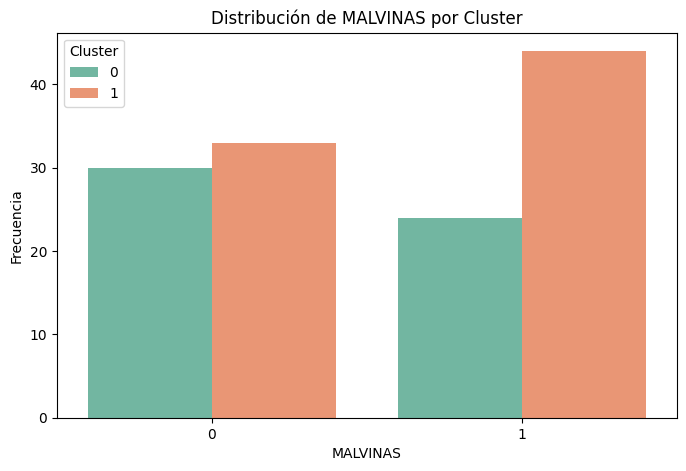

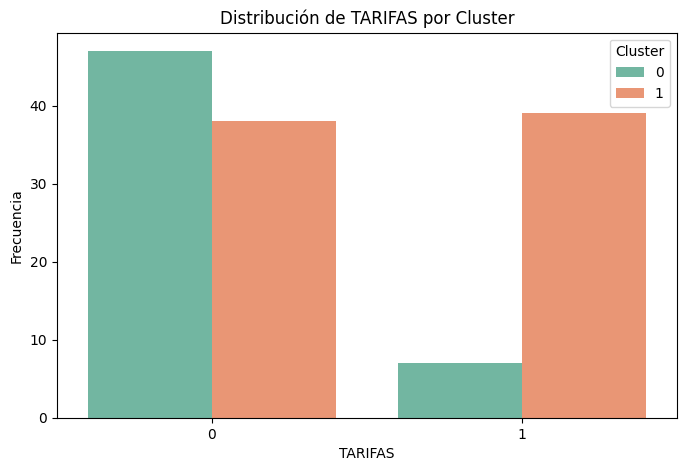

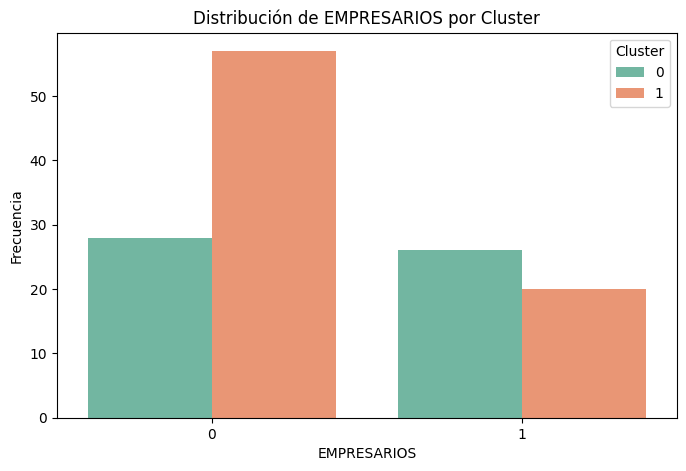

In [98]:
variables_interes = ['MASCOTHIJO', 'GORRA', 'MALVINAS', 'TARIFAS','EMPRESARIOS']  # Modifica según tus variables

# Crear gráficos de barras apiladas para cada variable
for variable in variables_interes:
    plt.figure(figsize=(8, 5))
    sns.countplot(data=df_clean, x=variable, hue='cluster', palette='Set2')
    plt.title(f'Distribución de {variable} por Cluster')
    plt.xlabel(variable)
    plt.ylabel('Frecuencia')
    plt.legend(title='Cluster')
    plt.show()

In [99]:
variables_ordinales = ['CHINA','EEUU','PALESTINA','BOLIVIA','ISRAEL','RUSIA','UCRANIA']

# Resumen de variables ordinales (promedios por cluster)
resumen_ordinales = df_clean.groupby('cluster')[variables_ordinales].mean()
print("Promedios de variables ordinales por cluster:")
print(resumen_ordinales)

# Resumen de variables dicotómicas (proporciones por cluster)
variables_dicotomicas = ['GENERO','MASCOTHIJO', 'GORRA', 'EF','EF_QUEES', 'TARIFAS','MALVINAS','EJERCITO','EMPRESARIOS','EL_PROBLEMA','NOTICIAS_Prefiero no ver nada']  # Modifica según tus variables
resumen_dicotomicas = df_clean.groupby('cluster')[variables_dicotomicas].mean()
print("\nProporciones de variables dicotómicas por cluster:")
print(resumen_dicotomicas)

Promedios de variables ordinales por cluster:
            CHINA      EEUU  PALESTINA   BOLIVIA    ISRAEL     RUSIA   UCRANIA
cluster                                                                       
0        0.481481 -1.407407   0.851852  1.407407 -1.074074  0.240741 -0.148148
1        0.000000  0.025974  -0.311688  0.103896 -0.272727 -0.116883  0.168831

Proporciones de variables dicotómicas por cluster:
           GENERO  MASCOTHIJO     GORRA        EF  EF_QUEES   TARIFAS  MALVINAS  EJERCITO  EMPRESARIOS  EL_PROBLEMA  NOTICIAS_Prefiero no ver nada
cluster                                                                                                                                           
0        0.370370    0.296296  0.351852  0.888889  0.185185  0.129630  0.444444  0.833333     0.481481     0.611111                       0.277778
1        0.519481    0.350649  0.129870  0.883117  0.168831  0.506494  0.571429  0.857143     0.259740     0.363636                       0.38961

>A través de la aplicación de **K-Means**, se identificaron **dos clusters naturales** dentro de los datos, revelando una estructura interesante en la segmentación política de los encuestados.

**Diferencias entre los Clusters Generales**

A partir de los **promedios de variables ordinales** y las **proporciones de variables dicotómicas** observadas en cada cluster, podemos identificar algunas diferencias clave en las características de ambos grupos.

---

**Posicionamiento Internacional**
- **Cluster 0** muestra un mayor apoyo o valoración positiva hacia **China, Palestina y Bolivia**, al mismo tiempo que manifiesta una **opinión muy negativa sobre EE.UU. e Israel**.
- **Cluster 1**, en cambio, **presenta un posicionamiento más neutro o moderado** en relación con estos países. No tiene una opinión tan negativa sobre EE.UU. e Israel como el Cluster 0, pero tampoco muestra el mismo nivel de apoyo hacia China, Palestina y Bolivia.

Esto sugiere que el **Cluster 0** tiene una **visión más alineada con posturas geopolíticas antioccidentales o de izquierda** en términos de política internacional, mientras que el **Cluster 1** es más variado y menos extremado en sus posiciones.

---

**Variables Ideológicas y Económicas**
- **Gorra**: La proporción de personas que están de acuerdo con la consigna *"Muerte a la gorra"* es **casi tres veces mayor en el Cluster 0** (35.2%) que en el Cluster 1 (12.9%). Esto refuerza la idea de que el Cluster 0 tiene una identidad más fuertemente **opuesta a las fuerzas de seguridad y más cercana a sectores de izquierda radical**.
- **Tarifas**: En el Cluster 1, **el 50.6% está a favor de aumentos de tarifas**, mientras que en el Cluster 0 solo el **12.9%** lo apoya. Esto puede indicar una diferencia de enfoque respecto a la intervención del Estado en la economía: **el Cluster 0 parece ser más estatista o proteccionista**, mientras que el Cluster 1 tiene más aceptación de medidas de ajuste económico.
- **El Problema**: Mientras que en el Cluster 0 **el 61.1% cree que el principal problema del país es la concentración de riqueza**, en el Cluster 1 este porcentaje cae al **36.3%**, lo que refuerza la idea de que **el Cluster 0 tiene una mayor inclinación hacia discursos anticapitalistas o de redistribución de la riqueza**.

---

**Seguridad, Fuerzas Armadas y Nacionalismo**
- **Malvinas**: Un mayor porcentaje en el **Cluster 1 (57.1%)** considera a los excombatientes de Malvinas como **héroes**, mientras que en el **Cluster 0 (44.4%)** esta proporción es menor. Esto indica que el **Cluster 1 tiene una visión más nacionalista y reivindicativa del conflicto**, mientras que el **Cluster 0 puede tender a una visión más crítica o victimista sobre los excombatientes**.
- **Ejército**: Ambos grupos tienen una **alta comprensión de la necesariedad del Ejército** (más del 80%) aunque la leve diferencia acompaña el analisís.
- **Empresarios**: El **Cluster 0 tiene un porcentaje mayor (48.1%)** de personas que ven a los empresarios como parte del problema del país, mientras que en el Cluster 1 esta cifra se reduce al **25.9%**. Esto refuerza la idea de que el **Cluster 0 es más crítico con el sector empresarial y la lógica de mercado**, mientras que el Cluster 1 tiene una visión más mixta o favorable.

---

**Género y Consumo de Noticias**
- **Género**: Hay una mayor proporción de **hombres en el Cluster 1 (51.9%)**, mientras que en el Cluster 0 el porcentaje es menor (37.0%), aunque no es una diferencia drástica.
- **Consumo de noticias**: En el Cluster 0, **menos personas prefieren no ver noticias (27.7%)** en comparación con el **Cluster 1 (38.9%)**, lo que indica que en el Cluster 0 hay una mayor participación en el consumo de información política, mientras que en el Cluster 1 hay más tendencia al desinterés o desapego informativo.

---

**Conclusión General**
La segmentación en dos clusters confirma la existencia de **una división sociopolítica importante**, reflejando diferencias en ideología económica, geopolítica y visión sobre el rol del Estado.

1. **El Cluster 0** está **fuertemente ligado a posturas de izquierda o progresistas**, con un claro sesgo **anti-empresarial, anti-EE.UU., pro-redistribución de la riqueza y con un discurso más crítico hacia las fuerzas de seguridad**. Es un grupo que se alinea con **posturas más estatistas, anticapitalistas y antiimperialistas**.
2. **El Cluster 1**, en cambio, es **más heterogéneo y menos radicalizado**, mostrando **posiciones más moderadas respecto a la economía, la geopolítica y la seguridad**. A diferencia del Cluster 0, su opinión sobre EE.UU. es más neutra y no presenta una postura tan contundente contra el sector empresarial o las fuerzas de seguridad.


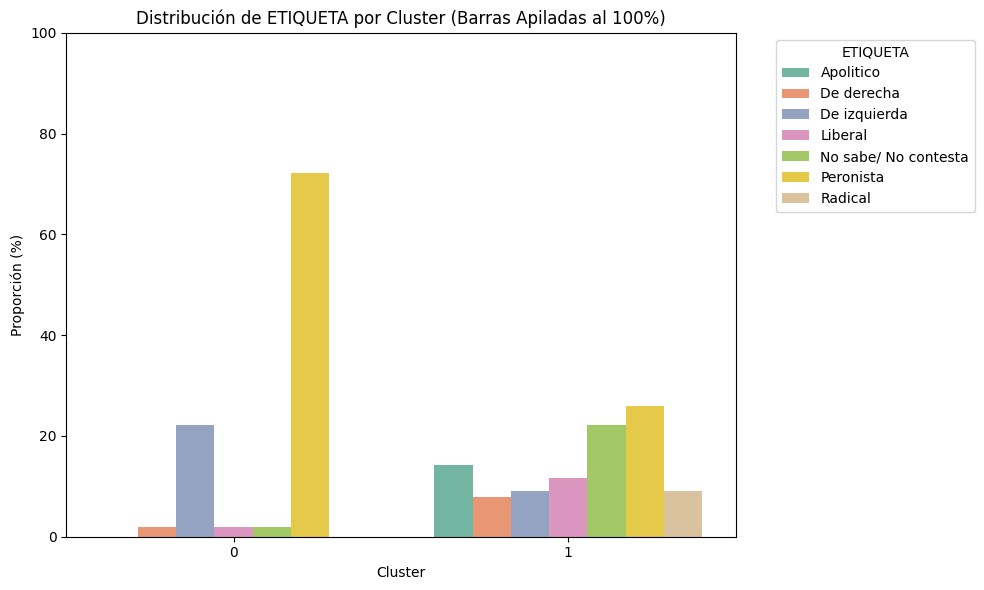

In [100]:
df_clean['ETIQUETA'] = SET_KMEANS['ETIQUETA']

# Calcular la proporción de cada ETIQUETA dentro de cada cluster
proporciones = (
    df_clean.groupby(['cluster', 'ETIQUETA'])
    .size()
    .unstack(fill_value=0)  # Convierte las categorías en columnas
    .apply(lambda x: 100 * x / x.sum(), axis=1)  # Calcula proporciones al 100% por cluster
)

# Volver a convertir las proporciones a un formato largo para graficar
proporciones_long = proporciones.reset_index().melt(
    id_vars='cluster', var_name='ETIQUETA', value_name='Proporción'
)

# Crear el gráfico de barras apiladas al 100%
plt.figure(figsize=(10, 6))
sns.barplot(
    data=proporciones_long,
    x='cluster',
    y='Proporción',
    hue='ETIQUETA',
    palette='Set2'
)
plt.title('Distribución de ETIQUETA por Cluster (Barras Apiladas al 100%)')
plt.xlabel('Cluster')
plt.ylabel('Proporción (%)')
plt.legend(title='ETIQUETA', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.ylim(0, 100)  # Escalar al 100%
plt.tight_layout()
plt.show()

El primer cluster agrupa de manera predominante a **peronistas y encuestados identificados con la izquierda**, formando un bloque relativamente homogéneo. En cambio, el segundo cluster presenta una mayor **heterogeneidad**, integrando al resto de las etiquetas políticas, incluyendo liberales, radicales, apolíticos y personas identificadas con la derecha.

Este resultado sugiere una posible **bifurcación en la percepción política dentro de la sociedad**, donde el **peronismo y la izquierda parecen compartir un espacio discursivo e ideológico diferenciado** del resto de los segmentos políticos. La marcada concentración de estos grupos dentro de un mismo cluster indica que podrían operar con **referencias simbólicas, percepciones culturales y consumos diferenciados** en relación con el resto de la sociedad.








AHORA TODO DE NUEVO PERO SOLO CLUSTERIZANDO PERONISTAS

In [101]:
df_clean = df_clean.reset_index(drop=True)  # Asegura que el índice es consecutivo
df_clean["ID"] = df_clean.index  # Agrega un identificador único basado en el índice

In [102]:
PERONISTAS = df_clean[df_clean['ETIQUETA'] == 'Peronista'].drop(columns=['cluster','ETIQUETA','GENERO'])

In [103]:
# Definir el número de clusters y la semilla para reproducibilidad
numero_clusters = 2
random_state = 15  # Puedes elegir cualquier número como semilla

# Realizar el clustering K-Means con configuración reproducible
# Aplicar clustering
kmeans = KMeans(n_clusters=numero_clusters, random_state=random_state, n_init='auto')
PERONISTAS["cluster_peron"] = kmeans.fit_predict(PERONISTAS.drop(columns=["ID"]))  # Excluir ID antes de entrenar

In [104]:
# Swappear los valores de 0 a 1 y de 1 a 0
PERONISTAS['cluster_peron'] = PERONISTAS['cluster_peron'].map({0: 1, 1: 0})

In [105]:
PERONISTAS['cluster_peron'].value_counts()

,count
cluster_peron,
0,32
1,27


In [106]:
# 1️⃣ Hacer el merge solo con la columna 'GENERO'
PERONISTAS = PERONISTAS.merge(df_clean[['ID', 'GENERO']], on='ID', how='left')

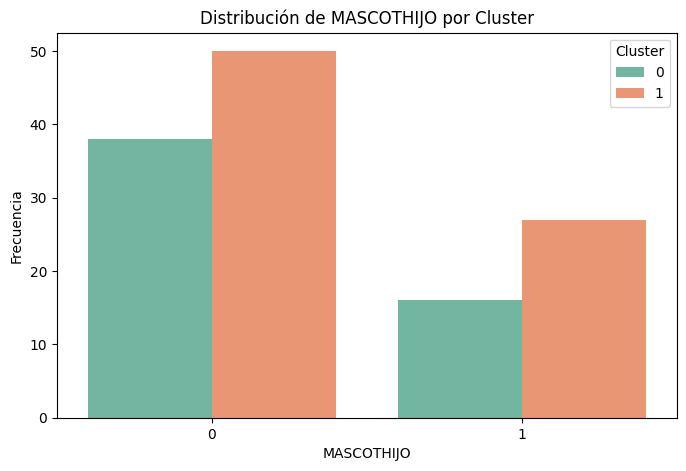

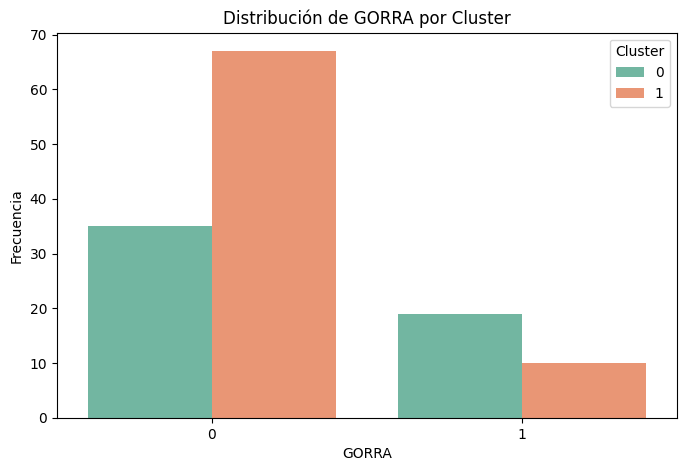

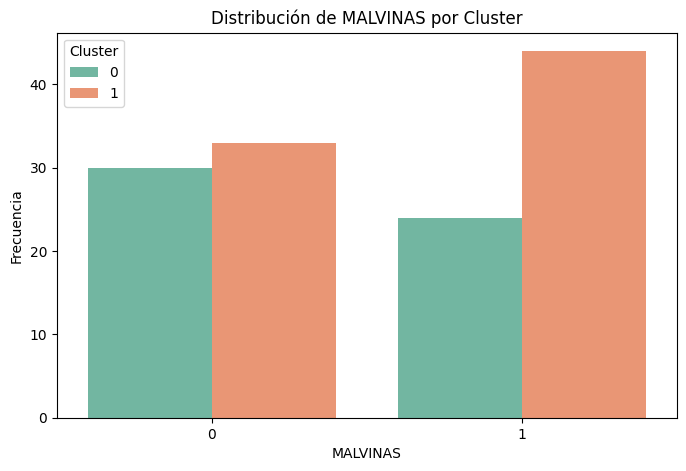

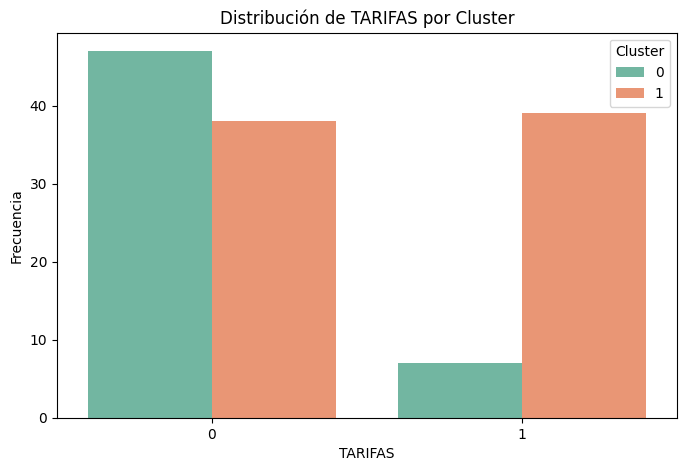

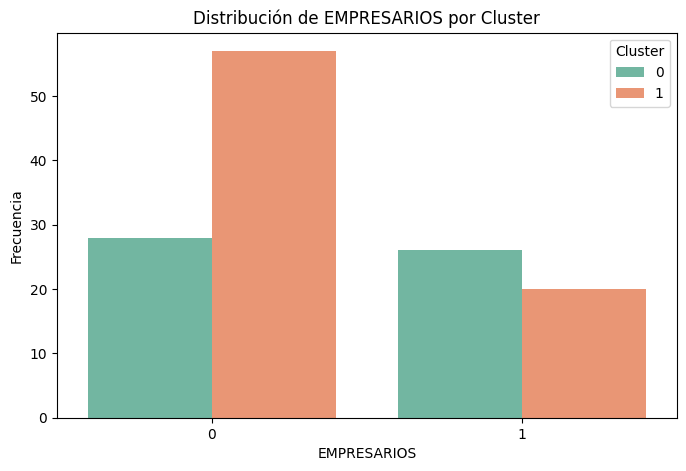

In [107]:
variables_interes = ['MASCOTHIJO', 'GORRA', 'MALVINAS', 'TARIFAS','EMPRESARIOS']  # Modifica según tus variables

# Crear gráficos de barras apiladas para cada variable
for variable in variables_interes:
    plt.figure(figsize=(8, 5))
    sns.countplot(data=df_clean, x=variable, hue='cluster', palette='Set2')
    plt.title(f'Distribución de {variable} por Cluster')
    plt.xlabel(variable)
    plt.ylabel('Frecuencia')
    plt.legend(title='Cluster')
    plt.show()

In [108]:
variables_ordinales = ['CHINA','EEUU','PALESTINA','BOLIVIA','ISRAEL','RUSIA','UCRANIA']

# Resumen de variables ordinales (promedios por cluster)
resumen_ordinales = PERONISTAS.groupby('cluster_peron')[variables_ordinales].mean()
print("Promedios de variables ordinales por cluster_peron:")
print(resumen_ordinales)

# Resumen de variables dicotómicas (proporciones por cluster)
variables_dicotomicas = ['GENERO','MASCOTHIJO', 'GORRA', 'EF','EF_QUEES', 'TARIFAS','MALVINAS','EJERCITO','EMPRESARIOS','EL_PROBLEMA','NOTICIAS_Prefiero no ver nada']  # Modifica según tus variables
resumen_dicotomicas = PERONISTAS.groupby('cluster_peron')[variables_dicotomicas].mean()
print("\nProporciones de variables dicotómicas por cluster_peron:")
print(resumen_dicotomicas)

Promedios de variables ordinales por cluster_peron:
                  CHINA      EEUU  PALESTINA   BOLIVIA   ISRAEL     RUSIA  UCRANIA
cluster_peron                                                                     
0              0.531250 -1.562500   0.937500  1.531250 -1.15625  0.468750 -0.15625
1              0.444444 -0.111111   0.074074  0.740741 -0.37037  0.259259  0.00000

Proporciones de variables dicotómicas por cluster_peron:
                 GENERO  MASCOTHIJO     GORRA        EF  EF_QUEES   TARIFAS  MALVINAS  EJERCITO  EMPRESARIOS  EL_PROBLEMA  NOTICIAS_Prefiero no ver nada
cluster_peron                                                                                                                                           
0              0.343750    0.343750  0.375000  0.906250  0.250000  0.093750   0.40625  0.843750     0.531250     0.625000                       0.218750
1              0.555556    0.259259  0.111111  0.925926  0.148148  0.148148   0.62963  0.851852    

### **Análisis de la Clusterización Interna de los Peronistas**

Al aplicar **una segmentación interna dentro del grupo de peronistas**, se identificaron **dos subclusters** con diferencias notables en sus posturas ideológicas y sociodemográficas. Si bien estos grupos no coinciden completamente con los clusters generales previamente analizados, sí muestran una tendencia clara en la que **uno de los subclusters se asemeja al Cluster 1 general (más heterogéneo y moderado) y el otro al Cluster 0 general (más progresista y alineado a la izquierda)**.

---

### **1️⃣ Posicionamiento Internacional**
- **Peronistas del Cluster 0** tienen una **opinión mucho más negativa sobre EE.UU. e Israel** y una **opinión marcadamente positiva sobre Bolivia, Palestina y China**. Estas preferencias coinciden con los **patrones observados en el Cluster 0 del análisis general**, sugiriendo que este grupo representa un peronismo **más alineado con la izquierda y el progresismo**.
- **Peronistas del Cluster 1** presentan **posturas más moderadas** en comparación con el otro grupo. Aunque siguen valorando positivamente a Bolivia y China, no muestran el mismo nivel de rechazo hacia EE.UU. e Israel. Su perfil es más **abierto a diferentes corrientes dentro del peronismo**.

---

### **2️⃣ Variables Ideológicas y Económicas**
- **Gorra**: La **aprobación de la consigna "Muerte a la gorra"** es mucho mayor en el **Cluster 0 (37.5%)** en comparación con el **Cluster 1 (11.1%)**, lo que refuerza la idea de que los peronistas en el Cluster 0 tienen una identidad **más cercana a sectores críticos con las fuerzas de seguridad**.
- **Empresarios**: Mientras que en el **Cluster 0 un 53.1% de los peronistas ve a los empresarios como parte del problema del país**, en el **Cluster 1 este porcentaje se reduce al 25.9%**, mostrando que en este último grupo hay una mayor aceptación del sector privado.
- **El Problema**: Un **62.5% de los peronistas del Cluster 0** considera que la **concentración de riqueza es el principal problema del país**, mientras que en el Cluster 1 este porcentaje es menor (**40.7%**). Esto sugiere que los peronistas del Cluster 0 tienen un enfoque más marcado hacia **posturas económicas más estatistas y anticapitalistas**.

---

### **3️⃣ Seguridad, Fuerzas Armadas y Nacionalismo**
- **Malvinas**: Los peronistas en el **Cluster 1 tienen una menor proporción (40.6%)** de personas que ven a los excombatientes de Malvinas como héroes, mientras que en el **Cluster 0 este porcentaje es mayor (62.9%)**. Esto indica que dentro del peronismo también existe una **división respecto a la narrativa nacionalista sobre Malvinas**, con el Cluster 1 teniendo una **visión menos reivindicativa** del conflicto.
- **Ejército**: Ambos grupos tienen una **alta aceptación del Ejército (más del 84%)**, lo que los muestra homogéneos en este punto.

---

### **4️⃣ Género y Consumo de Noticias**
- **Género**: En el Cluster 1 hay **más hombres (55.6%)**, mientras que en el Cluster 0 hay una mayor proporción de **mujeres, dado que la proporción de hombres es del 34.3%**. La relación entre género e ideología es un tema de discusión actual, y estos resultados parecen abonar a los conocimientos que se tienen de la temática.
- **Consumo de Noticias**: El porcentaje de peronistas que **prefieren no ver noticias es más alto en el Cluster 1 (21.8%)** que en el Cluster 0 (14.8%), aunque la diferencia no es tan significativa.

---




In [109]:
# Merge final de `cluster_peron` en `df_clean`
df_clean = df_clean.merge(PERONISTAS[['ID', 'cluster_peron']], on='ID', how='left')

# Rellenar con 99 a quienes no sean peronistas para diferenciarlos claramente
df_clean['cluster_peron'] = df_clean['cluster_peron'].fillna(99).astype(int)

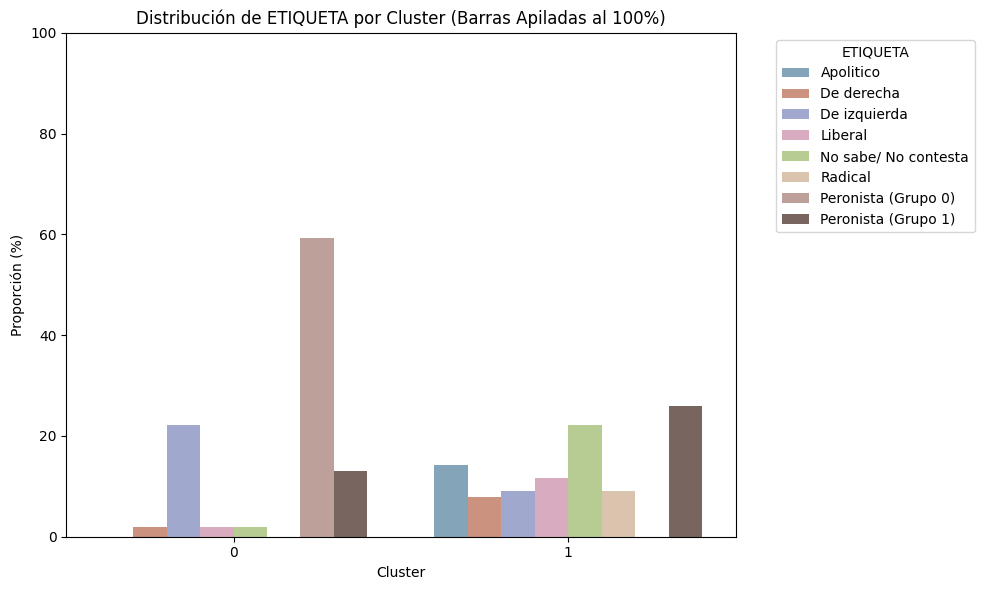

In [110]:

# 1️⃣ **Calcular la proporción de cada ETIQUETA dentro de cada cluster general**
proporciones = (
    df_clean.groupby(['cluster', 'ETIQUETA'])
    .size()
    .unstack(fill_value=0)  # Convierte las categorías en columnas
    .apply(lambda x: 100 * x / x.sum(), axis=1)  # Calcula proporciones al 100% por cluster
)

# 2️⃣ **Separar los peronistas para subdividirlos por `cluster_peron`**
proporciones_peronistas = (
    df_clean[df_clean['ETIQUETA'] == 'Peronista']
    .groupby(['cluster', 'cluster_peron'])
    .size()
    .unstack(fill_value=0)  # Convierte `cluster_peron` en columnas
    .apply(lambda x: 100 * x / x.sum(), axis=1)  # Normaliza al 100%
)

# 3️⃣ **Fusionar las proporciones generales con las proporciones de peronistas**
for cluster in proporciones_peronistas.index:
    peron_total = proporciones.loc[cluster, 'Peronista']  # Obtiene el % total de peronistas en ese cluster
    proporciones_peronistas.loc[cluster] = proporciones_peronistas.loc[cluster] * (peron_total / 100)  # Ajusta %

# 4️⃣ **Convertir a formato largo para graficar**
proporciones_long = proporciones.reset_index().melt(
    id_vars='cluster', var_name='ETIQUETA', value_name='Proporción'
)

# **⚠️ Remover la categoría "Peronista" de la tabla general**
proporciones_long = proporciones_long[proporciones_long['ETIQUETA'] != 'Peronista']

# 5️⃣ **Convertir a formato largo las subdivisiones de peronistas**
proporciones_peronistas_long = proporciones_peronistas.reset_index().melt(
    id_vars='cluster', var_name='cluster_peron', value_name='Proporción'
)
proporciones_peronistas_long['ETIQUETA'] = proporciones_peronistas_long['cluster_peron'].apply(
    lambda x: f'Peronista (Grupo {x})'
)  # Etiquetar como peronistas específicos

# 6️⃣ **Unir ambos DataFrames**
proporciones_final = pd.concat([proporciones_long, proporciones_peronistas_long])

# 7️⃣ **Definir colores personalizados basados en la imagen**
palette = {
    'Apolitico': '#7aa6c2',  # Verde agua
    'De derecha': '#d88c73',  # Rojo claro
    'De izquierda': '#9aa3d5',  # Azul pastel
    'Liberal': '#e1a3bf',  # Rosa pastel
    'No sabe/ No contesta': '#b8d589',  # Verde claro
    'Radical': '#e2c4a6',  # Beige
    'Peronista (Grupo 0)': '#c49c94',  # Marrón claro para uno de los subgrupos
    'Peronista (Grupo 1)': '#7c635c'   # Marrón oscuro para el otro subgrupo
}

# 8️⃣ **Crear el gráfico de barras apiladas al 100%**
plt.figure(figsize=(10, 6))
sns.barplot(
    data=proporciones_final,
    x='cluster',
    y='Proporción',
    hue='ETIQUETA',  # Usamos ETIQUETA para los colores generales
    palette=palette
)

# 🔟 **Finalizar detalles del gráfico**
plt.title('Distribución de ETIQUETA por Cluster (Barras Apiladas al 100%)')
plt.xlabel('Cluster')
plt.ylabel('Proporción (%)')
plt.legend(title='ETIQUETA', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.ylim(0, 100)  # Escalar al 100%
plt.tight_layout()
plt.show()


### **Subdivisión del Peronismo y su Relación con la Clusterización General**

En una segunda instancia del análisis, se aplicó **K-Means** exclusivamente sobre los encuestados identificados como **peronistas**, obteniendo así dos subgrupos dentro de esta categoría: **Peronistas del Grupo 0 y Peronistas del Grupo 1**.

Cuando se **reintroducen estos subgrupos** en la clusterización original de todas las etiquetas políticas, se observa un patrón revelador:  
### **Conclusión General**
La segmentación interna del peronismo muestra **una fractura ideológica importante** dentro de este espacio político.

1. **El Peronismo de grupo 0 representa a un peronismo más progresista**, con posturas **fuertemente críticas hacia EE.UU. e Israel**, una mayor **afinidad con discursos anticapitalistas y una visión de la seguridad antitetica a la que manifiestan los opinologos de derecha**, con una **visión económica más intervencionista**. Este grupo se **fusiona completamente con el Cluster 0** del análisis general, reforzando la idea de que este sector del peronismo está ideológicamente **muy cercano a la izquierda**.
2. **El grupo 1 dentro del peronismo, en cambio, es más heterogéneo**, con posturas **más moderadas en geopolítica, economía y seguridad**. Aunque tiene muchos ideales progresistas mas qu eotras etiquetas políticas, Participa mayormente del debate con otros grupos políticos, manteniendose mas fiel a una idea de peronismo originario.

